In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data=pd.read_csv('AllresultsSep3.csv')


In [ ]:
data.columns=['Orderid','Taller','Tallerid','kms','opened','closed',
             'status','lagdias','laghoras','diacierre','mescierre',
             'aniocierre','diaabierto','mesabierto','anioabierto','creadapor',
        'cerradapor','REPREASON','TipoOrden','proveedor','COMPCDKEY','COMPCODE',
             'DESCRIP','jobcode_correcto','QTYRCVD','QTYREQD','CHGAMT','TAXAMT','SUBTOTAL','TOTAL',
             'Unidad','TipoUnidad','aniounidad','EC','flota','TipoRazon','COMPLAINT',
             'jobcode','TipoLinea','NumParte','FechaPromesa','Estimate','diacomplete',
              'mescomplete','aniocomplete','completedate','MECHANIC','CITA']

In [ ]:
data.columns

Index(['Orderid', 'Taller', 'Tallerid', 'kms', 'opened', 'closed', 'status',
       'lagdias', 'laghoras', 'diacierre', 'mescierre', 'aniocierre',
       'diaabierto', 'mesabierto', 'anioabierto', 'creadapor', 'cerradapor',
       'REPREASON', 'TipoOrden', 'proveedor', 'COMPCDKEY', 'COMPCODE',
       'DESCRIP', 'jobcode_correcto', 'QTYRCVD', 'QTYREQD', 'CHGAMT', 'TAXAMT',
       'SUBTOTAL', 'TOTAL', 'Unidad', 'TipoUnidad', 'aniounidad', 'EC',
       'flota', 'TipoRazon', 'COMPLAINT', 'jobcode', 'TipoLinea', 'NumParte',
       'FechaPromesa', 'Estimate', 'diacomplete', 'mescomplete',
       'aniocomplete', 'completedate', 'MECHANIC', 'CITA'],
      dtype='object')

In [ ]:
data=data[data.status.str.contains('CLOSED',na=False)]

In [ ]:
sayer=data[data.flota.str.contains('Sayer Full',na=False)]

### Calidad de los datos

In [ ]:
# Quality of values in columns
for column in sayer.select_dtypes(include='object').columns:
    sayer[column] = sayer[column].apply(lambda x:x.strip() if isinstance(x, str) else x)

In [ ]:
sayer.flota.unique()

array(['Sayer Full'], dtype=object)

In [ ]:
sayer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orderid           7456 non-null   int64  
 1   Taller            7456 non-null   object 
 2   Tallerid          7456 non-null   object 
 3   kms               4028 non-null   float64
 4   opened            7456 non-null   object 
 5   closed            7456 non-null   object 
 6   status            7456 non-null   object 
 7   lagdias           7456 non-null   int64  
 8   laghoras          7456 non-null   int64  
 9   diacierre         7456 non-null   int64  
 10  mescierre         7456 non-null   object 
 11  aniocierre        7456 non-null   int64  
 12  diaabierto        7456 non-null   int64  
 13  mesabierto        7456 non-null   object 
 14  anioabierto       7456 non-null   int64  
 15  creadapor         7456 non-null   object 
 16  cerradapor        7456 non-null   object 


### Eliminamos columnas basura

In [ ]:
del sayer['jobcode_correcto']

### Arreglar las fechas

Fecha completa

In [ ]:
sayer['diacierre'] = sayer['diacierre'].astype(str).str.replace('.0', '', regex=False)
sayer['diacierre'] = pd.to_numeric(sayer['diacierre'], errors='coerce').astype('Int64')
sayer['aniocierre'] = sayer['aniocierre'].astype(str).str.replace('.0', '', regex=False)

In [ ]:
sayer['aniocierre'] = pd.to_numeric(sayer['aniocierre'], errors='coerce').astype('Int64')

In [ ]:
sayer['diacierre'] = sayer['diacierre'].astype(str)
sayer['mescierre'] = sayer['mescierre'].astype(str)
sayer['aniocierre'] = sayer['aniocierre'].astype(str)

In [ ]:
sayer['cerradoComplete'] = sayer.apply(lambda row: row['diacierre'] + '/' + row['mescierre'] + '/' + row['aniocierre'], axis=1)
sayer['cerradoComplete'] = pd.to_datetime(sayer['cerradoComplete'], dayfirst=True, errors='coerce')

In [ ]:
sayer['diaabierto'] = sayer['diaabierto'].astype(str).str.replace('.0', '', regex=False)
sayer['anioabierto'] = sayer['anioabierto'].astype(str).str.replace('.0', '', regex=False)

In [ ]:
sayer['anioabierto'] = pd.to_numeric(sayer['anioabierto'], errors='coerce').astype('Int64')

In [ ]:
sayer['diaabierto'] = sayer['diaabierto'].astype(str)
sayer['mesabierto'] = sayer['mesabierto'].astype(str)
sayer['anioabierto'] = sayer['anioabierto'].astype(str)

In [ ]:
sayer['abiertoComplete'] = sayer.apply(lambda row: row['diaabierto'] + '/' + row['mesabierto'] + '/' + row['anioabierto'], axis=1)
sayer['abiertoComplete'] = pd.to_datetime(sayer['abiertoComplete'], dayfirst=True, errors='coerce')

In [ ]:
sayer.head(20)

Orderid        Taller      Tallerid       kms   opened   closed  status  \
0    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
1    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
2    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
3    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
4    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
5    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
6    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
7    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
8    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
9    169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
10   169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
11   169137           QRO  QRO-00032562  244708.0  34:00.0  18:00.0  CLOSED   
12   169344  SAYER APASEO  SAAP-0000448       NaN  12:00.0  15:00.0  CLOSED   
13   169540           QRO  QRO-00032631       NaN  00:00.0  43:00.0  CLOSED   
14   169573           QRO  QRO-00032635  337578.0  05:00.0  28:00.0  CLOSED   
15   169573           QRO  QRO-00032635  337578.0  05:00.0  28:00.0  CLOSED   
16   169632  SAYER APASEO  SAAP-0000463       NaN  02:00.0  35:00.0  CLOSED   
17   169638  SAYER APASEO  SAAP-0000465       NaN  07:00.0  41:00.0  CLOSED   
18   170888           QRO  QRO-00032732       NaN  50:00.0  45:00.0  CLOSED   
19   170913  SAYER APASEO  SAAP-0000488       NaN  18:00.0  22:00.0  CLOSED   

    lagdias  laghoras diacierre  ... FechaPromesa Estimate diacomplete  \
0        38       914        10  ...      00:00.0      NaN          10   
1        38       914        10  ...      00:00.0      NaN          10   
2        38       914        10  ...      00:00.0      NaN          10   
3        38       914        10  ...      00:00.0      NaN          10   
4        38       914        10  ...      00:00.0      NaN          10   
5        38       914        10  ...      00:00.0      NaN          10   
6        38       914        10  ...      00:00.0      NaN          10   
7        38       914        10  ...      00:00.0      NaN          10   
8        38       914        10  ...      00:00.0      NaN          10   
9        38       914        10  ...      00:00.0      NaN          10   
10       38       914        10  ...      00:00.0      NaN          10   
11       38       914        10  ...      00:00.0      NaN          10   
12        9       217        14  ...      30:00.0      NaN          14   
13       14       343        19  ...      00:00.0      NaN           6   
14        1        25         7  ...      00:00.0      NaN           7   
15        1        25         7  ...      00:00.0      NaN           7   
16        0         5         7  ...      30:00.0      NaN           7   
17       14       339        21  ...      00:00.0      NaN          21   
18        0         3        14  ...      00:00.0      NaN          14   
19        0         0        14  ...      30:00.0      NaN          14   

   mescomplete aniocomplete     completedate MECHANIC      CITA  \
0     February         2022  10/2/2022 15:18      NaN  CON CITA   
1     February         2022  10/2/2022 15:18      NaN  CON CITA   
2     February         2022  10/2/2022 15:18      NaN  CON CITA   
3     February         2022  10/2/2022 15:18      NaN  CON CITA   
4     February         2022  10/2/2022 15:18      NaN  CON CITA   
5     February         2022  10/2/2022 15:18      NaN  CON CITA   
6     February         2022  10/2/2022 15:18      NaN  CON CITA   
7     February         2022  10/2/2022 15:18      NaN  CON CITA   
8     February         2022  10/2/2022 15:18      NaN  CON CITA   
9     February         2022  10/2/2022 15:18      NaN  CON CITA   
10    February         2022  10/2/2022 15:18      Na

In [ ]:
def clasificar_trabajo(job):

    job = str(job)
    if 'Derivado' in job:
        return 'Correctivo'
    if 'Preventivo' in job:
        return 'Preventivo'
    elif 'preventivo' in job:
        return 'Preventivo'
    elif 'SH' in job:
        return 'Preventivo'
    elif 'Lavado' in job:
        return 'Preventivo'
    elif 'Out' in job:
        return 'Preventivo'
    elif 'In' in job:
        return 'Preventivo'
    elif 'Acondicionamiento' in job:
        return 'Preventivo'
    elif 'Correctivo' in job:
        return 'Correctivo'
    elif 'GPS' in job:
        return 'Correctivo'
    elif 'Accidente' in job:
        return 'Auxilio'
    elif 'Auxilio' in job:
        return 'Auxilio'
    elif 'Daño' in job:
        return 'Auxilio'
    elif 'Robo' in job:
        return 'Auxilio'
    else:
        return 'OTROS'


sayer['Tipo'] = sayer['jobcode'].apply(clasificar_trabajo)


print(sayer[['jobcode', 'Tipo']].sample(30))

                                        jobcode        Tipo
4282       000027 - Auxilio Carretero - Llantas     Auxilio
6685     000073 - Derivado de preventivo Tracto  Correctivo
5166                000058 - Preventivo Llantas  Preventivo
1590      000053 - Auxilio Carretero - Mecánico     Auxilio
4648       000027 - Auxilio Carretero - Llantas     Auxilio
218                   000014 - Correctivo Cajas  Correctivo
1909       000027 - Auxilio Carretero - Llantas     Auxilio
1712                  000018 - Correctivo Dolly  Correctivo
5185                  000018 - Correctivo Dolly  Correctivo
7443      000053 - Auxilio Carretero - Mecánico     Auxilio
6027     000073 - Derivado de preventivo Tracto  Correctivo
2363                  000014 - Correctivo Cajas  Correctivo
1089             000062 - Daño Operativo Llanta     Auxilio
7204                000013 - Correctivo Tractos  Correctivo
1438                000029 - Servicio De Lavado  Preventivo
4630       000027 - Auxilio Carretero - 

In [ ]:
sayer['jobcode'].value_counts()

jobcode
000013 - Correctivo Tractos                   1485
000058 - Preventivo Llantas                    762
000073 - Derivado de preventivo Tracto         595
000014 - Correctivo Cajas                      563
000061 - Daño Operativo                        554
000041 - Servicio Preventivo A - LT            539
000005 - Servicio Preventivo Caja Seca A1      458
000018 - Correctivo Dolly                      367
000059 - Correctivo Llantas                    345
000026 - Accidente                             306
000029 - Servicio De Lavado                    303
000053 - Auxilio Carretero - Mecánico          262
000027 - Auxilio Carretero - Llantas           244
000042 - Servicio Preventivo B - LT            152
000043 - Servicio Preventivo C - LT             95
000055 - Acondicionamiento                      81
000034 - In Tractor                             76
000007 - Servicio Preventivo Dolly A1           60
000074 - Derivado de preventivo Arrastre        56
000062 - Daño Operativo Llanta                  51
000063 - In Dolly                               44
000060 - Robo                                   21
Preventivo general                              12
000065 - GPS                                     9
000036 - In Arrastre                             5
000054 - Auxilio Carretero- Abastecimiento       4
000001 - Servicio preventivo M1                  4
000050 - SH 3                                    3
Name: count, dtype: int64

In [ ]:
sayerPreventivo=sayer[sayer.Tipo=='Preventivo']
sayerCorrectivo=sayer[sayer.Tipo=='Correctivo']
sayerAuxilio=sayer[sayer.Tipo=='Auxilio']

In [ ]:
sayerAuxilio.jobcode.unique()

array(['000053 - Auxilio Carretero - Mecánico', '000061 - Daño Operativo',
       '000027 - Auxilio Carretero - Llantas', '000060 - Robo',
       '000026 - Accidente', '000062 - Daño Operativo Llanta',
       '000054 - Auxilio Carretero- Abastecimiento'], dtype=object)

### Dividimos la fecha abierta por Cuatrimestre y por tipo de mantenimiento

### Correctivos

In [ ]:
#Correctivos
sayer_2022_q1_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2022-01-01') & (sayerCorrectivo.abiertoComplete <= '2022-04-30')]
sayer_2022_q2_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2022-05-01') & (sayerCorrectivo.abiertoComplete <= '2022-08-31')]
sayer_2022_q3_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2022-09-01') & (sayerCorrectivo.abiertoComplete <= '2022-12-31')]

sayer_2023_q1_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2023-01-01') & (sayerCorrectivo.abiertoComplete <= '2023-04-30')]
sayer_2023_q2_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2023-05-01') & (sayerCorrectivo.abiertoComplete <= '2023-08-31')]
sayer_2023_q3_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2023-09-01') & (sayerCorrectivo.abiertoComplete <= '2023-12-31')]

sayer_2024_q1_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2024-01-01') & (sayerCorrectivo.abiertoComplete <= '2024-04-30')]
sayer_2024_q2_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2024-05-01') & (sayerCorrectivo.abiertoComplete <= '2024-08-31')]
sayer_2024_q3_Correctivo = sayerCorrectivo.loc[(sayerCorrectivo.abiertoComplete >= '2024-09-01') & (sayerCorrectivo.abiertoComplete <= '2024-12-31')]

### Preventivos

In [ ]:
#Preventivos
sayer_2022_q1_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2022-01-01') & (sayerPreventivo.abiertoComplete <= '2022-04-30')]
sayer_2022_q2_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2022-05-01') & (sayerPreventivo.abiertoComplete <= '2022-08-31')]
sayer_2022_q3_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2022-09-01') & (sayerPreventivo.abiertoComplete <= '2022-12-31')]

sayer_2023_q1_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2023-01-01') & (sayerPreventivo.abiertoComplete <= '2023-04-30')]
sayer_2023_q2_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2023-05-01') & (sayerPreventivo.abiertoComplete <= '2023-08-31')]
sayer_2023_q3_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2023-09-01') & (sayerPreventivo.abiertoComplete <= '2023-12-31')]

sayer_2024_q1_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2024-01-01') & (sayerPreventivo.abiertoComplete <= '2024-04-30')]
sayer_2024_q2_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2024-05-01') & (sayerPreventivo.abiertoComplete <= '2024-08-31')]
sayer_2024_q3_Preventivo = sayerPreventivo.loc[(sayerPreventivo.abiertoComplete >= '2024-09-01') & (sayerPreventivo.abiertoComplete <= '2024-12-31')]


### Auxilio

In [ ]:
#Auxilio
sayer_2022_q1_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2022-01-01') & (sayerAuxilio.abiertoComplete <= '2022-04-30')]
sayer_2022_q2_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2022-05-01') & (sayerAuxilio.abiertoComplete <= '2022-08-31')]
sayer_2022_q3_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2022-09-01') & (sayerAuxilio.abiertoComplete <= '2022-12-31')]

sayer_2023_q1_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2023-01-01') & (sayerAuxilio.abiertoComplete <= '2023-04-30')]
sayer_2023_q2_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2023-05-01') & (sayerAuxilio.abiertoComplete <= '2023-08-31')]
sayer_2023_q3_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2023-09-01') & (sayerAuxilio.abiertoComplete <= '2023-12-31')]

sayer_2024_q1_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2024-01-01') & (sayerAuxilio.abiertoComplete <= '2024-04-30')]
sayer_2024_q2_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2024-05-01') & (sayerAuxilio.abiertoComplete <= '2024-08-31')]
sayer_2024_q3_Auxilio = sayerAuxilio.loc[(sayerAuxilio.abiertoComplete >= '2024-09-01') & (sayerAuxilio.abiertoComplete <= '2024-12-31')]

## Años completos

### 2022

In [ ]:
# General
sayer_2022_complete_General=sayer[sayer['anioabierto']=='2022']

In [ ]:
# Correctivo
sayer_2022_complete_Correctivo=pd.concat([sayer_2022_q1_Correctivo,sayer_2022_q2_Correctivo,sayer_2022_q3_Correctivo],axis=0)

In [ ]:
# Preventivo
sayer_2022_complete_Preventivo=pd.concat([sayer_2022_q1_Preventivo,sayer_2022_q2_Preventivo,sayer_2022_q3_Preventivo],axis=0)

In [ ]:
# Auxilio
sayer_2022_complete_Auxilio=pd.concat([sayer_2022_q1_Auxilio,sayer_2022_q2_Auxilio,sayer_2022_q3_Auxilio],axis=0)

### 2023

In [ ]:
# General
sayer_2023_complete_General=sayer[sayer['anioabierto']=='2023']

In [ ]:
# Correctivo
sayer_2023_complete_Correctivo=pd.concat([sayer_2023_q1_Correctivo,sayer_2023_q2_Correctivo,sayer_2023_q3_Correctivo],axis=0)

In [ ]:
# Preventivo
sayer_2023_complete_Preventivo=pd.concat([sayer_2023_q1_Preventivo,sayer_2023_q2_Preventivo,sayer_2023_q3_Preventivo],axis=0)

In [ ]:
# Auxilio
sayer_2023_complete_Auxilio=pd.concat([sayer_2023_q1_Auxilio,sayer_2023_q2_Auxilio,sayer_2023_q3_Auxilio],axis=0)

### 2024

In [ ]:
# General
sayer_2024_complete_General=sayer[sayer['anioabierto']=='2024']

In [ ]:
# Correctivo
sayer_2024_complete_Correctivo=pd.concat([sayer_2024_q1_Correctivo,sayer_2024_q2_Correctivo],axis=0)

In [ ]:
# Preventivo
sayer_2024_complete_Preventivo=pd.concat([sayer_2024_q1_Preventivo,sayer_2024_q2_Preventivo],axis=0)

In [ ]:
# Auxilio
sayer_2024_complete_Auxilio=pd.concat([sayer_2024_q1_Auxilio,sayer_2024_q2_Auxilio],axis=0)

In [ ]:
sayer['Cuatrimestre'] = sayer['abiertoComplete'].apply(
    lambda x: 'C1_2022' if pd.Timestamp('2022-01-01') <= x <= pd.Timestamp('2022-04-30') else
              'C2_2022' if pd.Timestamp('2022-05-01') <= x <= pd.Timestamp('2022-08-31') else
              'C3_2022' if pd.Timestamp('2022-09-01') <= x <= pd.Timestamp('2022-12-31') else
              'C1_2023' if pd.Timestamp('2023-01-01') <= x <= pd.Timestamp('2023-04-30') else
              'C2_2023' if pd.Timestamp('2023-05-01') <= x <= pd.Timestamp('2023-08-31') else
              'C3_2023' if pd.Timestamp('2023-09-01') <= x <= pd.Timestamp('2023-12-31') else
              'C1_2024' if pd.Timestamp('2024-01-01') <= x <= pd.Timestamp('2024-04-30') else
              'C2_2024' if pd.Timestamp('2024-05-01') <= x <= pd.Timestamp('2024-08-31') else
              'C3_2024' if pd.Timestamp('2024-09-01') <= x <= pd.Timestamp('2024-12-31') else
              'Fuera de rango')

## Gráficas de cantidad de jobcodes por tipo de mantenimiento

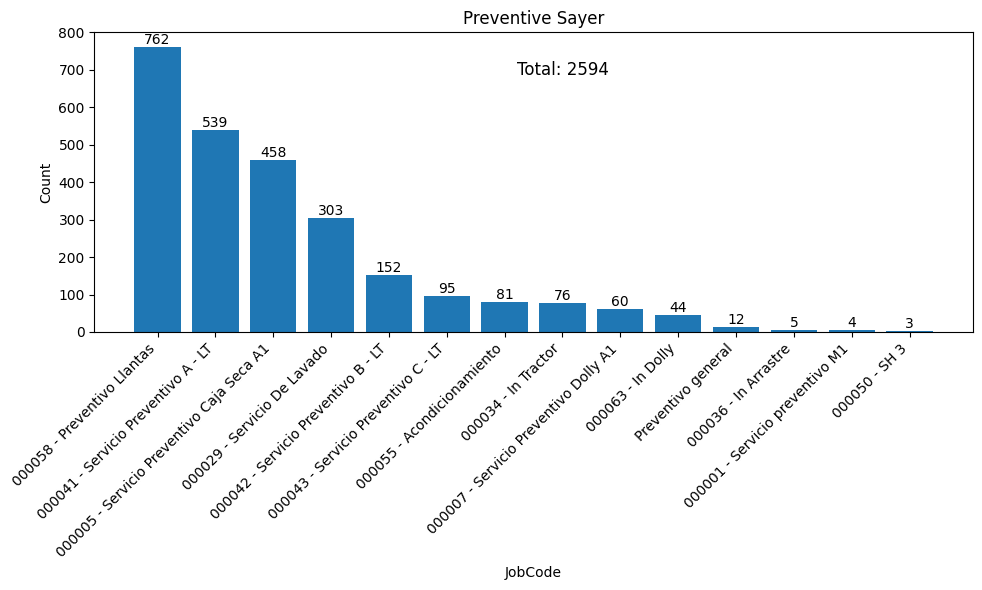

In [ ]:
jobcode_counts = sayerPreventivo["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Preventive Sayer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayerPreventivo.shape[0]
plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.show()

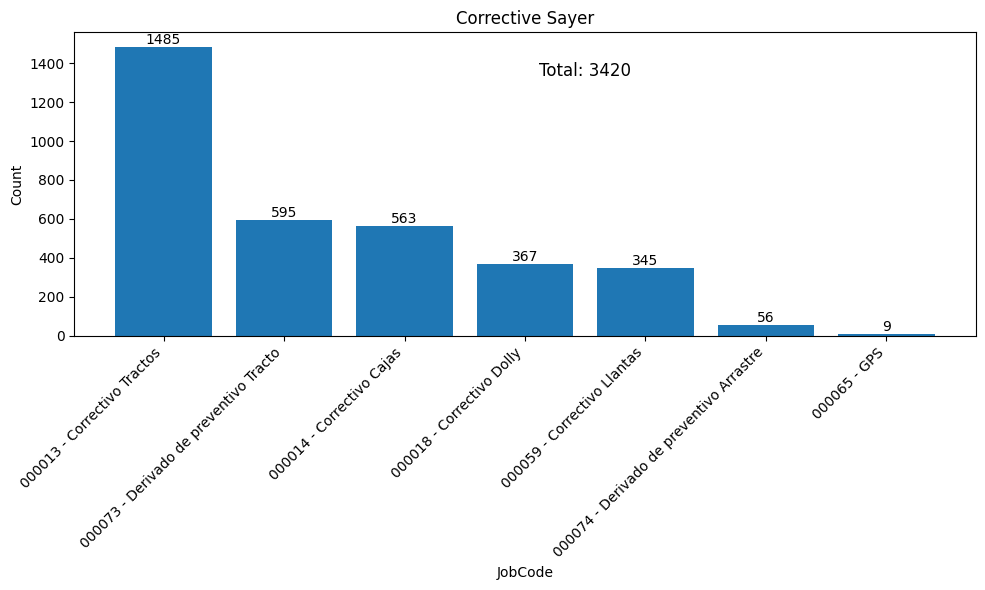

In [ ]:

jobcode_counts = sayerCorrectivo["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Corrective Sayer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayerCorrectivo.shape[0]
plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.show()

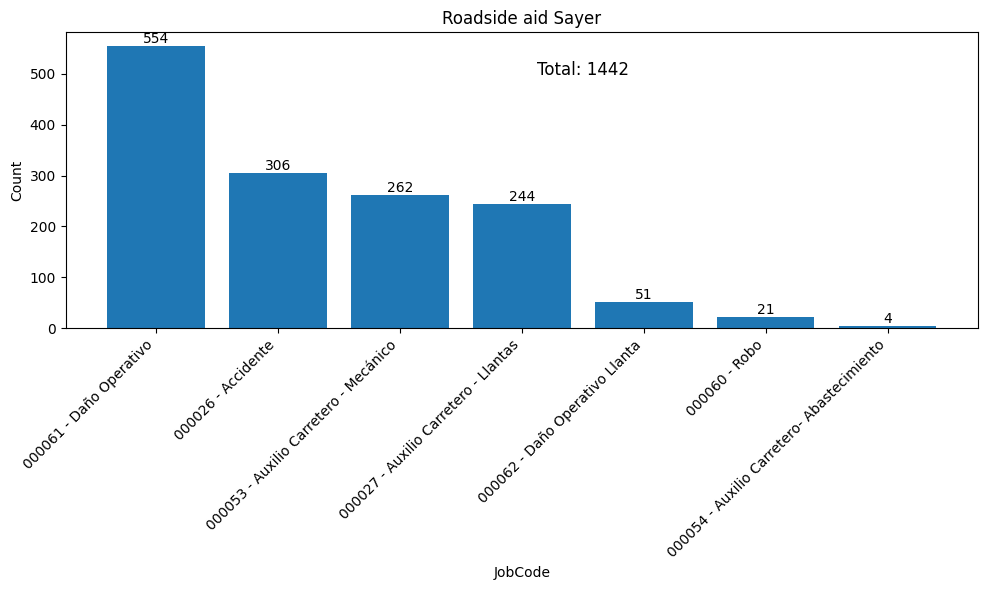

In [ ]:

jobcode_counts = sayerAuxilio["jobcode"].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Roadside aid Sayer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayerAuxilio.shape[0]
plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


plt.show()

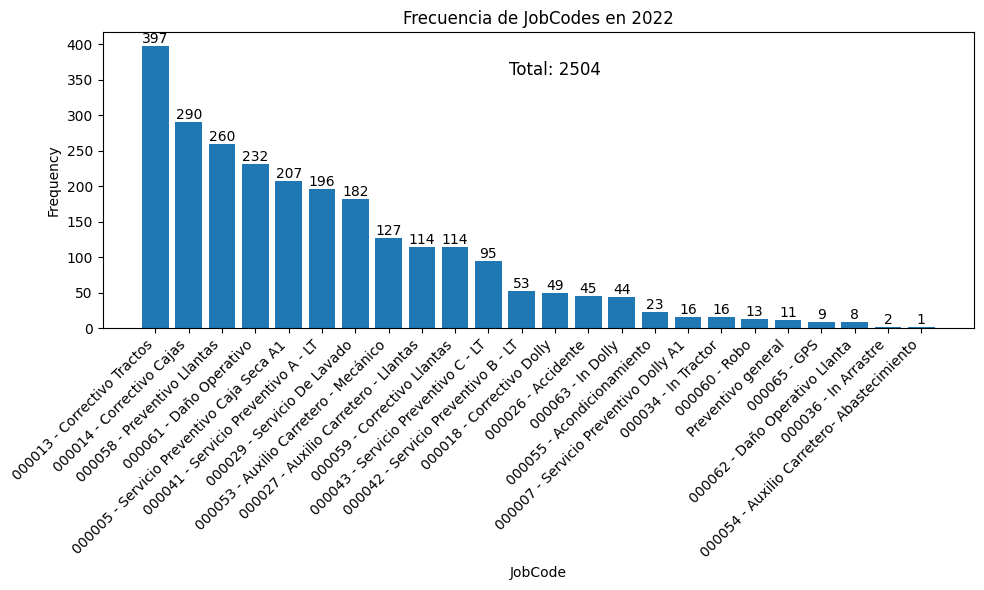

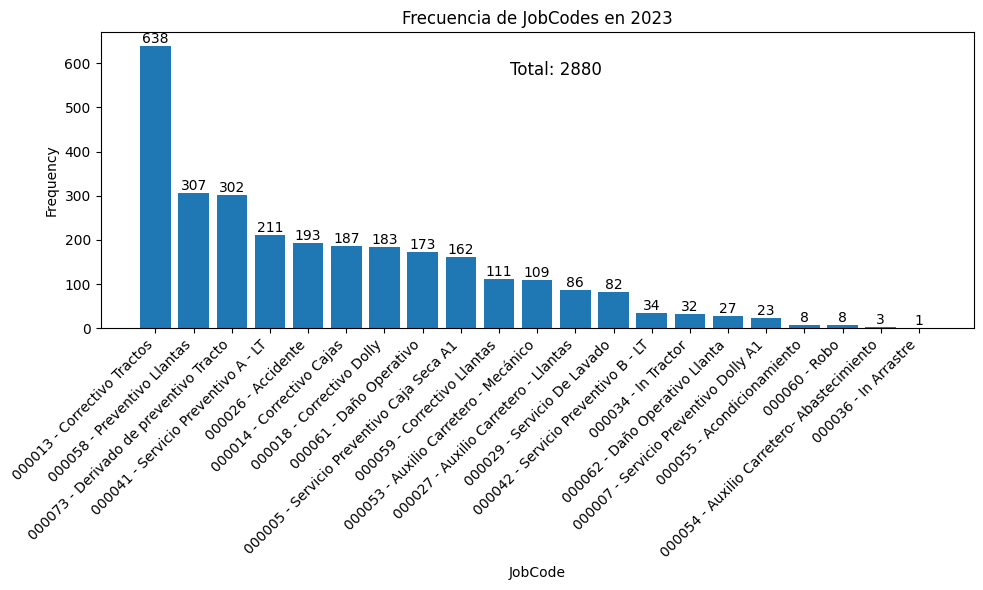

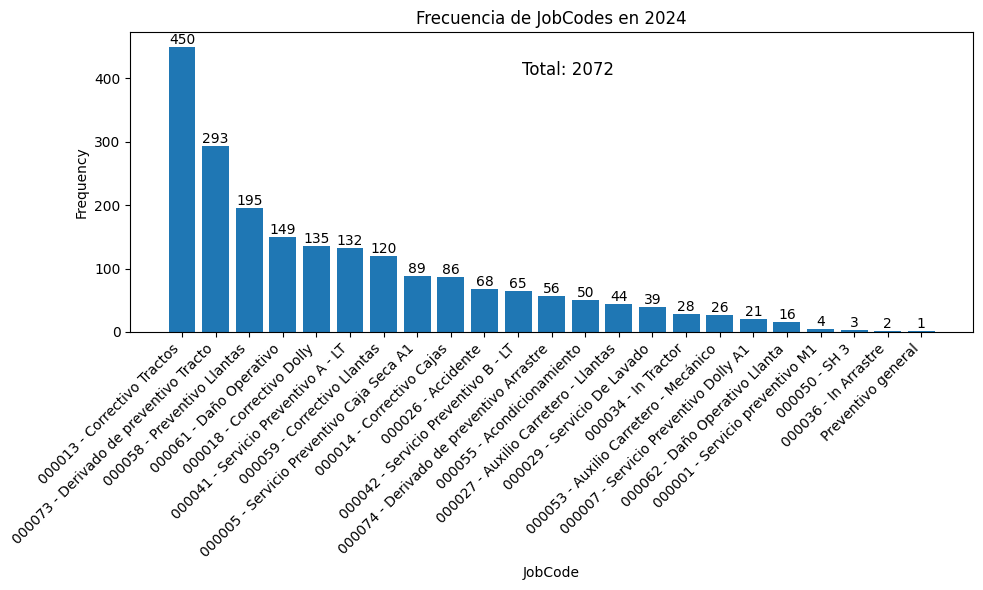

In [ ]:
# prompt: haz una grafica de barras que tenga la frecuencia de todos los jobcodes en sayer  y dividelo por año

import matplotlib.pyplot as plt

def plot_jobcode_frequency_by_year(df, year):
    # Filter data for the specified year
    df_year = df[df['anioabierto'] == str(year)]

    # Count jobcode frequencies for the year
    jobcode_counts = df_year['jobcode'].value_counts()

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(jobcode_counts.index, jobcode_counts.values)
    plt.xlabel('JobCode')
    plt.ylabel('Frequency')
    plt.title(f'Frecuencia de JobCodes en {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add total count to the plot
    total_count = df_year.shape[0]
    plt.text(len(jobcode_counts) / 2, max(jobcode_counts.values) * 0.9,
             f"Total: {total_count}", ha='center', fontsize=12)

    # Add frequency values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.show()

# Example usage (replace with your desired years)
plot_jobcode_frequency_by_year(sayer, 2022)
plot_jobcode_frequency_by_year(sayer, 2023)
plot_jobcode_frequency_by_year(sayer, 2024)

# MTBF

## General

### 2022

In [ ]:
sayerOrderid_gen=sayer_2022_complete_General[['Unidad','Orderid']]
sayerOrderid_gen=sayerOrderid_gen.groupby(['Unidad','Orderid']).count()
sayerOrderid_gen.reset_index(inplace=True)
sayerOrderid_gen['FrecuenciaUnidad'] = sayerOrderid_gen.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2022_complete_General=sayer_2022_complete_General.merge(sayerOrderid_gen[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2022_complete_General_unico=sayer_2022_complete_General.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2022_General_MTBF=sayer_2022_complete_General_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerGeneral_frecuencia=sayer_2022_complete_General_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2022_General_MTBF=pd.merge(sayer_2022_General_MTBF,sayerGeneral_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2022_General=[]
for index, row in sayer_2022_General_MTBF.iterrows():
  MTBF_2022_General=(8760-sayer_2022_General_MTBF.loc[index, 'laghoras'])/sayer_2022_General_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2022_General.append(MTBF_2022_General)

In [ ]:
MTBF_dict_2022_General={'MTBF':MTBF_values_2022_General}

In [ ]:
MTBF_df_2022_General=pd.DataFrame(MTBF_dict_2022_General, index=sayer_2022_General_MTBF.index)

In [ ]:
sayer_2022_General_MTBF=pd.merge(sayer_2022_General_MTBF,MTBF_df_2022_General, left_index=True, right_index=True)

In [ ]:
sayer_2022_General_MTBF['Tipo'] = 'General'
sayer_2022_General_MTBF['Anio'] = '2022'
sayer_2022_General_MTBF = sayer_2022_General_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2022_General_MTBF

laghoras  FrecuenciaUnidad         MTBF     Tipo  Anio
Unidad                                                        
1801        7234                40    38.150000  General  2022
10207       6732                23    88.173913  General  2022
1800        3458                55    96.400000  General  2022
10216       6240                25   100.800000  General  2022
1805        3896                47   103.489362  General  2022
1799        4861                32   121.843750  General  2022
10192       5487                17   192.529412  General  2022
10173       3449                26   204.269231  General  2022
1834        4813                19   207.736842  General  2022
D-2164      2298                27   239.333333  General  2022
1803        2005                28   241.250000  General  2022
1808         648                30   270.400000  General  2022
D-2168      1687                26   272.038462  General  2022
D-2172      2840                20   296.000000  General  2022
10248       2234                21   310.761905  General  2022
10196       4037                15   314.866667  General  2022
D-2161      1469                23   317.000000  General  2022
10176       1720                22   320.000000  General  2022
10255       2689                18   337.277778  General  2022
10186       2632                18   340.444444  General  2022
D-2165      1523                21   344.619048  General  2022
10188       1640                20   356.000000  General  2022
10180       1771                19   367.842105  General  2022
10213       1394                19   387.684211  General  2022
10249       1528                17   425.411765  General  2022
10232        988                18   431.777778  General  2022
10177        504                19   434.526316  General  2022
10190       2562                14   442.714286  General  2022
D-2170       921                16   489.937500  General  2022
10191       2071                13   514.538462  General  2022
D-2187      1999                13   520.076923  General  2022
10181        377                15   558.866667  General  2022
10175        806                14   568.142857  General  2022
10197       2800                 9   662.222222  General  2022
10183        630                11   739.090909  General  2022
10211       1408                 9   816.888889  General  2022
10223       1342                 9   824.222222  General  2022
D-2175       845                 9   879.444444  General  2022
10244       1294                 8   933.250000  General  2022
10258       1233                 8   940.875000  General  2022
10231       1639                 7  1017.285714  General  2022
10172        387                 8  1046.625000  General  2022
10171       1049                 7  1101.571429  General  2022
10195        926                 7  1119.142857  General  2022
D-2169       293                 7  1209.571429  General  2022
10187        193                 5  1713.400000  General  2022
D-2188        10                 5  1750.000000  General  2022
10193        877                 4  1970.750000  General  2022
10221        643                 3  2705.666667  General  2022
10224         26                 3  2911.333333  General  2022
53846         24                 1  8736.000000  General  2022

### 2023

In [ ]:
sayerOrderid_gen=sayer_2023_complete_General[['Unidad','Orderid']]
sayerOrderid_gen=sayerOrderid_gen.groupby(['Unidad','Orderid']).count()
sayerOrderid_gen=sayer_2023_complete_General[['Unidad','Orderid']]
sayerOrderid_gen=sayerOrderid_gen.groupby(['Unidad','Orderid']).size().reset_index(name='counts')
sayerOrderid_gen['FrecuenciaUnidad'] = sayerOrderid_gen.groupby('Unidad')['counts'].cumsum()
sayer_2023_complete_General=sayer_2023_complete_General.merge(sayerOrderid_gen[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2023_complete_General_unico=sayer_2023_complete_General.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2023_General_MTBF=sayer_2023_complete_General_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerGeneral_frecuencia=sayer_2023_complete_General_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2023_General_MTBF=pd.merge(sayer_2023_General_MTBF,sayerGeneral_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2023_General=[]
for index, row in sayer_2023_General_MTBF.iterrows():
  MTBF_2023_General=(8760-sayer_2023_General_MTBF.loc[index, 'laghoras'])/sayer_2023_General_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2023_General.append(MTBF_2023_General)

In [ ]:
MTBF_dict_2023_General={'MTBF':MTBF_values_2023_General}

In [ ]:
MTBF_df_2023_General=pd.DataFrame(MTBF_dict_2023_General, index=sayer_2023_General_MTBF.index)

In [ ]:
sayer_2023_General_MTBF=pd.merge(sayer_2023_General_MTBF,MTBF_df_2023_General, left_index=True, right_index=True)

In [ ]:
sayer_2023_General_MTBF['Tipo'] = 'General'
sayer_2023_General_MTBF['Anio'] = '2023'
sayer_2023_General_MTBF = sayer_2023_General_MTBF.sort_values(by=['MTBF'])

### 2024

In [ ]:
sayerOrderid_gen=sayer_2024_complete_General[['Unidad','Orderid']]
sayerOrderid_gen=sayerOrderid_gen.groupby(['Unidad','Orderid']).count()
sayerOrderid_gen=sayer_2024_complete_General[['Unidad','Orderid']]
sayerOrderid_gen=sayerOrderid_gen.groupby(['Unidad','Orderid']).size().reset_index(name='counts')
sayerOrderid_gen['FrecuenciaUnidad'] = sayerOrderid_gen.groupby('Unidad')['counts'].cumsum()
sayer_2024_complete_General=sayer_2024_complete_General.merge(sayerOrderid_gen[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2024_complete_General_unico=sayer_2024_complete_General.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2024_General_MTBF=sayer_2024_complete_General_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerGeneral_frecuencia=sayer_2024_complete_General_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2024_General_MTBF=pd.merge(sayer_2024_General_MTBF,sayerGeneral_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2024_General=[]
for index, row in sayer_2024_General_MTBF.iterrows():
  MTBF_2024_General=(8760-sayer_2024_General_MTBF.loc[index, 'laghoras'])/sayer_2024_General_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2024_General.append(MTBF_2024_General)

In [ ]:
MTBF_dict_2024_General={'MTBF':MTBF_values_2024_General}

In [ ]:
MTBF_df_2024_General=pd.DataFrame(MTBF_dict_2024_General, index=sayer_2024_General_MTBF.index)

In [ ]:
sayer_2024_General_MTBF=pd.merge(sayer_2024_General_MTBF,MTBF_df_2024_General, left_index=True, right_index=True)

In [ ]:
sayer_2024_General_MTBF['Tipo'] = 'General'
sayer_2024_General_MTBF['Anio'] = '2024'
sayer_2024_General_MTBF = sayer_2024_General_MTBF.sort_values(by=['MTBF'])

## Correctivo

### 2022

In [ ]:
sayerOrderid_Corre=sayer_2022_complete_Correctivo[['Unidad','Orderid']]
sayerOrderid_Corre=sayerOrderid_Corre.groupby(['Unidad','Orderid']).count()
sayerOrderid_Corre.reset_index(inplace=True)
sayerOrderid_Corre['FrecuenciaUnidad'] = sayerOrderid_Corre.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2022_complete_Correctivo=sayer_2022_complete_Correctivo.merge(sayerOrderid_Corre[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2022_complete_Correctivo_prueba=sayer_2022_complete_Correctivo.sort_values(by=['Unidad','abiertoComplete'],ascending=True)[['Orderid','Unidad','abiertoComplete','cerradoComplete','FrecuenciaUnidad']]

In [ ]:
sayer_2022_complete_Correctivo_unico=sayer_2022_complete_Correctivo.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2022_Correctivo_MTBF=sayer_2022_complete_Correctivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerCorrectivo_frecuencia=sayer_2022_complete_Correctivo_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2022_Correctivo_MTBF=pd.merge(sayer_2022_Correctivo_MTBF,sayerCorrectivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2022_Correctivo=[]
for index, row in sayer_2022_Correctivo_MTBF.iterrows():
  MTBF_2022_Correctivo=(8760-sayer_2022_Correctivo_MTBF.loc[index, 'laghoras'])/sayer_2022_Correctivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2022_Correctivo.append(MTBF_2022_Correctivo)

In [ ]:
MTBF_dict_2022_Correctivo={'MTBF':MTBF_values_2022_Correctivo}

In [ ]:
MTBF_df_2022_Correctivo=pd.DataFrame(MTBF_dict_2022_Correctivo, index=sayer_2022_Correctivo_MTBF.index)

In [ ]:
sayer_2022_Correctivo_MTBF=pd.merge(sayer_2022_Correctivo_MTBF,MTBF_df_2022_Correctivo, left_index=True, right_index=True)

In [ ]:
sayer_2022_Correctivo_MTBF['Tipo'] = 'Correctivo'
sayer_2022_Correctivo_MTBF = sayer_2022_Correctivo_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2022_Correctivo_MTBF

laghoras  FrecuenciaUnidad         MTBF        Tipo
Unidad                                                     
1800         845                36   219.861111  Correctivo
1801        1989                20   338.550000  Correctivo
1805         355                23   365.434783  Correctivo
1799         501                21   393.285714  Correctivo
1808         629                19   427.947368  Correctivo
1803        1169                12   632.583333  Correctivo
10216       2674                 8   760.750000  Correctivo
D-2168       312                10   844.800000  Correctivo
D-2161        40                10   872.000000  Correctivo
1834         822                 9   882.000000  Correctivo
D-2164       650                 9   901.111111  Correctivo
10213        591                 8  1021.125000  Correctivo
D-2172       161                 8  1074.875000  Correctivo
D-2170       630                 7  1161.428571  Correctivo
10173        390                 7  1195.714286  Correctivo
10175        170                 7  1227.142857  Correctivo
10223       1341                 6  1236.500000  Correctivo
10176         61                 7  1242.714286  Correctivo
10196       2190                 4  1642.500000  Correctivo
10207       1928                 4  1708.000000  Correctivo
10177        133                 5  1725.400000  Correctivo
10186         30                 5  1746.000000  Correctivo
10180         23                 5  1747.400000  Correctivo
D-2187         6                 5  1750.800000  Correctivo
D-2165       506                 4  2063.500000  Correctivo
10171        454                 4  2076.500000  Correctivo
10190        202                 4  2139.500000  Correctivo
10181        154                 4  2151.500000  Correctivo
10183        141                 4  2154.750000  Correctivo
10188         77                 4  2170.750000  Correctivo
10248         31                 4  2182.250000  Correctivo
10192         10                 4  2187.500000  Correctivo
10172         26                 3  2911.333333  Correctivo
10232         11                 3  2916.333333  Correctivo
10211          6                 3  2918.000000  Correctivo
10258        825                 2  3967.500000  Correctivo
10195        675                 2  4042.500000  Correctivo
D-2175       577                 2  4091.500000  Correctivo
10197        504                 2  4128.000000  Correctivo
10255        216                 2  4272.000000  Correctivo
10187         55                 2  4352.500000  Correctivo
10224          2                 2  4379.000000  Correctivo
D-2169         0                 2  4380.000000  Correctivo
10249         49                 1  8711.000000  Correctivo
10244          2                 1  8758.000000  Correctivo
10191          0                 1  8760.000000  Correctivo
D-2188         0                 1  8760.000000  Correctivo

### 2023

In [ ]:
sayerOrderid_Corre=sayer_2023_complete_Correctivo[['Unidad','Orderid']]
sayerOrderid_Corre=sayerOrderid_Corre.groupby(['Unidad','Orderid']).count()
sayerOrderid_Corre.reset_index(inplace=True)
sayerOrderid_Corre['FrecuenciaUnidad'] = sayerOrderid_Corre.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2023_complete_Correctivo=sayer_2023_complete_Correctivo.merge(sayerOrderid_Corre[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2023_complete_Correctivo_unico=sayer_2023_complete_Correctivo.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2023_Correctivo_MTBF=sayer_2023_complete_Correctivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerCorrectivo_frecuencia=sayer_2023_complete_Correctivo_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2023_Correctivo_MTBF=pd.merge(sayer_2023_Correctivo_MTBF,sayerCorrectivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2023_Correctivo=[]
for index, row in sayer_2023_Correctivo_MTBF.iterrows():
  MTBF_2023_Correctivo=(8760-sayer_2023_Correctivo_MTBF.loc[index, 'laghoras'])/sayer_2023_Correctivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2023_Correctivo.append(MTBF_2023_Correctivo)

In [ ]:
MTBF_dict_2023_Correctivo={'MTBF':MTBF_values_2023_Correctivo}

In [ ]:
MTBF_df_2023_Correctivo=pd.DataFrame(MTBF_dict_2023_Correctivo, index=sayer_2023_Correctivo_MTBF.index)

In [ ]:
sayer_2023_Correctivo_MTBF=pd.merge(sayer_2023_Correctivo_MTBF,MTBF_df_2023_Correctivo, left_index=True, right_index=True)

In [ ]:
sayer_2023_Correctivo_MTBF['Tipo'] = 'Correctivo'
sayer_2023_Correctivo_MTBF = sayer_2023_Correctivo_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2023_Correctivo_MTBF

laghoras  FrecuenciaUnidad         MTBF        Tipo
Unidad                                                     
1834         943                39   200.435897  Correctivo
1800         980                36   216.111111  Correctivo
1805        1170                26   291.923077  Correctivo
1808        1240                23   326.956522  Correctivo
1801        1319                20   372.050000  Correctivo
1803         723                15   535.800000  Correctivo
1799         545                13   631.923077  Correctivo
D-2187       194                11   778.727273  Correctivo
D-2170        61                11   790.818182  Correctivo
D-2172       124                 9   959.555556  Correctivo
D-2188        88                 9   963.555556  Correctivo
D-2168       346                 8  1051.750000  Correctivo
D-2164       248                 8  1064.000000  Correctivo
D-2169       176                 8  1073.000000  Correctivo
D-2175       568                 7  1170.285714  Correctivo
10192        182                 7  1225.428571  Correctivo
10175        111                 7  1235.571429  Correctivo
10213         39                 6  1453.500000  Correctivo
10177         28                 6  1455.333333  Correctivo
D-2165       502                 5  1651.600000  Correctivo
10176        232                 5  1705.600000  Correctivo
10173        147                 5  1722.600000  Correctivo
10223        103                 5  1731.400000  Correctivo
10181         72                 5  1737.600000  Correctivo
10186         42                 5  1743.600000  Correctivo
10221        153                 4  2151.750000  Correctivo
10187        136                 4  2156.000000  Correctivo
10248        109                 4  2162.750000  Correctivo
D-2161        74                 4  2171.500000  Correctivo
10196         73                 4  2171.750000  Correctivo
10216         11                 4  2187.250000  Correctivo
10249         10                 4  2187.500000  Correctivo
10172        178                 3  2860.666667  Correctivo
10232         36                 3  2908.000000  Correctivo
10183         23                 3  2912.333333  Correctivo
10188         12                 3  2916.000000  Correctivo
10207          6                 3  2918.000000  Correctivo
10231         23                 2  4368.500000  Correctivo
10195         11                 2  4374.500000  Correctivo
10244        224                 1  8536.000000  Correctivo
10255        172                 1  8588.000000  Correctivo
10193          9                 1  8751.000000  Correctivo
10197          3                 1  8757.000000  Correctivo
10211          1                 1  8759.000000  Correctivo
10258          1                 1  8759.000000  Correctivo

### 2024

In [ ]:
sayerOrderid_Corre=sayer_2024_complete_Correctivo[['Unidad','Orderid']]
sayerOrderid_Corre=sayerOrderid_Corre.groupby(['Unidad','Orderid']).count()
sayerOrderid_Corre.reset_index(inplace=True)
sayerOrderid_Corre['FrecuenciaUnidad'] = sayerOrderid_Corre.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2024_complete_Correctivo=sayer_2024_complete_Correctivo.merge(sayerOrderid_Corre[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2024_complete_Correctivo_unico=sayer_2024_complete_Correctivo.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2024_Correctivo_MTBF=sayer_2024_complete_Correctivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerCorrectivo_frecuencia=sayer_2024_complete_Correctivo_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2024_Correctivo_MTBF=pd.merge(sayer_2024_Correctivo_MTBF,sayerCorrectivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2024_Correctivo=[]
for index, row in sayer_2024_Correctivo_MTBF.iterrows():
  MTBF_2024_Correctivo=(8760-sayer_2024_Correctivo_MTBF.loc[index, 'laghoras'])/sayer_2024_Correctivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2024_Correctivo.append(MTBF_2024_Correctivo)

In [ ]:
MTBF_dict_2024_Correctivo={'MTBF':MTBF_values_2024_Correctivo}

In [ ]:
MTBF_df_2024_Correctivo=pd.DataFrame(MTBF_dict_2024_Correctivo, index=sayer_2024_Correctivo_MTBF.index)

In [ ]:
sayer_2024_Correctivo_MTBF=pd.merge(sayer_2024_Correctivo_MTBF,MTBF_df_2024_Correctivo, left_index=True, right_index=True)

In [ ]:
sayer_2024_Correctivo_MTBF['Tipo'] = 'Correctivo'
sayer_2024_Correctivo_MTBF = sayer_2024_Correctivo_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2024_Correctivo_MTBF

laghoras  FrecuenciaUnidad         MTBF        Tipo
Unidad                                                     
1803        1422                18   407.666667  Correctivo
D-2188       728                17   472.470588  Correctivo
1799         746                15   534.266667  Correctivo
1834         397                12   696.916667  Correctivo
1808         907                11   713.909091  Correctivo
1801         529                10   823.100000  Correctivo
10211        214                 9   949.555556  Correctivo
D-2161        32                 9   969.777778  Correctivo
1800         652                 8  1013.500000  Correctivo
1805         290                 8  1058.750000  Correctivo
D-2168       231                 8  1066.125000  Correctivo
10188         86                 8  1084.250000  Correctivo
D-2170       235                 7  1217.857143  Correctivo
D-2165        54                 7  1243.714286  Correctivo
D-2169       265                 6  1415.833333  Correctivo
10176        106                 6  1442.333333  Correctivo
10195         47                 6  1452.166667  Correctivo
10175         26                 6  1455.666667  Correctivo
10181         82                 5  1735.600000  Correctivo
10221         78                 5  1736.400000  Correctivo
D-2175        34                 5  1745.200000  Correctivo
10180        118                 4  2160.500000  Correctivo
10172         90                 4  2167.500000  Correctivo
10193         64                 4  2174.000000  Correctivo
10187         22                 4  2184.500000  Correctivo
10183         20                 4  2185.000000  Correctivo
10177          4                 4  2189.000000  Correctivo
D-2172       792                 3  2656.000000  Correctivo
10197        342                 3  2806.000000  Correctivo
10173        109                 3  2883.666667  Correctivo
10255         96                 3  2888.000000  Correctivo
10216         71                 3  2896.333333  Correctivo
10223         33                 3  2909.000000  Correctivo
10192         26                 3  2911.333333  Correctivo
10213         25                 3  2911.666667  Correctivo
D-2187        23                 3  2912.333333  Correctivo
10196          3                 3  2919.000000  Correctivo
10224        193                 2  4283.500000  Correctivo
10186        153                 2  4303.500000  Correctivo
10171        122                 2  4319.000000  Correctivo
10190         65                 2  4347.500000  Correctivo
10244         63                 2  4348.500000  Correctivo
D-2164       292                 1  8468.000000  Correctivo
10191         77                 1  8683.000000  Correctivo
10249         73                 1  8687.000000  Correctivo

## Preventivos

### 2022

In [ ]:
sayerOrderid_Prev=sayer_2022_complete_Preventivo[['Unidad','Orderid']]
sayerOrderid_Prev=sayerOrderid_Prev.groupby(['Unidad','Orderid']).count()
sayerOrderid_Prev.reset_index(inplace=True)
sayerOrderid_Prev['FrecuenciaUnidad'] = sayerOrderid_Prev.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2022_complete_Preventivo=sayer_2022_complete_Preventivo.merge(sayerOrderid_Prev[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2022_complete_Preventivo_unico=sayer_2022_complete_Preventivo.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2022_Preventivo_MTBF=sayer_2022_complete_Preventivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerPreventivo_frecuencia=sayer_2022_complete_Preventivo_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2022_Preventivo_MTBF=pd.merge(sayer_2022_Preventivo_MTBF,sayerPreventivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2022_Preventivo=[]
for index, row in sayer_2022_Preventivo_MTBF.iterrows():
  MTBF=(8760-sayer_2022_Preventivo_MTBF.loc[index, 'laghoras'])/sayer_2022_Preventivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2022_Preventivo.append(MTBF)

In [ ]:
MTBF_dict_2022_Preventivo={'MTBF':MTBF_values_2022_Preventivo}

In [ ]:
MTBF_df=pd.DataFrame(MTBF_dict_2022_Preventivo, index=sayer_2022_Preventivo_MTBF.index)

In [ ]:
sayer_2022_Preventivo_MTBF=pd.merge(sayer_2022_Preventivo_MTBF,MTBF_df, left_index=True, right_index=True)

In [ ]:
sayer_2022_Preventivo_MTBF['Tipo'] = 'Preventivo'
sayer_2022_Preventivo_MTBF = sayer_2022_Preventivo_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2022_Preventivo_MTBF

laghoras  FrecuenciaUnidad         MTBF        Tipo
Unidad                                                     
10192       5483                13   252.076923  Preventivo
10216       3181                13   429.153846  Preventivo
10207       3830                11   448.181818  Preventivo
10249       1479                15   485.400000  Preventivo
10173        169                16   536.937500  Preventivo
10186       2598                11   560.181818  Preventivo
1805        1320                13   572.307692  Preventivo
D-2168      1487                12   606.083333  Preventivo
10191       2060                11   609.090909  Preventivo
10176        746                13   616.461538  Preventivo
10248       1975                11   616.818182  Preventivo
10180       1744                11   637.818182  Preventivo
1801        1105                12   637.916667  Preventivo
10177        371                13   645.307692  Preventivo
D-2164      1606                11   650.363636  Preventivo
10188       1536                11   656.727273  Preventivo
1803         310                12   704.166667  Preventivo
1800         230                11   775.454545  Preventivo
10196       1747                 9   779.222222  Preventivo
10213        782                10   797.800000  Preventivo
10255       2362                 8   799.750000  Preventivo
1808         277                10   848.300000  Preventivo
D-2165       973                 9   865.222222  Preventivo
10232        647                 9   901.444444  Preventivo
D-2161      1441                 8   914.875000  Preventivo
1799         246                 9   946.000000  Preventivo
D-2172      2024                 7   962.285714  Preventivo
1834        1061                 8   962.375000  Preventivo
10231       1639                 7  1017.285714  Preventivo
10181        176                 7  1226.285714  Preventivo
10175         51                 6  1451.500000  Preventivo
D-2169       293                 5  1693.400000  Preventivo
D-2170       290                 5  1694.000000  Preventivo
D-2175       264                 5  1699.200000  Preventivo
10195        251                 5  1701.800000  Preventivo
10190        400                 4  2090.000000  Preventivo
10197       1104                 3  2552.000000  Preventivo
10172         14                 3  2915.333333  Preventivo
D-2188         8                 3  2917.333333  Preventivo
10244       1035                 2  3862.500000  Preventivo
10193        701                 2  4029.500000  Preventivo
10183        435                 2  4162.500000  Preventivo
10258        391                 2  4184.500000  Preventivo
10221        142                 2  4309.000000  Preventivo
10187        138                 2  4311.000000  Preventivo
D-2187         6                 2  4377.000000  Preventivo
10171        573                 1  8187.000000  Preventivo
10211        177                 1  8583.000000  Preventivo
53846         24                 1  8736.000000  Preventivo
10224         24                 1  8736.000000  Preventivo
10223          0                 1  8760.000000  Preventivo

### 2023

In [ ]:
sayerOrderid_Prev=sayer_2023_complete_Preventivo[['Unidad','Orderid']]
sayerOrderid_Prev=sayerOrderid_Prev.groupby(['Unidad','Orderid']).count()
sayerOrderid_Prev.reset_index(inplace=True)
sayerOrderid_Prev['FrecuenciaUnidad'] = sayerOrderid_Prev.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2023_complete_Preventivo=sayer_2023_complete_Preventivo.merge(sayerOrderid_Prev[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2023_complete_Preventivo_unico=sayer_2023_complete_Preventivo.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2023_Preventivo_MTBF=sayer_2023_complete_Preventivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerPreventivo_frecuencia=sayer_2023_complete_Preventivo_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2023_Preventivo_MTBF=pd.merge(sayer_2023_Preventivo_MTBF,sayerPreventivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values=[]
for index, row in sayer_2023_Preventivo_MTBF.iterrows():
  MTBF=(8760-sayer_2023_Preventivo_MTBF.loc[index, 'laghoras'])/sayer_2023_Preventivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values.append(MTBF)

In [ ]:
MTBF_dict={'MTBF':MTBF_values}

In [ ]:
MTBF_df=pd.DataFrame(MTBF_dict, index=sayer_2023_Preventivo_MTBF.index)

In [ ]:
sayer_2023_Preventivo_MTBF=pd.merge(sayer_2023_Preventivo_MTBF,MTBF_df, left_index=True, right_index=True)

In [ ]:
sayer_2023_Preventivo_MTBF['Tipo'] = 'Preventivo'
sayer_2023_Preventivo_MTBF = sayer_2023_Preventivo_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2023_Preventivo_MTBF

laghoras  FrecuenciaUnidad         MTBF        Tipo
Unidad                                                     
1805         898                14   561.571429  Preventivo
1834         419                13   641.615385  Preventivo
1808         624                12   678.000000  Preventivo
1801         570                12   682.500000  Preventivo
1800         421                12   694.916667  Preventivo
1799         536                11   747.636364  Preventivo
1803         417                 7  1191.857143  Preventivo
D-2165       317                 6  1407.166667  Preventivo
10171        203                 6  1426.166667  Preventivo
10192        155                 5  1721.000000  Preventivo
10187        139                 5  1724.200000  Preventivo
10186         71                 5  1737.800000  Preventivo
D-2169       285                 4  2118.750000  Preventivo
D-2187       280                 4  2120.000000  Preventivo
D-2164       238                 4  2130.500000  Preventivo
10175        189                 4  2142.750000  Preventivo
10255        175                 4  2146.250000  Preventivo
D-2172       153                 4  2151.750000  Preventivo
10211         99                 4  2165.250000  Preventivo
10216         75                 4  2171.250000  Preventivo
10248         62                 4  2174.500000  Preventivo
10231          8                 4  2188.000000  Preventivo
10190        607                 3  2717.666667  Preventivo
10172        319                 3  2813.666667  Preventivo
D-2168       269                 3  2830.333333  Preventivo
10224        244                 3  2838.666667  Preventivo
10223        197                 3  2854.333333  Preventivo
10213        152                 3  2869.333333  Preventivo
10232        101                 3  2886.333333  Preventivo
10188         80                 3  2893.333333  Preventivo
10177         43                 3  2905.666667  Preventivo
10176         29                 3  2910.333333  Preventivo
D-2161        29                 3  2910.333333  Preventivo
10183         28                 3  2910.666667  Preventivo
10173         28                 3  2910.666667  Preventivo
10195          8                 3  2917.333333  Preventivo
10244        143                 2  4308.500000  Preventivo
10196         74                 2  4343.000000  Preventivo
D-2188        56                 2  4352.000000  Preventivo
10197         49                 2  4355.500000  Preventivo
10221         26                 2  4367.000000  Preventivo
D-2175        22                 2  4369.000000  Preventivo
10181         21                 2  4369.500000  Preventivo
D-2170        19                 2  4370.500000  Preventivo
10249          7                 2  4376.500000  Preventivo
10180          6                 2  4377.000000  Preventivo
10207          3                 2  4378.500000  Preventivo
10191        227                 1  8533.000000  Preventivo
10193        124                 1  8636.000000  Preventivo
10258         74                 1  8686.000000  Preventivo

### 2024

In [ ]:
sayerOrderid_Prev=sayer_2024_complete_Preventivo[['Unidad','Orderid']]
sayerOrderid_Prev=sayerOrderid_Prev.groupby(['Unidad','Orderid']).count()
sayerOrderid_Prev.reset_index(inplace=True)
sayerOrderid_Prev['FrecuenciaUnidad'] = sayerOrderid_Prev.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2024_complete_Preventivo=sayer_2024_complete_Preventivo.merge(sayerOrderid_Prev[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2024_complete_Preventivo_unico=sayer_2024_complete_Preventivo.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2024_Preventivo_MTBF=sayer_2024_complete_Preventivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerPreventivo_frecuencia=sayer_2024_complete_Preventivo_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2024_Preventivo_MTBF=pd.merge(sayer_2024_Preventivo_MTBF,sayerPreventivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2024_Preventivo=[]
for index, row in sayer_2024_Preventivo_MTBF.iterrows():
  MTBF_2024_Preventivo=(8760-sayer_2024_Preventivo_MTBF.loc[index, 'laghoras'])/sayer_2024_Preventivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2024_Preventivo.append(MTBF_2024_Preventivo)

In [ ]:
MTBF_dict_2024_Preventivo={'MTBF':MTBF_values_2024_Preventivo}

In [ ]:
MTBF_df_2024_Preventivo=pd.DataFrame(MTBF_dict_2024_Preventivo, index=sayer_2024_Preventivo_MTBF.index)

In [ ]:
sayer_2024_Preventivo_MTBF=pd.merge(sayer_2024_Preventivo_MTBF,MTBF_df_2024_Preventivo, left_index=True, right_index=True)

In [ ]:
sayer_2024_Preventivo_MTBF['Tipo'] = 'Preventivo'
sayer_2024_Preventivo_MTBF = sayer_2024_Preventivo_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2024_Preventivo_MTBF

laghoras  FrecuenciaUnidad         MTBF        Tipo
Unidad                                                     
1799         326                14   602.428571  Preventivo
1834         187                 9   952.555556  Preventivo
1803         731                 8  1003.625000  Preventivo
1801        1565                 7  1027.857143  Preventivo
1808         529                 7  1175.857143  Preventivo
1805         199                 7  1223.000000  Preventivo
1800         299                 5  1692.200000  Preventivo
D-2165        17                 4  2185.750000  Preventivo
10197        238                 3  2840.666667  Preventivo
10193        204                 3  2852.000000  Preventivo
10258        195                 3  2855.000000  Preventivo
10191        143                 3  2872.333333  Preventivo
D-2169       130                 3  2876.666667  Preventivo
D-2170        99                 3  2887.000000  Preventivo
10181         95                 3  2888.333333  Preventivo
10180         61                 3  2899.666667  Preventivo
10196         53                 3  2902.333333  Preventivo
D-2172       579                 2  4090.500000  Preventivo
D-2187       286                 2  4237.000000  Preventivo
10244        249                 2  4255.500000  Preventivo
10255        213                 2  4273.500000  Preventivo
10221        177                 2  4291.500000  Preventivo
10224        173                 2  4293.500000  Preventivo
10186        133                 2  4313.500000  Preventivo
D-2175       120                 2  4320.000000  Preventivo
10177        100                 2  4330.000000  Preventivo
D-2188        96                 2  4332.000000  Preventivo
10216         93                 2  4333.500000  Preventivo
10172         81                 2  4339.500000  Preventivo
10195         80                 2  4340.000000  Preventivo
10249         77                 2  4341.500000  Preventivo
10223         71                 2  4344.500000  Preventivo
10173         66                 2  4347.000000  Preventivo
10176         55                 2  4352.500000  Preventivo
10231         49                 2  4355.500000  Preventivo
10213         49                 2  4355.500000  Preventivo
10171         37                 2  4361.500000  Preventivo
10192         35                 2  4362.500000  Preventivo
D-2161        20                 2  4370.000000  Preventivo
D-2164       292                 1  8468.000000  Preventivo
10248        141                 1  8619.000000  Preventivo
10207         76                 1  8684.000000  Preventivo
10183         48                 1  8712.000000  Preventivo
10190         47                 1  8713.000000  Preventivo
10175         45                 1  8715.000000  Preventivo
10232         25                 1  8735.000000  Preventivo
D-2168        24                 1  8736.000000  Preventivo
10211         24                 1  8736.000000  Preventivo
10188         19                 1  8741.000000  Preventivo
10187          4                 1  8756.000000  Preventivo

## Auxilio

### 2022

In [ ]:
sayerOrderid_Aux=sayer_2022_complete_Auxilio[['Unidad','Orderid']]
sayerOrderid_Aux=sayerOrderid_Aux.groupby(['Unidad','Orderid']).count()
sayerOrderid_Aux.reset_index(inplace=True)
sayerOrderid_Aux['FrecuenciaUnidad'] = sayerOrderid_Aux.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2022_complete_Auxilio=sayer_2022_complete_Auxilio.merge(sayerOrderid_Aux[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2022_complete_Auxilio_unico=sayer_2022_complete_Auxilio.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2022_Auxilio_MTBF=sayer_2022_complete_Auxilio_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerAuxilio_frecuencia=sayer_2022_complete_Auxilio_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2022_Auxilio_MTBF=pd.merge(sayer_2022_Auxilio_MTBF,sayerAuxilio_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2022_Auxilio=[]
for index, row in sayer_2022_Auxilio_MTBF.iterrows():
  MTBF_2022_Auxilio=(8760-sayer_2022_Auxilio_MTBF.loc[index, 'laghoras'])/sayer_2022_Auxilio_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2022_Auxilio.append(MTBF_2022_Auxilio)

In [ ]:
MTBF_dict_2022_Auxilio={'MTBF':MTBF_values_2022_Auxilio}

In [ ]:
MTBF_df_2022_Auxilio=pd.DataFrame(MTBF_dict_2022_Auxilio, index=sayer_2022_Auxilio_MTBF.index)

In [ ]:
sayer_2022_Auxilio_MTBF=pd.merge(sayer_2022_Auxilio_MTBF,MTBF_df_2022_Auxilio, left_index=True, right_index=True)

In [ ]:
sayer_2022_Auxilio_MTBF['Tipo'] = 'Auxilio'
sayer_2022_Auxilio_MTBF = sayer_2022_Auxilio_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2022_Auxilio_MTBF

laghoras  FrecuenciaUnidad         MTBF     Tipo
Unidad                                                  
1801        5326                14   245.285714  Auxilio
1805        2650                23   265.652174  Auxilio
1800        2811                19   313.105263  Auxilio
1803         983                14   555.500000  Auxilio
1799        4329                 7   633.000000  Auxilio
10190       2064                10   669.600000  Auxilio
10207        980                 8   972.500000  Auxilio
D-2165       623                 8  1017.125000  Auxilio
10255        131                 8  1078.625000  Auxilio
D-2187      1987                 6  1128.833333  Auxilio
10232        336                 7  1203.428571  Auxilio
D-2164        42                 7  1245.428571  Auxilio
1808          14                 7  1249.428571  Auxilio
1834        3097                 4  1415.750000  Auxilio
10248        230                 6  1421.666667  Auxilio
10183         78                 6  1447.000000  Auxilio
D-2161        14                 6  1457.666667  Auxilio
10211       1225                 5  1507.000000  Auxilio
D-2172       655                 5  1621.000000  Auxilio
10244        257                 5  1700.600000  Auxilio
10181        174                 5  1717.200000  Auxilio
10188         29                 5  1746.200000  Auxilio
10197       1192                 4  1892.000000  Auxilio
10173       2890                 3  1956.666667  Auxilio
10176        925                 4  1958.750000  Auxilio
10216        385                 4  2093.750000  Auxilio
10180        147                 4  2153.250000  Auxilio
10258         17                 4  2185.750000  Auxilio
D-2168         7                 4  2188.250000  Auxilio
D-2170         1                 4  2189.750000  Auxilio
10196        458                 3  2767.333333  Auxilio
10172        355                 3  2801.666667  Auxilio
10193        346                 3  2804.666667  Auxilio
10175        630                 2  4065.000000  Auxilio
10213         58                 2  4351.000000  Auxilio
10171         22                 2  4369.000000  Auxilio
D-2175         4                 2  4378.000000  Auxilio
10186          4                 2  4378.000000  Auxilio
10223          1                 2  4379.500000  Auxilio
10221        501                 1  8259.000000  Auxilio
10191         11                 1  8749.000000  Auxilio
D-2188         2                 1  8758.000000  Auxilio
10187          0                 1  8760.000000  Auxilio
10177          0                 1  8760.000000  Auxilio
10249          0                 1  8760.000000  Auxilio

### 2023

In [ ]:
sayerOrderid_Aux=sayer_2023_complete_Auxilio[['Unidad','Orderid']]
sayerOrderid_Aux=sayerOrderid_Aux.groupby(['Unidad','Orderid']).count()
sayerOrderid_Aux.reset_index(inplace=True)
sayerOrderid_Aux['FrecuenciaUnidad'] = sayerOrderid_Aux.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2023_complete_Auxilio=sayer_2023_complete_Auxilio.merge(sayerOrderid_Aux[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2023_complete_Auxilio_unico=sayer_2023_complete_Auxilio.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2023_Auxilio_MTBF=sayer_2023_complete_Auxilio_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerAuxilio_frecuencia=sayer_2023_complete_Auxilio_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2023_Auxilio_MTBF=pd.merge(sayer_2023_Auxilio_MTBF,sayerAuxilio_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2023_Auxilio=[]
for index, row in sayer_2023_Auxilio_MTBF.iterrows():
  MTBF_2023_Auxilio=(8760-sayer_2023_Auxilio_MTBF.loc[index, 'laghoras'])/sayer_2023_Auxilio_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2023_Auxilio.append(MTBF_2023_Auxilio)

In [ ]:
MTBF_dict_2023_Auxilio={'MTBF':MTBF_values_2023_Auxilio}

In [ ]:
MTBF_df_2023_Auxilio=pd.DataFrame(MTBF_dict_2023_Auxilio, index=sayer_2023_Auxilio_MTBF.index)

In [ ]:
sayer_2023_Auxilio_MTBF=pd.merge(sayer_2023_Auxilio_MTBF,MTBF_df_2023_Auxilio, left_index=True, right_index=True)

In [ ]:
sayer_2023_Auxilio_MTBF['Tipo'] = 'Auxilio'
sayer_2023_Auxilio_MTBF = sayer_2023_Auxilio_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2023_Auxilio_MTBF

laghoras  FrecuenciaUnidad         MTBF     Tipo
Unidad                                                  
1808         997                19   408.578947  Auxilio
1800         522                18   457.666667  Auxilio
1805         680                16   505.000000  Auxilio
1834         557                16   512.687500  Auxilio
1801         165                13   661.153846  Auxilio
1799         645                12   676.250000  Auxilio
D-2170       569                10   819.100000  Auxilio
1803         292                10   846.800000  Auxilio
D-2187       148                10   861.200000  Auxilio
10177       2437                 6  1053.833333  Auxilio
D-2169       183                 8  1072.125000  Auxilio
D-2175        62                 8  1087.250000  Auxilio
10188         11                 8  1093.625000  Auxilio
10183        113                 7  1235.285714  Auxilio
10181          7                 7  1250.428571  Auxilio
10213         90                 6  1445.000000  Auxilio
D-2172        23                 6  1456.166667  Auxilio
10175       2876                 4  1471.000000  Auxilio
10172        428                 5  1666.400000  Auxilio
D-2161       306                 5  1690.800000  Auxilio
10223         87                 5  1734.600000  Auxilio
10211         80                 5  1736.000000  Auxilio
D-2188        64                 5  1739.200000  Auxilio
10195         43                 5  1743.400000  Auxilio
10192          6                 5  1750.800000  Auxilio
D-2164       126                 4  2158.500000  Auxilio
D-2168       105                 4  2163.750000  Auxilio
10232         11                 4  2187.250000  Auxilio
10176          6                 4  2188.500000  Auxilio
10193        132                 3  2876.000000  Auxilio
D-2165        97                 3  2887.666667  Auxilio
10173         72                 3  2896.000000  Auxilio
10207          6                 3  2918.000000  Auxilio
10180          4                 3  2918.666667  Auxilio
10187         50                 2  4355.000000  Auxilio
10186         46                 2  4357.000000  Auxilio
10255          7                 2  4376.500000  Auxilio
10231          6                 2  4377.000000  Auxilio
10196          4                 2  4378.000000  Auxilio
10248         56                 1  8704.000000  Auxilio
10258         50                 1  8710.000000  Auxilio
10171         46                 1  8714.000000  Auxilio
10191          3                 1  8757.000000  Auxilio
10197          2                 1  8758.000000  Auxilio
10216          1                 1  8759.000000  Auxilio
10249          1                 1  8759.000000  Auxilio

### 2024

In [ ]:
sayerOrderid_Aux=sayer_2024_complete_Auxilio[['Unidad','Orderid']]
sayerOrderid_Aux=sayerOrderid_Aux.groupby(['Unidad','Orderid']).count()
sayerOrderid_Aux.reset_index(inplace=True)
sayerOrderid_Aux['FrecuenciaUnidad'] = sayerOrderid_Aux.groupby('Unidad')['Orderid'].cumcount() + 1
sayer_2024_complete_Auxilio=sayer_2024_complete_Auxilio.merge(sayerOrderid_Aux[['Unidad','Orderid','FrecuenciaUnidad']], on=['Unidad','Orderid'], how='left')

In [ ]:
sayer_2024_complete_Auxilio_unico=sayer_2024_complete_Auxilio.drop_duplicates(subset=['Unidad','abiertoComplete'],keep='last')

In [ ]:
sayer_2024_Auxilio_MTBF=sayer_2024_complete_Auxilio_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayerAuxilio_frecuencia=sayer_2024_complete_Auxilio_unico.groupby('Unidad')['FrecuenciaUnidad'].max()

In [ ]:
sayer_2024_Auxilio_MTBF=pd.merge(sayer_2024_Auxilio_MTBF,sayerAuxilio_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_values_2024_Auxilio=[]
for index, row in sayer_2024_Auxilio_MTBF.iterrows():
  MTBF_2024_Auxilio=(8760-sayer_2024_Auxilio_MTBF.loc[index, 'laghoras'])/sayer_2024_Auxilio_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2024_Auxilio.append(MTBF_2024_Auxilio)

In [ ]:
MTBF_dict_2024_Auxilio={'MTBF':MTBF_values_2024_Auxilio}

In [ ]:
MTBF_df_2024_Auxilio=pd.DataFrame(MTBF_dict_2024_Auxilio, index=sayer_2024_Auxilio_MTBF.index)

In [ ]:
sayer_2024_Auxilio_MTBF=pd.merge(sayer_2024_Auxilio_MTBF,MTBF_df_2024_Auxilio, left_index=True, right_index=True)

In [ ]:
sayer_2024_Auxilio_MTBF['Tipo'] = 'Auxilio'
sayer_2024_Auxilio_MTBF = sayer_2024_Auxilio_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayer_2024_Auxilio_MTBF

laghoras  FrecuenciaUnidad         MTBF     Tipo
Unidad                                                  
1805        1742                10   701.800000  Auxilio
1799         285                11   770.454545  Auxilio
10187        178                11   780.181818  Auxilio
1803         535                 9   913.888889  Auxilio
D-2175       468                 8  1036.500000  Auxilio
10172         31                 8  1091.125000  Auxilio
D-2188       243                 7  1216.714286  Auxilio
10183        427                 6  1388.833333  Auxilio
D-2187       112                 6  1441.333333  Auxilio
10181         78                 6  1447.000000  Auxilio
D-2168         7                 6  1458.833333  Auxilio
10175          1                 6  1459.833333  Auxilio
1800         420                 5  1668.000000  Auxilio
1834         165                 5  1719.000000  Auxilio
D-2165       105                 5  1731.000000  Auxilio
10196        103                 5  1731.400000  Auxilio
10180        195                 4  2141.250000  Auxilio
10244        160                 4  2150.000000  Auxilio
10176         77                 4  2170.750000  Auxilio
D-2170         2                 4  2189.500000  Auxilio
1801         587                 3  2724.333333  Auxilio
1808         486                 3  2758.000000  Auxilio
10195        206                 3  2851.333333  Auxilio
10223        117                 3  2881.000000  Auxilio
10211         32                 3  2909.333333  Auxilio
10188         28                 3  2910.666667  Auxilio
D-2164       300                 2  4230.000000  Auxilio
D-2169       130                 2  4315.000000  Auxilio
10173        102                 2  4329.000000  Auxilio
10191         77                 2  4341.500000  Auxilio
D-2161        69                 2  4345.500000  Auxilio
10232         45                 2  4357.500000  Auxilio
10216          2                 2  4379.000000  Auxilio
10192          1                 2  4379.500000  Auxilio
10213          0                 2  4380.000000  Auxilio
D-2172       554                 1  8206.000000  Auxilio
10207         75                 1  8685.000000  Auxilio
10171         27                 1  8733.000000  Auxilio
10193          1                 1  8759.000000  Auxilio
10258          1                 1  8759.000000  Auxilio
10249          1                 1  8759.000000  Auxilio
10177          0                 1  8760.000000  Auxilio
10255          0                 1  8760.000000  Auxilio
10190          0                 1  8760.000000  Auxilio

# MTTR

## Correctivos

### 2022

In [ ]:
sayer_2022_Correctivo_MTTR=sayer_2022_complete_Correctivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2022_Correctivo_MTTR=pd.merge(sayer_2022_Correctivo_MTTR,sayerCorrectivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2022_Correctivo=[]
for index, row in sayer_2022_Correctivo_MTTR.iterrows():
  MTTR_2022_Correctivo=sayer_2022_Correctivo_MTTR.loc[index, 'laghoras']/sayer_2022_Correctivo_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2022_Correctivo.append(MTTR_2022_Correctivo)

In [ ]:
MTTR_dict_2022_Correctivo={'MTTR':MTTR_values_2022_Correctivo}

In [ ]:
MTTR_df_2022_Correctivo=pd.DataFrame(MTTR_dict_2022_Correctivo, index=sayer_2022_Correctivo_MTTR.index)

In [ ]:
sayer_2022_Correctivo_MTTR=pd.merge(sayer_2022_Correctivo_MTTR,MTTR_df_2022_Correctivo, left_index=True, right_index=True)

In [ ]:
sayer_2022_Correctivo_MTTR['Tipo'] = 'Correctivo'
sayer_2022_Correctivo_MTTR = sayer_2022_Correctivo_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2022_Correctivo_MTTR

laghoras  FrecuenciaUnidad        MTTR        Tipo
Unidad                                                    
10216       2674                 3  891.333333  Correctivo
10196       2190                 3  730.000000  Correctivo
D-2164       650                 1  650.000000  Correctivo
10223       1341                 3  447.000000  Correctivo
10171        454                 2  227.000000  Correctivo
1801        1989                10  198.900000  Correctivo
10213        591                 3  197.000000  Correctivo
10197        504                 3  168.000000  Correctivo
10173        390                 3  130.000000  Correctivo
D-2175       577                 5  115.400000  Correctivo
10195        675                 6  112.500000  Correctivo
1800         845                 8  105.625000  Correctivo
10190        202                 2  101.000000  Correctivo
D-2170       630                 7   90.000000  Correctivo
D-2165       506                 7   72.285714  Correctivo
10255        216                 3   72.000000  Correctivo
1834         822                12   68.500000  Correctivo
1803        1169                18   64.944444  Correctivo
1808         629                11   57.181818  Correctivo
D-2172       161                 3   53.666667  Correctivo
10249         49                 1   49.000000  Correctivo
1805         355                 8   44.375000  Correctivo
D-2168       312                 8   39.000000  Correctivo
10183        141                 4   35.250000  Correctivo
1799         501                15   33.400000  Correctivo
10177        133                 4   33.250000  Correctivo
10181        154                 5   30.800000  Correctivo
10175        170                 6   28.333333  Correctivo
10186         30                 2   15.000000  Correctivo
10187         55                 4   13.750000  Correctivo
10176         61                 6   10.166667  Correctivo
10188         77                 8    9.625000  Correctivo
10172         26                 4    6.500000  Correctivo
10180         23                 4    5.750000  Correctivo
D-2161        40                 9    4.444444  Correctivo
10192         10                 3    3.333333  Correctivo
D-2187         6                 3    2.000000  Correctivo
10244          2                 2    1.000000  Correctivo
10224          2                 2    1.000000  Correctivo
10211          6                 9    0.666667  Correctivo
10191          0                 1    0.000000  Correctivo
D-2169         0                 6    0.000000  Correctivo
D-2188         0                17    0.000000  Correctivo

### 2023

In [ ]:
sayer_2023_Correctivo_MTTR=sayer_2023_complete_Correctivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2023_Correctivo_MTTR=pd.merge(sayer_2023_Correctivo_MTTR,sayerCorrectivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2023_Correctivo=[]
for index, row in sayer_2023_Correctivo_MTTR.iterrows():
  MTTR_2023_Correctivo=sayer_2023_Correctivo_MTTR.loc[index, 'laghoras']/sayer_2023_Correctivo_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2023_Correctivo.append(MTTR_2023_Correctivo)

In [ ]:
MTTR_dict_2023_Correctivo={'MTTR':MTTR_values_2023_Correctivo}

In [ ]:
MTTR_df_2023_Correctivo=pd.DataFrame(MTTR_dict_2023_Correctivo, index=sayer_2023_Correctivo_MTTR.index)

In [ ]:
sayer_2023_Correctivo_MTTR=pd.merge(sayer_2023_Correctivo_MTTR,MTTR_df_2023_Correctivo, left_index=True, right_index=True)

In [ ]:
sayer_2023_Correctivo_MTTR['Tipo'] = 'Correctivo'
sayer_2023_Correctivo_MTTR = sayer_2023_Correctivo_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2023_Correctivo_MTTR

laghoras  FrecuenciaUnidad        MTTR        Tipo
Unidad                                                    
D-2164       248                 1  248.000000  Correctivo
1805        1170                 8  146.250000  Correctivo
1801        1319                10  131.900000  Correctivo
1800         980                 8  122.500000  Correctivo
D-2175       568                 5  113.600000  Correctivo
1808        1240                11  112.727273  Correctivo
10244        224                 2  112.000000  Correctivo
1834         943                12   78.583333  Correctivo
D-2165       502                 7   71.714286  Correctivo
D-2187       194                 3   64.666667  Correctivo
10192        182                 3   60.666667  Correctivo
10255        172                 3   57.333333  Correctivo
10173        147                 3   49.000000  Correctivo
10172        178                 4   44.500000  Correctivo
D-2168       346                 8   43.250000  Correctivo
D-2172       124                 3   41.333333  Correctivo
1803         723                18   40.166667  Correctivo
10176        232                 6   38.666667  Correctivo
1799         545                15   36.333333  Correctivo
10223        103                 3   34.333333  Correctivo
10187        136                 4   34.000000  Correctivo
10221        153                 5   30.600000  Correctivo
D-2169       176                 6   29.333333  Correctivo
10196         73                 3   24.333333  Correctivo
10186         42                 2   21.000000  Correctivo
10175        111                 6   18.500000  Correctivo
10181         72                 5   14.400000  Correctivo
10213         39                 3   13.000000  Correctivo
10249         10                 1   10.000000  Correctivo
D-2170        61                 7    8.714286  Correctivo
D-2161        74                 9    8.222222  Correctivo
10177         28                 4    7.000000  Correctivo
10183         23                 4    5.750000  Correctivo
D-2188        88                17    5.176471  Correctivo
10216         11                 3    3.666667  Correctivo
10193          9                 4    2.250000  Correctivo
10195         11                 6    1.833333  Correctivo
10188         12                 8    1.500000  Correctivo
10197          3                 3    1.000000  Correctivo
10211          1                 9    0.111111  Correctivo

### 2024

In [ ]:
sayer_2024_Correctivo_MTTR=sayer_2024_complete_Correctivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2024_Correctivo_MTTR=pd.merge(sayer_2024_Correctivo_MTTR,sayerCorrectivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2024_Correctivo=[]
for index, row in sayer_2024_Correctivo_MTTR.iterrows():
  MTTR_2024_Correctivo=sayer_2024_Correctivo_MTTR.loc[index, 'laghoras']/sayer_2024_Correctivo_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2024_Correctivo.append(MTTR_2024_Correctivo)

In [ ]:
MTTR_dict_2024_Correctivo={'MTTR':MTTR_values_2024_Correctivo}

In [ ]:
MTTR_df_2024_Correctivo=pd.DataFrame(MTTR_dict_2024_Correctivo, index=sayer_2024_Correctivo_MTTR.index)

In [ ]:
sayer_2024_Correctivo_MTTR=pd.merge(sayer_2024_Correctivo_MTTR,MTTR_df_2024_Correctivo, left_index=True, right_index=True)

In [ ]:
sayer_2024_Correctivo_MTTR['Tipo'] = 'Correctivo'
sayer_2024_Correctivo_MTTR = sayer_2024_Correctivo_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2024_Correctivo_MTTR

laghoras  FrecuenciaUnidad        MTTR        Tipo
Unidad                                                    
D-2164       292                 1  292.000000  Correctivo
D-2172       792                 3  264.000000  Correctivo
10197        342                 3  114.000000  Correctivo
10224        193                 2   96.500000  Correctivo
1808         907                11   82.454545  Correctivo
1800         652                 8   81.500000  Correctivo
1803        1422                18   79.000000  Correctivo
10191         77                 1   77.000000  Correctivo
10186        153                 2   76.500000  Correctivo
10249         73                 1   73.000000  Correctivo
10171        122                 2   61.000000  Correctivo
1801         529                10   52.900000  Correctivo
1799         746                15   49.733333  Correctivo
D-2169       265                 6   44.166667  Correctivo
D-2188       728                17   42.823529  Correctivo
10173        109                 3   36.333333  Correctivo
1805         290                 8   36.250000  Correctivo
D-2170       235                 7   33.571429  Correctivo
1834         397                12   33.083333  Correctivo
10190         65                 2   32.500000  Correctivo
10255         96                 3   32.000000  Correctivo
10244         63                 2   31.500000  Correctivo
10180        118                 4   29.500000  Correctivo
D-2168       231                 8   28.875000  Correctivo
10211        214                 9   23.777778  Correctivo
10216         71                 3   23.666667  Correctivo
10172         90                 4   22.500000  Correctivo
10176        106                 6   17.666667  Correctivo
10181         82                 5   16.400000  Correctivo
10193         64                 4   16.000000  Correctivo
10221         78                 5   15.600000  Correctivo
10223         33                 3   11.000000  Correctivo
10188         86                 8   10.750000  Correctivo
10192         26                 3    8.666667  Correctivo
10213         25                 3    8.333333  Correctivo
10195         47                 6    7.833333  Correctivo
D-2165        54                 7    7.714286  Correctivo
D-2187        23                 3    7.666667  Correctivo
D-2175        34                 5    6.800000  Correctivo
10187         22                 4    5.500000  Correctivo
10183         20                 4    5.000000  Correctivo
10175         26                 6    4.333333  Correctivo
D-2161        32                 9    3.555556  Correctivo
10177          4                 4    1.000000  Correctivo
10196          3                 3    1.000000  Correctivo

## Preventivos

### 2022

In [ ]:
sayer_2022_Preventivo_MTTR=sayer_2022_complete_Preventivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2022_Preventivo_MTTR=pd.merge(sayer_2022_Preventivo_MTTR,sayerPreventivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2022_Preventivo=[]
for index, row in sayer_2022_Preventivo_MTTR.iterrows():
  MTTR_2022_Preventivo=sayer_2022_Preventivo_MTTR.loc[index, 'laghoras']/sayer_2022_Preventivo_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2022_Preventivo.append(MTTR_2022_Preventivo)

In [ ]:
MTTR_dict_2022_Preventivo={'MTTR':MTTR_values_2022_Preventivo}

In [ ]:
MTTR_df_2022_Preventivo=pd.DataFrame(MTTR_dict_2022_Preventivo, index=sayer_2022_Preventivo_MTTR.index)

In [ ]:
sayer_2022_Preventivo_MTTR=pd.merge(sayer_2022_Preventivo_MTTR,MTTR_df_2022_Preventivo, left_index=True, right_index=True)

In [ ]:
sayer_2022_Preventivo_MTTR['Tipo'] = 'Preventivo'
sayer_2022_Preventivo_MTTR = sayer_2022_Preventivo_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2022_Preventivo_MTTR

laghoras  FrecuenciaUnidad         MTTR        Tipo
Unidad                                                     
10207       3830                 1  3830.000000  Preventivo
10192       5483                 2  2741.500000  Preventivo
10248       1975                 1  1975.000000  Preventivo
D-2164      1606                 1  1606.000000  Preventivo
10216       3181                 2  1590.500000  Preventivo
10188       1536                 1  1536.000000  Preventivo
D-2168      1487                 1  1487.000000  Preventivo
10186       2598                 2  1299.000000  Preventivo
10255       2362                 2  1181.000000  Preventivo
D-2172      2024                 2  1012.000000  Preventivo
10231       1639                 2   819.500000  Preventivo
10249       1479                 2   739.500000  Preventivo
D-2161      1441                 2   720.500000  Preventivo
10191       2060                 3   686.666667  Preventivo
10232        647                 1   647.000000  Preventivo
10196       1747                 3   582.333333  Preventivo
10180       1744                 3   581.333333  Preventivo
10244       1035                 2   517.500000  Preventivo
10183        435                 1   435.000000  Preventivo
10190        400                 1   400.000000  Preventivo
10213        782                 2   391.000000  Preventivo
10176        746                 2   373.000000  Preventivo
10197       1104                 3   368.000000  Preventivo
10171        573                 2   286.500000  Preventivo
D-2165       973                 4   243.250000  Preventivo
10193        701                 3   233.666667  Preventivo
1805        1320                 7   188.571429  Preventivo
10177        371                 2   185.500000  Preventivo
10211        177                 1   177.000000  Preventivo
1801        1105                 7   157.857143  Preventivo
10187        138                 1   138.000000  Preventivo
D-2175       264                 2   132.000000  Preventivo
10258        391                 3   130.333333  Preventivo
10195        251                 2   125.500000  Preventivo
1834        1061                 9   117.888889  Preventivo
D-2169       293                 3    97.666667  Preventivo
D-2170       290                 3    96.666667  Preventivo
10173        169                 2    84.500000  Preventivo
10221        142                 2    71.000000  Preventivo
10181        176                 3    58.666667  Preventivo
10175         51                 1    51.000000  Preventivo
1800         230                 5    46.000000  Preventivo
1808         277                 7    39.571429  Preventivo
1803         310                 8    38.750000  Preventivo
1799         246                14    17.571429  Preventivo
10224         24                 2    12.000000  Preventivo
10172         14                 2     7.000000  Preventivo
D-2188         8                 2     4.000000  Preventivo
D-2187         6                 2     3.000000  Preventivo
10223          0                 2     0.000000  Preventivo

### 2023

In [ ]:
sayer_2023_Preventivo_MTTR=sayer_2023_complete_Preventivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2023_Preventivo_MTTR=pd.merge(sayer_2023_Preventivo_MTTR,sayerPreventivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2023_Preventivo=[]
for index, row in sayer_2023_Preventivo_MTTR.iterrows():
  MTTR_2023_Preventivo=sayer_2023_Preventivo_MTTR.loc[index, 'laghoras']/sayer_2023_Preventivo_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2023_Preventivo.append(MTTR_2023_Preventivo)

In [ ]:
MTTR_dict_2023_Preventivo={'MTTR':MTTR_values_2023_Preventivo}

In [ ]:
MTTR_df_2023_Preventivo=pd.DataFrame(MTTR_dict_2023_Preventivo, index=sayer_2023_Preventivo_MTTR.index)

In [ ]:
sayer_2023_Preventivo_MTTR=pd.merge(sayer_2023_Preventivo_MTTR,MTTR_df_2023_Preventivo, left_index=True, right_index=True)

In [ ]:
sayer_2023_Preventivo_MTTR['Tipo'] = 'Preventivo'
sayer_2023_Preventivo_MTTR = sayer_2023_Preventivo_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2023_Preventivo_MTTR

laghoras  FrecuenciaUnidad        MTTR        Tipo
Unidad                                                    
10190        607                 1  607.000000  Preventivo
D-2168       269                 1  269.000000  Preventivo
D-2164       238                 1  238.000000  Preventivo
10175        189                 1  189.000000  Preventivo
10172        319                 2  159.500000  Preventivo
D-2187       280                 2  140.000000  Preventivo
10187        139                 1  139.000000  Preventivo
1805         898                 7  128.285714  Preventivo
10224        244                 2  122.000000  Preventivo
10171        203                 2  101.500000  Preventivo
10232        101                 1  101.000000  Preventivo
10211         99                 1   99.000000  Preventivo
10223        197                 2   98.500000  Preventivo
D-2169       285                 3   95.000000  Preventivo
1808         624                 7   89.142857  Preventivo
10255        175                 2   87.500000  Preventivo
1800         421                 5   84.200000  Preventivo
1801         570                 7   81.428571  Preventivo
10188         80                 1   80.000000  Preventivo
D-2165       317                 4   79.250000  Preventivo
10192        155                 2   77.500000  Preventivo
D-2172       153                 2   76.500000  Preventivo
10213        152                 2   76.000000  Preventivo
10191        227                 3   75.666667  Preventivo
10244        143                 2   71.500000  Preventivo
10248         62                 1   62.000000  Preventivo
1803         417                 8   52.125000  Preventivo
1834         419                 9   46.555556  Preventivo
10193        124                 3   41.333333  Preventivo
1799         536                14   38.285714  Preventivo
10216         75                 2   37.500000  Preventivo
10186         71                 2   35.500000  Preventivo
D-2188        56                 2   28.000000  Preventivo
10183         28                 1   28.000000  Preventivo
10258         74                 3   24.666667  Preventivo
10196         74                 3   24.666667  Preventivo
10177         43                 2   21.500000  Preventivo
10197         49                 3   16.333333  Preventivo
D-2161        29                 2   14.500000  Preventivo
10176         29                 2   14.500000  Preventivo
10173         28                 2   14.000000  Preventivo
10221         26                 2   13.000000  Preventivo
D-2175        22                 2   11.000000  Preventivo
10181         21                 3    7.000000  Preventivo
D-2170        19                 3    6.333333  Preventivo
10231          8                 2    4.000000  Preventivo
10195          8                 2    4.000000  Preventivo
10249          7                 2    3.500000  Preventivo
10207          3                 1    3.000000  Preventivo
10180          6                 3    2.000000  Preventivo

### 2024

In [ ]:
sayer_2024_Preventivo_MTTR=sayer_2024_complete_Preventivo_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2024_Preventivo_MTTR=pd.merge(sayer_2024_Preventivo_MTTR,sayerPreventivo_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2024_Preventivo=[]
for index, row in sayer_2024_Preventivo_MTTR.iterrows():
  MTTR_2024_Preventivo=sayer_2024_Preventivo_MTTR.loc[index, 'laghoras']/sayer_2024_Preventivo_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2024_Preventivo.append(MTTR_2024_Preventivo)

In [ ]:
MTTR_dict_2024_Preventivo={'MTTR':MTTR_values_2024_Preventivo}

In [ ]:
MTTR_df_2024_Preventivo=pd.DataFrame(MTTR_dict_2024_Preventivo, index=sayer_2024_Preventivo_MTTR.index)

In [ ]:
sayer_2024_Preventivo_MTTR=pd.merge(sayer_2024_Preventivo_MTTR,MTTR_df_2024_Preventivo, left_index=True, right_index=True)

In [ ]:
sayer_2024_Preventivo_MTTR['Tipo'] = 'Preventivo'
sayer_2024_Preventivo_MTTR = sayer_2024_Preventivo_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2024_Preventivo_MTTR

laghoras  FrecuenciaUnidad        MTTR        Tipo
Unidad                                                    
D-2164       292                 1  292.000000  Preventivo
D-2172       579                 2  289.500000  Preventivo
1801        1565                 7  223.571429  Preventivo
D-2187       286                 2  143.000000  Preventivo
10248        141                 1  141.000000  Preventivo
10244        249                 2  124.500000  Preventivo
10255        213                 2  106.500000  Preventivo
1803         731                 8   91.375000  Preventivo
10221        177                 2   88.500000  Preventivo
10224        173                 2   86.500000  Preventivo
10197        238                 3   79.333333  Preventivo
10207         76                 1   76.000000  Preventivo
1808         529                 7   75.571429  Preventivo
10193        204                 3   68.000000  Preventivo
10186        133                 2   66.500000  Preventivo
10258        195                 3   65.000000  Preventivo
D-2175       120                 2   60.000000  Preventivo
1800         299                 5   59.800000  Preventivo
10177        100                 2   50.000000  Preventivo
D-2188        96                 2   48.000000  Preventivo
10183         48                 1   48.000000  Preventivo
10191        143                 3   47.666667  Preventivo
10190         47                 1   47.000000  Preventivo
10216         93                 2   46.500000  Preventivo
10175         45                 1   45.000000  Preventivo
D-2169       130                 3   43.333333  Preventivo
10172         81                 2   40.500000  Preventivo
10195         80                 2   40.000000  Preventivo
10249         77                 2   38.500000  Preventivo
10223         71                 2   35.500000  Preventivo
D-2170        99                 3   33.000000  Preventivo
10173         66                 2   33.000000  Preventivo
10181         95                 3   31.666667  Preventivo
1805         199                 7   28.428571  Preventivo
10176         55                 2   27.500000  Preventivo
10232         25                 1   25.000000  Preventivo
10231         49                 2   24.500000  Preventivo
10213         49                 2   24.500000  Preventivo
10211         24                 1   24.000000  Preventivo
D-2168        24                 1   24.000000  Preventivo
1799         326                14   23.285714  Preventivo
1834         187                 9   20.777778  Preventivo
10180         61                 3   20.333333  Preventivo
10188         19                 1   19.000000  Preventivo
10171         37                 2   18.500000  Preventivo
10196         53                 3   17.666667  Preventivo
10192         35                 2   17.500000  Preventivo
D-2161        20                 2   10.000000  Preventivo
D-2165        17                 4    4.250000  Preventivo
10187          4                 1    4.000000  Preventivo

## Auxilios

### 2022

In [ ]:
sayer_2022_Auxilio_MTTR=sayer_2022_complete_Auxilio_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2022_Auxilio_MTTR=pd.merge(sayer_2022_Auxilio_MTTR,sayerAuxilio_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2022_Auxilio=[]
for index, row in sayer_2022_Auxilio_MTTR.iterrows():
  MTTR_2022_Auxilio=sayer_2022_Auxilio_MTTR.loc[index, 'laghoras']/sayer_2022_Auxilio_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2022_Auxilio.append(MTTR_2022_Auxilio)

In [ ]:
MTTR_dict_2022_Auxilio={'MTTR':MTTR_values_2022_Auxilio}

In [ ]:
MTTR_df_2022_Auxilio=pd.DataFrame(MTTR_dict_2022_Auxilio, index=sayer_2022_Auxilio_MTTR.index)

In [ ]:
sayer_2022_Auxilio_MTTR=pd.merge(sayer_2022_Auxilio_MTTR,MTTR_df_2022_Auxilio, left_index=True, right_index=True)

In [ ]:
sayer_2022_Auxilio_MTTR['Tipo'] = 'Auxilio'
sayer_2022_Auxilio_MTTR = sayer_2022_Auxilio_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2022_Auxilio_MTTR

laghoras  FrecuenciaUnidad         MTTR     Tipo
Unidad                                                  
10190       2064                 1  2064.000000  Auxilio
1801        5326                 3  1775.333333  Auxilio
10173       2890                 2  1445.000000  Auxilio
10207        980                 1   980.000000  Auxilio
D-2172       655                 1   655.000000  Auxilio
1834        3097                 5   619.400000  Auxilio
1800        2811                 5   562.200000  Auxilio
10211       1225                 3   408.333333  Auxilio
1799        4329                11   393.545455  Auxilio
10193        346                 1   346.000000  Auxilio
D-2187      1987                 6   331.166667  Auxilio
1805        2650                10   265.000000  Auxilio
10176        925                 4   231.250000  Auxilio
10216        385                 2   192.500000  Auxilio
10232        336                 2   168.000000  Auxilio
10255        131                 1   131.000000  Auxilio
D-2165       623                 5   124.600000  Auxilio
1803         983                 9   109.222222  Auxilio
10175        630                 6   105.000000  Auxilio
10196        458                 5    91.600000  Auxilio
10244        257                 4    64.250000  Auxilio
10172        355                 8    44.375000  Auxilio
10180        147                 4    36.750000  Auxilio
10181        174                 6    29.000000  Auxilio
10213         58                 2    29.000000  Auxilio
10171         22                 1    22.000000  Auxilio
D-2164        42                 2    21.000000  Auxilio
10258         17                 1    17.000000  Auxilio
10183         78                 6    13.000000  Auxilio
10188         29                 3     9.666667  Auxilio
D-2161        14                 2     7.000000  Auxilio
10191         11                 2     5.500000  Auxilio
1808          14                 3     4.666667  Auxilio
D-2168         7                 6     1.166667  Auxilio
D-2175         4                 8     0.500000  Auxilio
10223          1                 3     0.333333  Auxilio
D-2188         2                 7     0.285714  Auxilio
D-2170         1                 4     0.250000  Auxilio
10249          0                 1     0.000000  Auxilio
10187          0                11     0.000000  Auxilio
10177          0                 1     0.000000  Auxilio

### 2023

In [ ]:
sayer_2023_Auxilio_MTTR=sayer_2023_complete_Auxilio_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2023_Auxilio_MTTR=pd.merge(sayer_2023_Auxilio_MTTR,sayerAuxilio_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2023_Auxilio=[]
for index, row in sayer_2023_Auxilio_MTTR.iterrows():
  MTTR_2023_Auxilio=sayer_2023_Auxilio_MTTR.loc[index, 'laghoras']/sayer_2023_Auxilio_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2023_Auxilio.append(MTTR_2023_Auxilio)

In [ ]:
MTTR_dict_2023_Auxilio={'MTTR':MTTR_values_2023_Auxilio}

In [ ]:
MTTR_df_2023_Auxilio=pd.DataFrame(MTTR_dict_2023_Auxilio, index=sayer_2023_Auxilio_MTTR.index)

In [ ]:
sayer_2023_Auxilio_MTTR=pd.merge(sayer_2023_Auxilio_MTTR,MTTR_df_2023_Auxilio, left_index=True, right_index=True)

In [ ]:
sayer_2023_Auxilio_MTTR['Tipo'] = 'Auxilio'
sayer_2023_Auxilio_MTTR = sayer_2023_Auxilio_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2023_Auxilio_MTTR

laghoras  FrecuenciaUnidad         MTTR     Tipo
Unidad                                                  
10177       2437                 1  2437.000000  Auxilio
10175       2876                 6   479.333333  Auxilio
1808         997                 3   332.333333  Auxilio
D-2161       306                 2   153.000000  Auxilio
D-2170       569                 4   142.250000  Auxilio
10193        132                 1   132.000000  Auxilio
1834         557                 5   111.400000  Auxilio
1800         522                 5   104.400000  Auxilio
D-2169       183                 2    91.500000  Auxilio
1805         680                10    68.000000  Auxilio
D-2164       126                 2    63.000000  Auxilio
1799         645                11    58.636364  Auxilio
1801         165                 3    55.000000  Auxilio
10172        428                 8    53.500000  Auxilio
10258         50                 1    50.000000  Auxilio
10171         46                 1    46.000000  Auxilio
10213         90                 2    45.000000  Auxilio
10173         72                 2    36.000000  Auxilio
1803         292                 9    32.444444  Auxilio
10223         87                 3    29.000000  Auxilio
10211         80                 3    26.666667  Auxilio
D-2187       148                 6    24.666667  Auxilio
D-2172        23                 1    23.000000  Auxilio
D-2165        97                 5    19.400000  Auxilio
10183        113                 6    18.833333  Auxilio
D-2168       105                 6    17.500000  Auxilio
10195         43                 3    14.333333  Auxilio
D-2188        64                 7     9.142857  Auxilio
D-2175        62                 8     7.750000  Auxilio
10255          7                 1     7.000000  Auxilio
10207          6                 1     6.000000  Auxilio
10232         11                 2     5.500000  Auxilio
10187         50                11     4.545455  Auxilio
10188         11                 3     3.666667  Auxilio
10192          6                 2     3.000000  Auxilio
10191          3                 2     1.500000  Auxilio
10176          6                 4     1.500000  Auxilio
10181          7                 6     1.166667  Auxilio
10249          1                 1     1.000000  Auxilio
10180          4                 4     1.000000  Auxilio
10196          4                 5     0.800000  Auxilio
10216          1                 2     0.500000  Auxilio

### 2024

In [ ]:
sayer_2024_Auxilio_MTTR=sayer_2024_complete_Auxilio_unico.groupby('Unidad')['laghoras'].sum()

In [ ]:
sayer_2024_Auxilio_MTTR=pd.merge(sayer_2024_Auxilio_MTTR,sayerAuxilio_frecuencia, left_index=True, right_index=True)

In [ ]:
MTTR_values_2024_Auxilio=[]
for index, row in sayer_2024_Auxilio_MTTR.iterrows():
  MTTR_2024_Auxilio=sayer_2024_Auxilio_MTTR.loc[index, 'laghoras']/sayer_2024_Auxilio_MTTR.loc[index, 'FrecuenciaUnidad']
  MTTR_values_2024_Auxilio.append(MTTR_2024_Auxilio)

In [ ]:
MTTR_dict_2024_Auxilio={'MTTR':MTTR_values_2024_Auxilio}

In [ ]:
MTTR_df_2024_Auxilio=pd.DataFrame(MTTR_dict_2024_Auxilio, index=sayer_2024_Auxilio_MTTR.index)

In [ ]:
sayer_2024_Auxilio_MTTR=pd.merge(sayer_2024_Auxilio_MTTR,MTTR_df_2024_Auxilio, left_index=True, right_index=True)

In [ ]:
sayer_2024_Auxilio_MTTR['Tipo'] = 'Auxilio'
sayer_2024_Auxilio_MTTR = sayer_2024_Auxilio_MTTR.sort_values(by=['MTTR'],ascending=False)

In [ ]:
sayer_2024_Auxilio_MTTR

laghoras  FrecuenciaUnidad        MTTR     Tipo
Unidad                                                 
D-2172       554                 1  554.000000  Auxilio
1801         587                 3  195.666667  Auxilio
1805        1742                10  174.200000  Auxilio
1808         486                 3  162.000000  Auxilio
D-2164       300                 2  150.000000  Auxilio
1800         420                 5   84.000000  Auxilio
10207         75                 1   75.000000  Auxilio
10183        427                 6   71.166667  Auxilio
10195        206                 3   68.666667  Auxilio
D-2169       130                 2   65.000000  Auxilio
1803         535                 9   59.444444  Auxilio
D-2175       468                 8   58.500000  Auxilio
10173        102                 2   51.000000  Auxilio
10180        195                 4   48.750000  Auxilio
10244        160                 4   40.000000  Auxilio
10223        117                 3   39.000000  Auxilio
10191         77                 2   38.500000  Auxilio
D-2188       243                 7   34.714286  Auxilio
D-2161        69                 2   34.500000  Auxilio
1834         165                 5   33.000000  Auxilio
10171         27                 1   27.000000  Auxilio
1799         285                11   25.909091  Auxilio
10232         45                 2   22.500000  Auxilio
D-2165       105                 5   21.000000  Auxilio
10196        103                 5   20.600000  Auxilio
10176         77                 4   19.250000  Auxilio
D-2187       112                 6   18.666667  Auxilio
10187        178                11   16.181818  Auxilio
10181         78                 6   13.000000  Auxilio
10211         32                 3   10.666667  Auxilio
10188         28                 3    9.333333  Auxilio
10172         31                 8    3.875000  Auxilio
D-2168         7                 6    1.166667  Auxilio
10216          2                 2    1.000000  Auxilio
10193          1                 1    1.000000  Auxilio
10258          1                 1    1.000000  Auxilio
10249          1                 1    1.000000  Auxilio
10192          1                 2    0.500000  Auxilio
D-2170         2                 4    0.500000  Auxilio
10175          1                 6    0.166667  Auxilio
10255          0                 1    0.000000  Auxilio
10177          0                 1    0.000000  Auxilio
10213          0                 2    0.000000  Auxilio
10190          0                 1    0.000000  Auxilio

# Kms

In [ ]:
sayer_complete_unico=sayer.drop_duplicates(subset=['Unidad','abiertoComplete','cerradoComplete'],keep='first')

In [ ]:
sayer_complete_unico_tractos=sayer_complete_unico[sayer_complete_unico.TipoUnidad.str.contains('TRACTOR',na=False)]

Vamos a ordenar por fecha, tomando en cuenta la fecha de la apertura de orden

In [ ]:
sayer_complete_unico_tractos = sayer_complete_unico_tractos.sort_values(by=['Unidad', 'abiertoComplete'])

In [ ]:
sayer_complete_unico_tractos  = sayer_complete_unico_tractos.reset_index(drop=True)

In [ ]:
'''Ejemplo para programar:
MTBF_values_2022_Correctivo=[]
for index, row in sayer_2022_Correctivo_MTBF.iterrows():
  MTBF_2022_Correctivo=(8760-sayer_2022_Correctivo_MTBF.loc[index, 'laghoras'])/sayer_2022_Correctivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)
  MTBF_values_2022_Correctivo.append(MTBF_2022_Correctivo)'''

"Ejemplo para programar:\nMTBF_values_2022_Correctivo=[]\nfor index, row in sayer_2022_Correctivo_MTBF.iterrows():\n  MTBF_2022_Correctivo=(8760-sayer_2022_Correctivo_MTBF.loc[index, 'laghoras'])/sayer_2022_Correctivo_MTBF.loc[index, 'FrecuenciaUnidad'].round(2)\n  MTBF_values_2022_Correctivo.append(MTBF_2022_Correctivo)"

Construcción del indicador

In [ ]:
for index, row in sayer_complete_unico_tractos.iterrows():
  # Skip the first iteration where index is 0
  if index == 0:
    sayer_complete_unico_tractos.loc[index,'Indicador']=1
    continue
  if sayer_complete_unico_tractos.loc[index,'Unidad']!=sayer_complete_unico_tractos.loc[index-1,'Unidad']:
    sayer_complete_unico_tractos.loc[index,'Indicador']=1
  elif sayer_complete_unico_tractos.loc[index,'Unidad']==sayer_complete_unico_tractos.loc[index-1,'Unidad']:
    sayer_complete_unico_tractos.loc[index,'Indicador']=0

Construcción de columna de kilómetros recorridos por unidad

In [ ]:
for index, row in sayer_complete_unico_tractos.iterrows():
  if sayer_complete_unico_tractos.loc[index,'Indicador']==1:
    km_base=sayer_complete_unico_tractos.loc[index,'kms']
    sayer_complete_unico_tractos.loc[index,'kms_acumulados']=sayer_complete_unico_tractos.loc[index,'kms']-km_base
  elif sayer_complete_unico_tractos.loc[index,'Indicador']==0:
    sayer_complete_unico_tractos.loc[index,'kms_acumulados']=sayer_complete_unico_tractos.loc[index,'kms']-km_base


In [ ]:
sayer_complete_unico_tractos[['Unidad','abiertoComplete','kms','kms_acumulados','Indicador']].head(50)

Unidad abiertoComplete       kms  kms_acumulados  Indicador
0    1799      2022-02-16  235907.0             0.0        1.0
1    1799      2022-02-17  235907.0             0.0        0.0
2    1799      2022-02-17  235907.0             0.0        0.0
3    1799      2022-03-04  235907.0             0.0        0.0
4    1799      2022-03-06  258789.0         22882.0        0.0
5    1799      2022-03-10  267907.0         32000.0        0.0
6    1799      2022-03-21  267907.0         32000.0        0.0
7    1799      2022-03-22  267907.0         32000.0        0.0
8    1799      2022-05-06  289915.0         54008.0        0.0
9    1799      2022-05-23  297300.0         61393.0        0.0
10   1799      2022-06-07  297300.0         61393.0        0.0
11   1799      2022-07-09  323659.0         87752.0        0.0
12   1799      2022-07-13  323700.0         87793.0        0.0
13   1799      2022-07-19  332024.0         96117.0        0.0
14   1799      2022-08-13  347549.0        111642.0        0.0
15   1799      2022-09-07  348102.0        112195.0        0.0
16   1799      2022-09-08  348102.0        112195.0        0.0
17   1799      2022-09-12  368306.0        132399.0        0.0
18   1799      2022-09-24  375900.0        139993.0        0.0
19   1799      2022-10-05  385151.0        149244.0        0.0
20   1799      2022-10-08  386748.0        150841.0        0.0
21   1799      2022-10-10  386748.0        150841.0        0.0
22   1799      2022-10-14  391398.0        155491.0        0.0
23   1799      2022-10-15  391398.0        155491.0        0.0
24   1799      2022-10-17  391398.0        155491.0        0.0
25   1799      2022-10-18  391398.0        155491.0        0.0
26   1799      2022-10-19  391398.0        155491.0        0.0
27   1799      2022-10-24  396903.0        160996.0        0.0
28   1799      2022-11-02  396906.0        160999.0        0.0
29   1799      2022-11-07  396911.0        161004.0        0.0
30   1799      2022-12-20  423611.0        187704.0        0.0
31   1799      2022-12-23  425886.0        189979.0        0.0
32   1799      2023-01-10  432965.0        197058.0        0.0
33   1799      2023-01-13  432966.0        197059.0        0.0
34   1799      2023-01-25  432967.0        197060.0        0.0
35   1799      2023-01-30  439071.0        203164.0        0.0
36   1799      2023-02-22  448652.0        212745.0        0.0
37   1799      2023-02-25  448977.0        213070.0        0.0
38   1799      2023-03-03  453791.0        217884.0        0.0
39   1799      2023-03-08  456102.0        220195.0        0.0
40   1799      2023-04-15  472277.0        236370.0        0.0
41   1799      2023-04-15  472277.0        236370.0        0.0
42   1799      2023-04-25  472277.0        236370.0        0.0
43   1799      2023-05-05  472277.0        236370.0        0.0
44   1799      2023-05-08  481459.0        245552.0        0.0
45   1799      2023-05-16  485458.0        249551.0        0.0
46   1799      2023-05-18  486599.0        250692.0        0.0
47   1799      2023-05-24  491790.0        255883.0        0.0
48   1799      2023-06-13  491790.0        255883.0        0.0
49   1799      2023-07-02  501622.0        265715.0        0.0

In [ ]:
sayer_complete_unico_tractos.columns

Index(['Orderid', 'Taller', 'Tallerid', 'kms', 'opened', 'closed', 'status',
       'lagdias', 'laghoras', 'diacierre', 'mescierre', 'aniocierre',
       'diaabierto', 'mesabierto', 'anioabierto', 'creadapor', 'cerradapor',
       'REPREASON', 'TipoOrden', 'proveedor', 'COMPCDKEY', 'COMPCODE',
       'DESCRIP', 'QTYRCVD', 'QTYREQD', 'CHGAMT', 'TAXAMT', 'SUBTOTAL',
       'TOTAL', 'Unidad', 'TipoUnidad', 'aniounidad', 'EC', 'flota',
       'TipoRazon', 'COMPLAINT', 'jobcode', 'TipoLinea', 'NumParte',
       'FechaPromesa', 'Estimate', 'diacomplete', 'mescomplete',
       'aniocomplete', 'completedate', 'MECHANIC', 'CITA', 'cerradoComplete',
       'abiertoComplete', 'Tipo', 'Cuatrimestre', 'Indicador',
       'kms_acumulados'],
      dtype='object')

In [ ]:
sayer_complete_unico_tractos_xAnio=sayer_complete_unico_tractos.groupby(['Unidad','anioabierto'])['kms_acumulados'].sum()

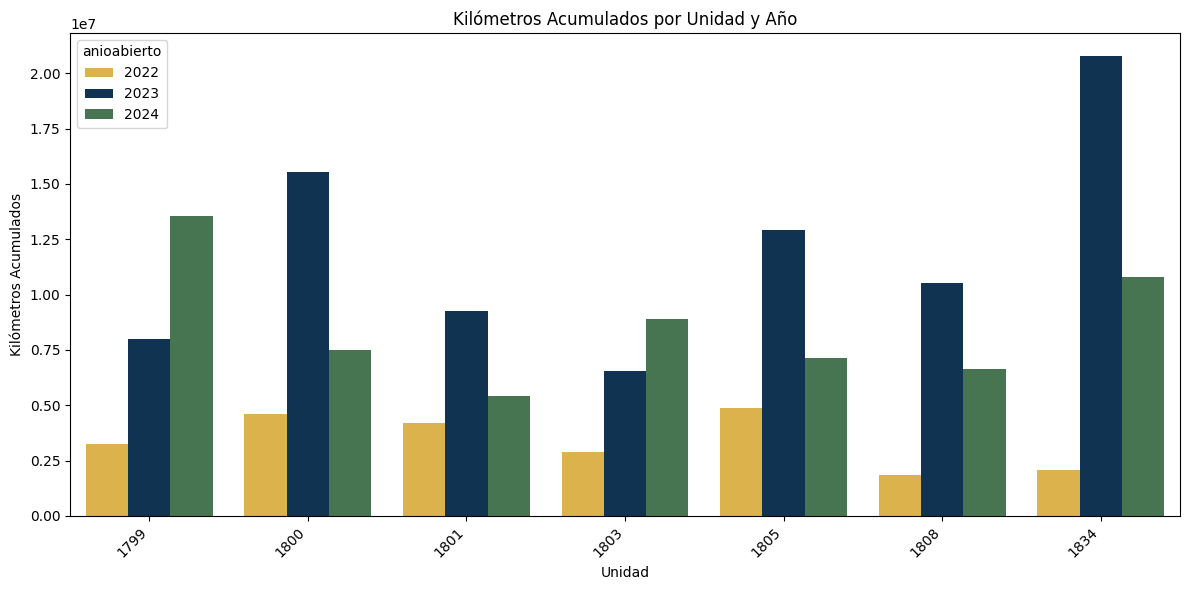

In [ ]:
# prompt: Haz una grafica de barras en seaborn con la info de este dataset: sayer_complete_unico_tractos_xAnio, donde uses al año como hue. La escala de colores es ['#f4bc34', '#04345c', '#407c4c']

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sayer_complete_unico_tractos_xAnio is already defined as in your provided code.

# Reset index to make 'Unidad' and 'anioabierto' columns
sayer_complete_unico_tractos_xAnio = sayer_complete_unico_tractos_xAnio.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Unidad', y='kms_acumulados', hue='anioabierto', data=sayer_complete_unico_tractos_xAnio, palette=['#f4bc34', '#04345c', '#407c4c'])
plt.xlabel('Unidad')
plt.ylabel('Kilómetros Acumulados')
plt.title('Kilómetros Acumulados por Unidad y Año')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Costos por Unidad

## General

### 2022

In [ ]:
sayer_costos_xUnidad_2022_General=sayer_2022_complete_General.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2022_General

Unidad
10171      10898.15
10172      11177.68
10173      44044.00
10175      13743.54
10176      17495.67
10177      12852.56
10180      20341.56
10181      43275.06
10183      74574.41
10186      33570.61
10187      20569.86
10188      11217.96
10190      55814.68
10191      20156.10
10192      20179.34
10193      37137.59
10195       7623.79
10196       9009.92
10197      45187.74
10207      26738.80
10211      20176.42
10213      25741.01
10216      12920.34
10221      32938.89
10223      39828.00
10224       8245.92
10231       2740.88
10232      11027.68
10244      18218.45
10248      12685.02
10249      29152.10
10255      43828.45
10258      12608.94
1799      178953.15
1800      291637.09
1801      278414.35
1803      238866.19
1805      336751.57
1808      161770.01
1834       94040.84
53846       1000.00
D-2161     12858.42
D-2164     34757.68
D-2165     20611.57
D-2168     44053.76
D-2169     15034.84
D-2170     10900.13
D-2172     49313.92
D-2175     41853.09
D-2187     47138.00
D-2188     36381.48
Name: SUBTOTAL, dtype: float64

### 2023

In [ ]:
sayer_costos_xUnidad_2023_General=sayer_2023_complete_General.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2023_General

Unidad
10171      23336.35
10172      43046.02
10173      11994.82
10175      28746.59
10176      26315.41
10177      44405.93
10180       3039.04
10181      10418.08
10183      35431.53
10186      39580.96
10187      23994.22
10188      39211.56
10190      25669.96
10191       7922.42
10192      28861.19
10193      18752.19
10195      11251.37
10196       9586.06
10197      11076.75
10207      22549.31
10211      21172.16
10213      26958.30
10216      24820.22
10221       7585.97
10223      22040.03
10224      17622.93
10231      44884.87
10232      22100.03
10244      20037.42
10248      34842.28
10249      18048.27
10255       4467.32
10258       6407.45
1799      211144.90
1800      346351.38
1801      198095.25
1803      173546.84
1805      290100.81
1808      277570.88
1834      314293.14
D-2161     50267.55
D-2164     32553.17
D-2165     66811.84
D-2168     65477.56
D-2169     28046.14
D-2170     38939.61
D-2172     33748.95
D-2175     58378.67
D-2187     68536.21
D-2188     23194.90
Name: SUBTOTAL, dtype: float64

### 2024

In [ ]:
sayer_costos_xUnidad_2024_General=sayer_2024_complete_General.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2024_General

Unidad
10171       2644.93
10172      14139.65
10173      12303.80
10175      11687.49
10176      18339.31
10177       5404.39
10180      23421.35
10181      17480.15
10183      28468.81
10186       5332.58
10187      19165.68
10188       8651.29
10190       1732.94
10191      18945.26
10192      10586.94
10193      24416.33
10195      11272.48
10196      23645.11
10197      30587.15
10207       2500.00
10211      11649.51
10213      25822.18
10216      11112.92
10221      24191.81
10223       4580.97
10224      16170.76
10231       2600.00
10232       1760.00
10244      21433.56
10248        140.00
10249      18324.87
10255       3485.18
10258      22083.04
1799      234237.56
1800      194333.86
1801      285321.47
1803      308243.87
1805      152687.89
1808      188770.11
1834      125060.62
D-2161     13197.02
D-2164     14870.50
D-2165     30890.66
D-2168     22446.24
D-2169     30977.20
D-2170     20764.20
D-2172     71781.90
D-2175     21083.37
D-2187     11382.37
D-2188     59763.27
Name: SUBTOTAL, dtype: float64

## Correctivo

### 2022

In [ ]:
sayer_costos_xUnidad_2022_Correctivo=sayer_2022_complete_Correctivo.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2022_Correctivo

Unidad
10171       2432.02
10172       4784.48
10173       5449.91
10175       9125.70
10176       7885.15
10177       3670.18
10180       3908.93
10181       6251.19
10183      29261.52
10186      10545.80
10187        500.00
10188       2833.85
10190       8061.48
10191        150.00
10192       6510.70
10195       2027.54
10196       4213.20
10197      30591.24
10207       2484.04
10211       3532.98
10213       5860.93
10216       7814.12
10223      23228.00
10224        360.00
10232       1698.73
10244       1090.00
10248       3180.98
10249       1466.92
10255      37900.00
10258        858.93
1799      139572.32
1800      106293.47
1801       68695.36
1803       90167.26
1805      119376.54
1808       41449.78
1834       27750.11
D-2161      7070.14
D-2164      7231.19
D-2165      2300.00
D-2168      7049.75
D-2169      1600.00
D-2170      4912.33
D-2172      4750.33
D-2175      1600.00
D-2187      5600.94
D-2188      1000.00
Name: SUBTOTAL, dtype: float64

### 2023

In [ ]:
sayer_costos_xUnidad_2023_Correctivo=sayer_2023_complete_Correctivo.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2023_Correctivo

Unidad
10172       5636.77
10173       8074.32
10175       7816.17
10176       7443.46
10177       6139.27
10181       2949.54
10183      18802.33
10186       2669.73
10187      15264.76
10188       4099.80
10192       6262.63
10193       5119.98
10195       5304.84
10196       6685.84
10197        220.00
10207       2848.87
10211        441.62
10213       9649.12
10216       2041.05
10221       7045.97
10223      10990.63
10231      11240.37
10232       2826.81
10244       6306.00
10248      16984.11
10249      15698.27
10255       2520.15
10258        550.00
1799       86141.34
1800      163237.69
1801       76452.49
1803       85480.40
1805      108618.17
1808      127400.72
1834      152566.92
D-2161     17858.87
D-2164     13911.55
D-2165     54183.92
D-2168     43816.85
D-2169      8009.25
D-2170     19425.37
D-2172     11164.63
D-2175     48608.02
D-2187     24625.34
D-2188     16453.19
Name: SUBTOTAL, dtype: float64

### 2024

In [ ]:
sayer_costos_xUnidad_2024_Correctivo=sayer_2024_complete_Correctivo.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2024_Correctivo

Unidad
10171        591.83
10172       2801.02
10173       6235.82
10175       5832.19
10176       7159.31
10177       1384.39
10180       5076.32
10181       3247.66
10183       1391.62
10186       3814.58
10187       1913.20
10188       5201.79
10190        992.94
10191         82.00
10192        403.64
10193       2176.83
10195       4102.48
10196       1612.70
10197       6481.11
10211       9599.31
10213       4522.58
10216       2358.49
10221       7719.41
10223        865.87
10224       2510.84
10244       2300.20
10249       1678.03
10255        885.18
1799       82313.39
1800      149581.77
1801      168456.31
1803      166774.62
1805       92741.14
1808      110705.57
1834       93684.37
D-2161      8934.30
D-2164      8650.35
D-2165     10692.38
D-2168     13358.05
D-2169     14546.80
D-2170     12106.05
D-2172     15079.66
D-2175      4857.90
D-2187      2437.93
D-2188     36329.15
Name: SUBTOTAL, dtype: float64

## Preventivo

### 2022

In [ ]:
sayer_costos_xUnidad_2022_Preventivo=sayer_2022_complete_Preventivo.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2022_Preventivo

Unidad
10171       6276.13
10172       5543.20
10173      36349.94
10175       2060.88
10176       5410.52
10177       8982.38
10180      13959.98
10181      33630.56
10183      12911.52
10186      21895.78
10187      19969.86
10188       4948.68
10190      25196.66
10191      16806.10
10192      13668.64
10193      27367.59
10195       5596.25
10196       3496.54
10197       6346.50
10207      18916.62
10211       9966.60
10213      17761.38
10216       4037.42
10221      29138.89
10223       1300.00
10224       7885.92
10231       2740.88
10232       5282.02
10244      14720.56
10248       6415.60
10249      26685.18
10255       3111.32
10258       9255.01
1799       31549.72
1800       57856.28
1801      155204.31
1803       87876.87
1805      103121.57
1808       91823.92
1834       56647.15
53846       1000.00
D-2161      1864.70
D-2164     25415.24
D-2165     14079.68
D-2168     35704.60
D-2169     13434.84
D-2170      4587.80
D-2172     39822.88
D-2175     39709.16
D-2187     35027.00
D-2188     35147.00
Name: SUBTOTAL, dtype: float64

### 2023

In [ ]:
sayer_costos_xUnidad_2023_Preventivo=sayer_2023_complete_Preventivo.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2023_Preventivo

Unidad
10171      22075.10
10172      14841.05
10173       2250.00
10175      19744.84
10176      17644.84
10177      29153.47
10180       2000.00
10181       1365.00
10183       8854.35
10186      33086.68
10187       3528.84
10188      17644.84
10190      25669.96
10191       7742.42
10192      18460.78
10193      11452.21
10195       3300.00
10196       2300.00
10197       9956.75
10207       2300.00
10211      15661.52
10213       8833.26
10216      21124.77
10221        540.00
10223       6214.20
10224      17622.93
10231      33123.50
10232      17719.42
10244      13731.42
10248      16884.84
10249       2000.00
10255       1690.00
10258       5227.45
1799       95751.33
1800       94456.08
1801       90135.80
1803       13145.27
1805       87570.17
1808       94754.89
1834      113849.93
D-2161     14770.42
D-2164     15250.32
D-2165     10152.06
D-2168     18050.68
D-2169     15976.00
D-2170     13992.73
D-2172     18050.68
D-2175      1070.00
D-2187      9193.44
D-2188      2300.00
Name: SUBTOTAL, dtype: float64

### 2024

In [ ]:
sayer_costos_xUnidad_2024_Preventivo=sayer_2024_complete_Preventivo.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2024_Preventivo

Unidad
10171       1455.00
10172       1395.00
10173       2600.00
10175       1300.00
10176       8120.00
10177       2600.00
10180      15500.07
10181      10186.20
10183       1300.00
10186       1518.00
10187       1300.00
10188       1300.00
10190        140.00
10191      18244.26
10192       8120.00
10193      21439.50
10195       4500.00
10196      19882.40
10197      24106.04
10207       1300.00
10211       1300.00
10213      16472.40
10216       8518.22
10221      16472.40
10223       2600.00
10224      13659.92
10231       2600.00
10232       1300.00
10244      14822.00
10248        140.00
10249       1302.00
10255       1400.00
10258      21483.04
1799      106073.39
1800       38199.15
1801      102493.38
1803      103795.25
1805       25856.21
1808       65292.83
1834       17909.65
D-2161      2586.89
D-2164      1163.00
D-2165     17776.40
D-2168      1300.00
D-2169     15080.00
D-2170      2987.93
D-2172     17203.86
D-2175      2185.36
D-2187      2600.00
D-2188     14940.00
Name: SUBTOTAL, dtype: float64

## Auxilio

### 2022

In [ ]:
sayer_costos_xUnidad_2022_Auxilio=sayer_2022_complete_Auxilio.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2022_Auxilio

Unidad
10171       2190.00
10172        850.00
10173       2244.15
10175       2556.96
10176       4200.00
10177        200.00
10180       2472.65
10181       3393.31
10183      32401.37
10186       1129.03
10187        100.00
10188       3435.43
10190      22556.54
10191       3200.00
10193       9770.00
10196       1300.18
10197       8250.00
10207       5338.14
10211       6676.84
10213       2118.70
10216       1068.80
10221       3800.00
10223      15300.00
10232       4046.93
10244       2407.89
10248       3088.44
10249       1000.00
10255       2817.13
10258       2495.00
1799        7831.11
1800      127487.34
1801       54514.68
1803       60822.06
1805      114253.46
1808       28496.31
1834        9643.58
D-2161      3923.58
D-2164      2111.25
D-2165      4231.89
D-2168      1299.41
D-2170      1400.00
D-2172      4740.71
D-2175       543.93
D-2187      6510.06
D-2188       234.48
Name: SUBTOTAL, dtype: float64

### 2023

In [ ]:
sayer_costos_xUnidad_2023_Auxilio=sayer_2023_complete_Auxilio.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2023_Auxilio

Unidad
10171      1261.25
10172     22568.20
10173      1670.50
10175      1185.58
10176      1227.11
10177      9113.19
10180      1039.04
10181      6103.54
10183      7774.85
10186      3824.55
10187      5200.62
10188     17466.92
10191       180.00
10192      4137.78
10193      2180.00
10195      2646.53
10196       600.22
10197       900.00
10207     17400.44
10211      5069.02
10213      8475.92
10216      1654.40
10223      4835.20
10231       521.00
10232      1553.80
10248       973.33
10249       350.00
10255       257.17
10258       630.00
1799      29252.23
1800      88657.61
1801      31506.96
1803      74921.17
1805      93912.47
1808      55415.27
1834      47876.29
D-2161    17638.26
D-2164     3391.30
D-2165     2475.86
D-2168     3610.03
D-2169     4060.89
D-2170     5521.51
D-2172     4533.64
D-2175     8700.65
D-2187    34717.43
D-2188     4441.71
Name: SUBTOTAL, dtype: float64

### 2024

In [ ]:
sayer_costos_xUnidad_2024_Auxilio=sayer_2024_complete_Auxilio.groupby('Unidad')['SUBTOTAL'].sum()
sayer_costos_xUnidad_2024_Auxilio

Unidad
10171       598.10
10172      9943.63
10173      3467.98
10175      4555.30
10176      3060.00
10177      1420.00
10180      2844.96
10181      4046.29
10183     25777.19
10187     15952.48
10188      2149.50
10190       600.00
10191       619.00
10192      2063.30
10193       800.00
10195      2670.00
10196      2150.01
10207      1200.00
10211       750.20
10213      4827.20
10216       236.21
10223      1115.10
10232       460.00
10244      4311.36
10249     15344.84
10255      1200.00
10258       600.00
1799      45850.78
1800       6552.94
1801      14371.78
1803      37674.00
1805      34090.54
1808      12771.71
1834      13466.60
D-2161     1675.83
D-2164     5057.15
D-2165     2421.88
D-2168     7788.19
D-2169     1350.40
D-2170     5670.22
D-2172    39498.38
D-2175    14040.11
D-2187     6344.44
D-2188     8494.12
Name: SUBTOTAL, dtype: float64

# Costos totales

## General

### 2022

In [ ]:
sayer_costos_2022_General=sayer_2022_complete_General.SUBTOTAL.sum()
sayer_costos_2022_General

2700057.21

### 2023

In [ ]:
sayer_costos_2023_General=sayer_2023_complete_General.SUBTOTAL.sum()
sayer_costos_2023_General

3013234.8099999996

### 2024

In [ ]:
sayer_costos_2024_General=sayer_2024_complete_General.SUBTOTAL.sum()
sayer_costos_2024_General

2239892.55

In [ ]:

cost_data = {
    'Año': [2022, 2023, 2024],
    'Costo Total': [sayer_costos_2022_General, sayer_costos_2023_General, sayer_costos_2024_General]
}

# Create the DataFrame
costos_general = pd.DataFrame(cost_data)

# Display the DataFrame
costos_general

Año  Costo Total
0  2022   2700057.21
1  2023   3013234.81
2  2024   2239892.55

## Preventivo

### 2022

In [ ]:
sayer_costos_2022_Preventivo=sayer_2022_complete_Preventivo.SUBTOTAL.sum()
sayer_costos_2022_Preventivo

1257507.83

### 2023


In [ ]:
sayer_costos_2023_Preventivo=sayer_2023_complete_Preventivo.SUBTOTAL.sum()
sayer_costos_2023_Preventivo

1122214.24

### 2024

In [ ]:
sayer_costos_2024_Preventivo=sayer_2024_complete_Preventivo.SUBTOTAL.sum()
sayer_costos_2024_Preventivo

785819.75

In [ ]:
# prompt: haz un dataframe con sayer_costos_202x_Preventivo de los tres años

cost_data_preventivo = {
    'Año': [2022, 2023, 2024],
    'Costo Total Preventivo': [sayer_costos_2022_Preventivo, sayer_costos_2023_Preventivo, sayer_costos_2024_Preventivo]
}
costos_Preventivo = pd.DataFrame(cost_data_preventivo)
costos_Preventivo['Tipo']='Preventivo'
costos_Preventivo

Año  Costo Total Preventivo        Tipo
0  2022              1257507.83  Preventivo
1  2023              1122214.24  Preventivo
2  2024               785819.75  Preventivo

## Correctivo

### 2022

In [ ]:
sayer_costos_2022_Correctivo=sayer_2022_complete_Correctivo.SUBTOTAL.sum()
sayer_costos_2022_Correctivo

864098.04

### 2023

In [ ]:
sayer_costos_2023_Correctivo=sayer_2023_complete_Correctivo.SUBTOTAL.sum()
sayer_costos_2023_Correctivo

1249587.13

### 2024

In [ ]:
sayer_costos_2024_Correctivo=sayer_2024_complete_Correctivo.SUBTOTAL.sum()
sayer_costos_2024_Correctivo

1084191.08

In [ ]:
# prompt: haz un dataframe con sayer_costos_202x_Correctivo de los 3 años

cost_data_correctivo = {
    'Año': [2022, 2023, 2024],
    'Costo Total Correctivo': [sayer_costos_2022_Correctivo, sayer_costos_2023_Correctivo, sayer_costos_2024_Correctivo]
}
costos_Correctivo = pd.DataFrame(cost_data_correctivo)
costos_Correctivo['Tipo']='Correctivo'
costos_Correctivo

Año  Costo Total Correctivo        Tipo
0  2022               864098.04  Correctivo
1  2023              1249587.13  Correctivo
2  2024              1084191.08  Correctivo

## Auxilio

### 2022

In [ ]:
sayer_costos_2022_Auxilio=sayer_2022_complete_Auxilio.SUBTOTAL.sum()
sayer_costos_2022_Auxilio

578451.34

### 2023

In [ ]:
sayer_costos_2023_Auxilio=sayer_2023_complete_Auxilio.SUBTOTAL.sum()
sayer_costos_2023_Auxilio

641433.44

### 2024

In [ ]:
sayer_costos_2024_Auxilio=sayer_2024_complete_Auxilio.SUBTOTAL.sum()
sayer_costos_2024_Auxilio

369881.72

In [ ]:
# prompt: haz un dataframe con sayer_costos_202x_Auxilio de los tres años

cost_data_auxilio = {
    'Año': [2022, 2023, 2024],
    'Costo Total Auxilio': [sayer_costos_2022_Auxilio, sayer_costos_2023_Auxilio, sayer_costos_2024_Auxilio]
}
costos_Auxilio = pd.DataFrame(cost_data_auxilio)
costos_Auxilio['Tipo']='Auxilio'
costos_Auxilio

Año  Costo Total Auxilio     Tipo
0  2022            578451.34  Auxilio
1  2023            641433.44  Auxilio
2  2024            369881.72  Auxilio

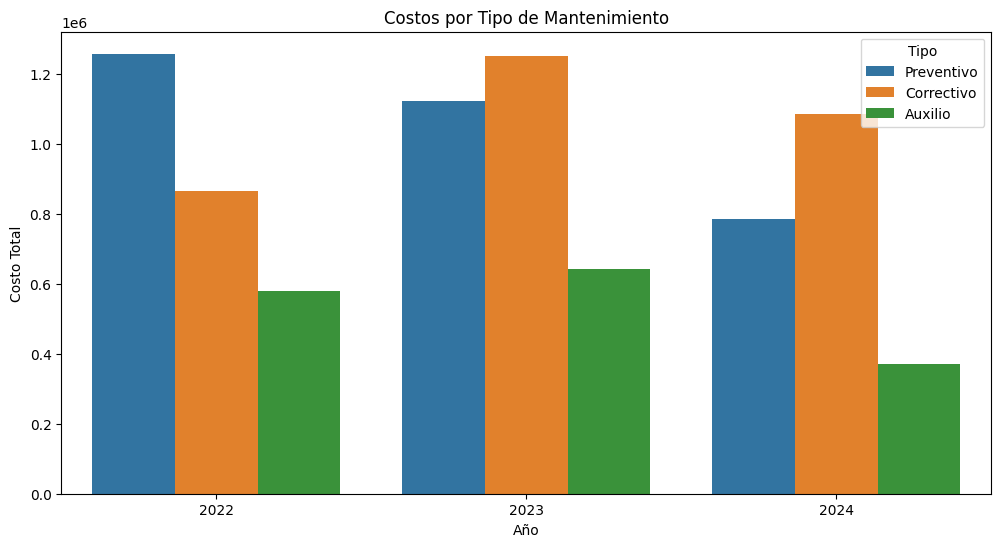

In [ ]:
# prompt: Junta los costos costos_Auxilio, etc en un solo dataframe y grafica los costos por tipo. usa seaborn

# Combine all cost dataframes
costos_all = pd.concat([costos_general, costos_Preventivo, costos_Correctivo, costos_Auxilio])

# Melt the dataframe to long format for plotting
costos_melted = costos_all.melt(id_vars=['Año', 'Tipo'], var_name='Costo_Tipo', value_name='Costo')

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Costo', hue='Tipo', data=costos_melted)
plt.title('Costos por Tipo de Mantenimiento')
plt.xlabel('Año')
plt.ylabel('Costo Total')
plt.show()

## Conjunto de costos por tipo de mantenimiento

## Preparando los DF para graficar - MTBF


In [ ]:
MTBF_2022=pd.concat([sayer_2022_Correctivo_MTBF,sayer_2022_Preventivo_MTBF,sayer_2022_Auxilio_MTBF])

In [ ]:
MTBF_2023=pd.concat([sayer_2023_Correctivo_MTBF,sayer_2023_Preventivo_MTBF,sayer_2023_Auxilio_MTBF])

In [ ]:
MTBF_2024=pd.concat([sayer_2024_Correctivo_MTBF,sayer_2024_Preventivo_MTBF,sayer_2024_Auxilio_MTBF])

In [ ]:
MTBF_General_anios=pd.concat([sayer_2022_General_MTBF,sayer_2023_General_MTBF,sayer_2024_General_MTBF])

## Preparando los DF para graficar - MTTR

In [ ]:
MTTR_2022=pd.concat([sayer_2022_Correctivo_MTTR,sayer_2022_Preventivo_MTTR,sayer_2022_Auxilio_MTTR])

In [ ]:
MTTR_2023=pd.concat([sayer_2023_Correctivo_MTTR,sayer_2023_Preventivo_MTTR,sayer_2023_Auxilio_MTTR])

In [ ]:
MTTR_2024=pd.concat([sayer_2024_Correctivo_MTTR,sayer_2024_Preventivo_MTTR,sayer_2024_Auxilio_MTTR])

# Graficas Patrones de MTBF y MTTR

## Gráfica de barras

### MTBF

Explicación: Se grafica cada unidad con su MTBF por año, comparado además por tipo de mantenimiento: Correctivo, Preventivo o Auxilio vial

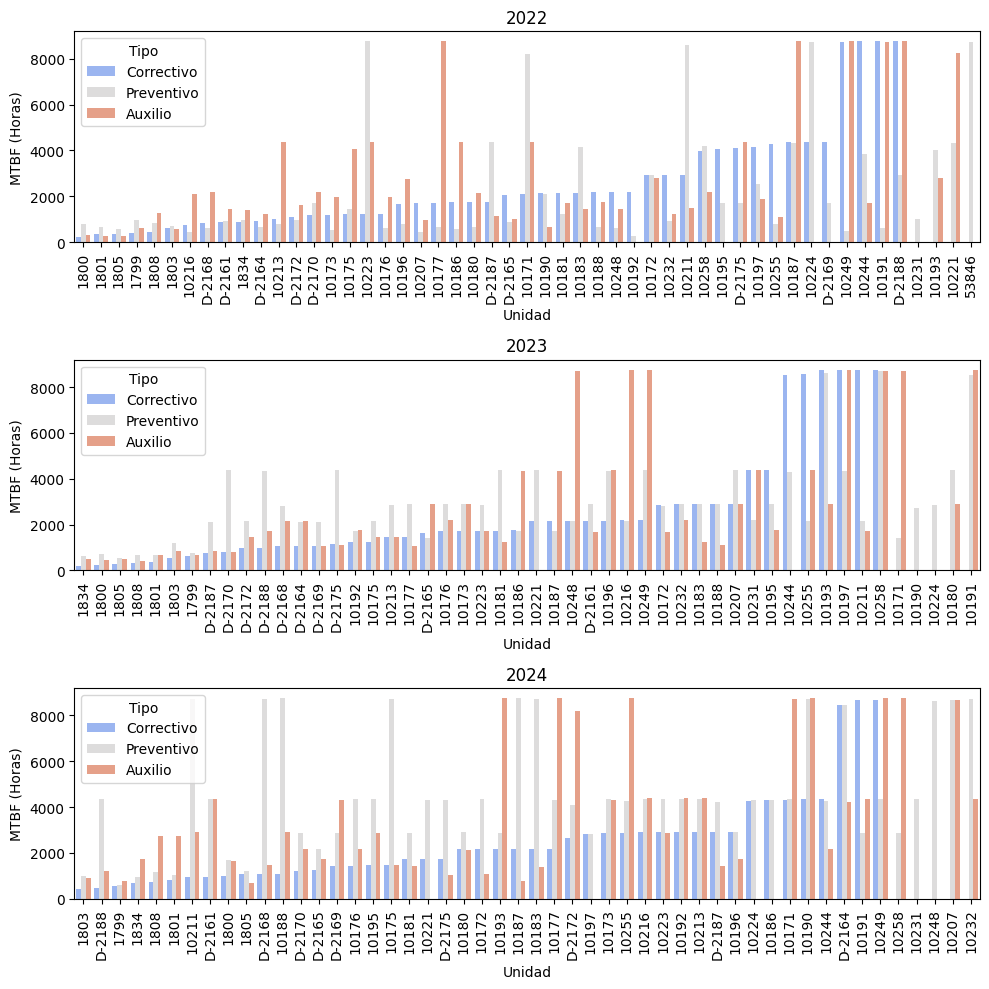

In [ ]:
f_MTBF=plt.figure(figsize=(10,10))
gs=f_MTBF.add_gridspec(3,1)

ax1=f_MTBF.add_subplot(gs[0,0])
sns.barplot(data=MTBF_2022,x=MTBF_2022.index,y=MTBF_2022['MTBF'],hue='Tipo',palette='coolwarm',ax=ax1)
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
plt.title('2022')

ax2=f_MTBF.add_subplot(gs[1,0])
sns.barplot(data=MTBF_2023,x=MTBF_2023.index,y=MTBF_2023['MTBF'],hue='Tipo',palette='coolwarm',ax=ax2)
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
plt.title('2023')

ax3=f_MTBF.add_subplot(gs[2,0])
sns.barplot(data=MTBF_2024,x=MTBF_2024.index,y=MTBF_2024['MTBF'],hue='Tipo',palette='coolwarm',ax=ax3)
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
plt.title('2024')

f_MTBF.tight_layout()

In [ ]:
f_MTBF.savefig('f_MTBF.png')
from google.colab import files
files.download('f_MTBF.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MTBF General

In [ ]:
sayer_costos_xUnidad_2022_General = sayer_costos_xUnidad_2022_General.to_frame()
sayer_costos_xUnidad_2023_General = sayer_costos_xUnidad_2023_General.to_frame()
sayer_costos_xUnidad_2024_General = sayer_costos_xUnidad_2024_General.to_frame()

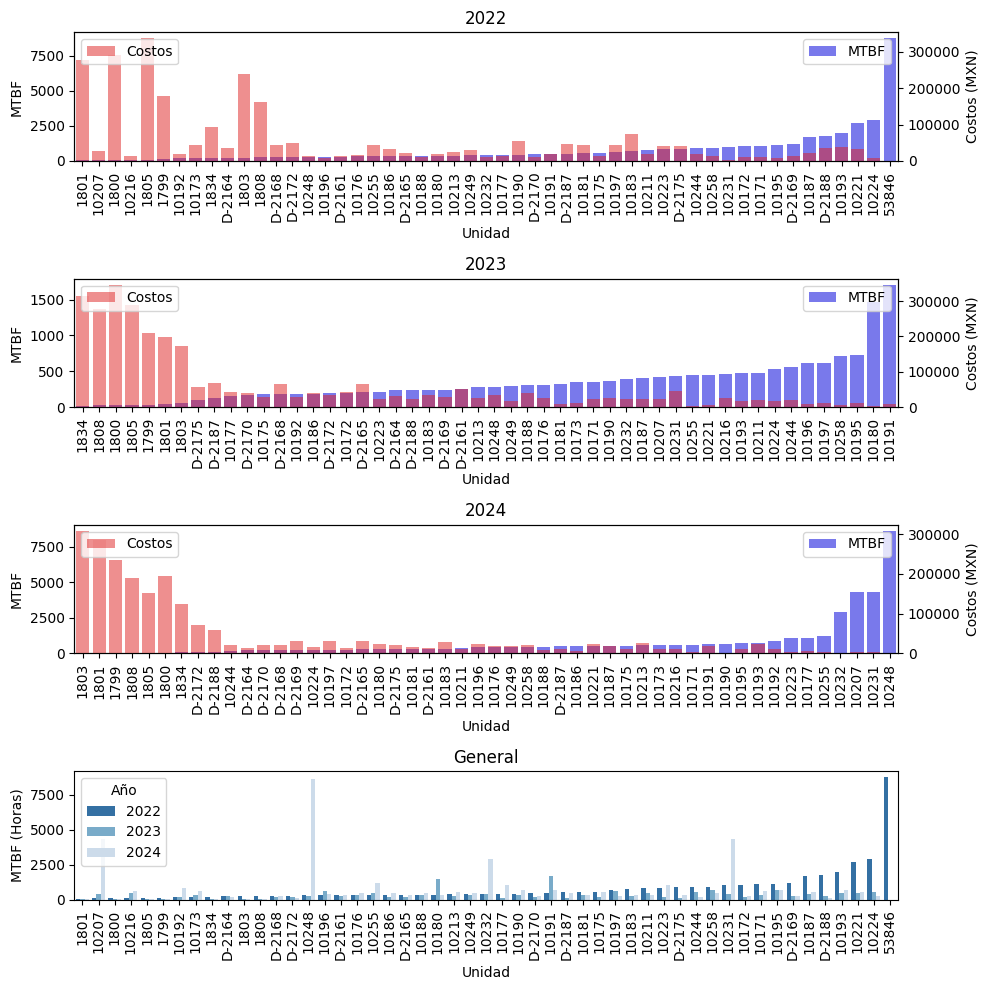

In [ ]:
f_MTBF_General=plt.figure(figsize=(10,10))
gs=f_MTBF_General.add_gridspec(4,1)

ax1=f_MTBF_General.add_subplot(gs[0,0])
ax1twin=ax1.twinx()

common_units=sayer_2022_General_MTBF.index.intersection(sayer_costos_xUnidad_2022_General.index)
ax1.set_xticks(range(len(common_units)))
ax1.set_xticklabels(common_units, rotation=90)

all_units=sayer_2022_General_MTBF.index.union(sayer_costos_xUnidad_2022_General.index)


sns.barplot(data=sayer_2022_General_MTBF,x=sayer_2022_General_MTBF.index,y=sayer_2022_General_MTBF['MTBF'],ax=ax1,alpha=0.6,color='blue',label='MTBF')
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
sns.barplot(data=sayer_costos_xUnidad_2022_General,x=sayer_costos_xUnidad_2022_General.index,y=sayer_costos_xUnidad_2022_General['SUBTOTAL'],alpha=0.5,ax=ax1twin,color='red',label='Costos')
plt.xticks(rotation=90)
plt.ylabel('Costos (MXN)')
plt.title('2022')
ax1.legend(loc='upper right')
ax1twin.legend(loc='upper left')

f_MTBF_General.tight_layout()

ax2=f_MTBF_General.add_subplot(gs[1,0])
ax2twin=ax2.twinx()

common_units=sayer_2023_General_MTBF.index.intersection(sayer_costos_xUnidad_2023_General.index)
ax2.set_xticks(range(len(common_units)))
ax2.set_xticklabels(common_units, rotation=90)

all_units=sayer_2023_General_MTBF.index.union(sayer_costos_xUnidad_2023_General.index)


sns.barplot(data=sayer_2023_General_MTBF,x=sayer_2023_General_MTBF.index,y=sayer_2023_General_MTBF['MTBF'],color='blue',alpha=0.6,ax=ax2,label='MTBF')
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
sns.barplot(data=sayer_costos_xUnidad_2023_General,x=sayer_costos_xUnidad_2023_General.index,y=sayer_costos_xUnidad_2023_General['SUBTOTAL'],alpha=0.5,ax=ax2twin,color='red',label='Costos')
plt.xticks(rotation=90)
plt.ylabel('Costos (MXN)')
plt.title('2023')
ax2.legend(loc='upper right')
ax2twin.legend(loc='upper left')


ax3=f_MTBF_General.add_subplot(gs[2,0])
ax3twin=ax3.twinx()

common_units=sayer_2024_General_MTBF.index.intersection(sayer_costos_xUnidad_2024_General.index)
ax3.set_xticks(range(len(common_units)))
ax3.set_xticklabels(common_units, rotation=90)

all_units=sayer_2024_General_MTBF.index.union(sayer_costos_xUnidad_2024_General.index)
sns.barplot(data=sayer_2024_General_MTBF,x=sayer_2024_General_MTBF.index,y=sayer_2024_General_MTBF['MTBF'],ax=ax3,color='blue',alpha=0.6,label='MTBF')
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
sns.barplot(data=sayer_costos_xUnidad_2024_General,x=sayer_costos_xUnidad_2024_General.index,y=sayer_costos_xUnidad_2024_General['SUBTOTAL'],alpha=0.5,ax=ax3twin,color='red',label='Costos')
plt.xticks(rotation=90)
plt.ylabel('Costos (MXN)')
plt.title('2024')
ax3.legend(loc='upper right')
ax3twin.legend(loc='upper left')

ax4=f_MTBF_General.add_subplot(gs[3,0])
sns.barplot(data=MTBF_General_anios,x=MTBF_General_anios.index,y=MTBF_General_anios['MTBF'],hue='Anio',palette='Blues_r',dodge=True,hue_order=['2022','2023','2024'],ax=ax4)
plt.xticks(rotation=90)
plt.ylabel('MTBF (Horas)')
plt.legend(title='Año', )
plt.title('General')



f_MTBF_General.tight_layout()

In [ ]:
f_MTBF_General.savefig('f_MTBF_General.png')
from google.colab import files
files.download('f_MTBF_General.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MTTR

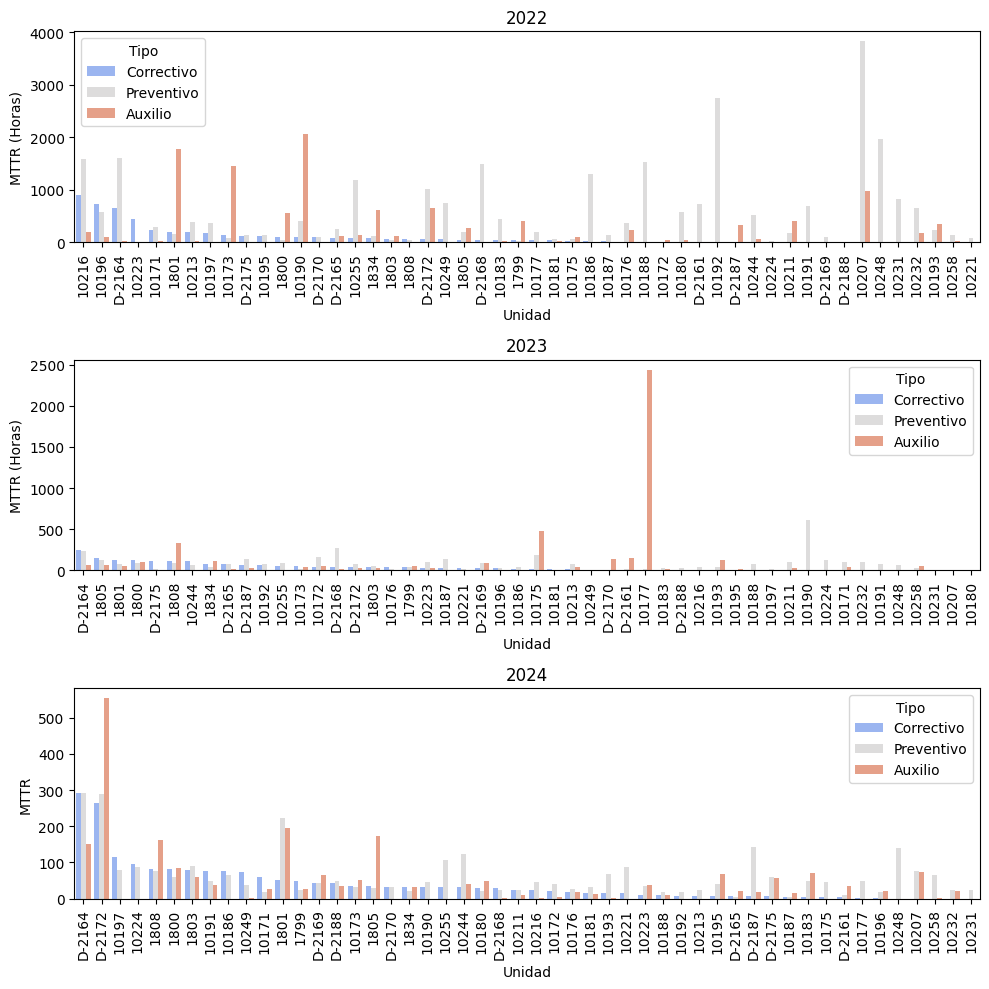

In [ ]:
f_MTTR=plt.figure(figsize=(10,10))
gs=f_MTTR.add_gridspec(3,1)
ax1=f_MTTR.add_subplot(gs[0,0])
sns.barplot(data=MTTR_2022,x=MTTR_2022.index,y=MTTR_2022['MTTR'],hue='Tipo',palette='coolwarm',ax=ax1)
plt.xticks(rotation=90)
plt.ylabel('MTTR (Horas)')
plt.title('2022')

ax2=f_MTTR.add_subplot(gs[1,0])
sns.barplot(data=MTTR_2023,x=MTTR_2023.index,y=MTTR_2023['MTTR'],hue='Tipo',palette='coolwarm',ax=ax2)
plt.xticks(rotation=90)
plt.ylabel('MTTR (Horas)')
plt.title('2023')

ax3=f_MTTR.add_subplot(gs[2,0])
sns.barplot(data=MTTR_2024,x=MTTR_2024.index,y=MTTR_2024['MTTR'],hue='Tipo',palette='coolwarm',ax=ax3)
plt.xticks(rotation=90)
plt.title('2024')

f_MTTR.tight_layout()

In [ ]:
f_MTTR.savefig('f_MTTR.png')
from google.colab import files
files.download('f_MTTR.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Encontrando valor de MTBF y MTTR

## Regresiones

## MTBF vs Costos

Hacer una gráfica de dispersión - Por cada tipo de mantenimiento

a. Costos vs MTBF

b. Kilometraje vs MTBF

### General

In [ ]:
sayer_costos_MTBF_2022_General=pd.merge(sayer_2022_General_MTBF,sayer_costos_xUnidad_2022_General, left_index=True, right_index=True)

In [ ]:
sayer_costos_MTBF_2023_General=pd.merge(sayer_2023_General_MTBF,sayer_costos_xUnidad_2023_General, left_index=True, right_index=True)

In [ ]:
sayer_costos_MTBF_2024_General=pd.merge(sayer_2024_General_MTBF,sayer_costos_xUnidad_2024_General, left_index=True, right_index=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

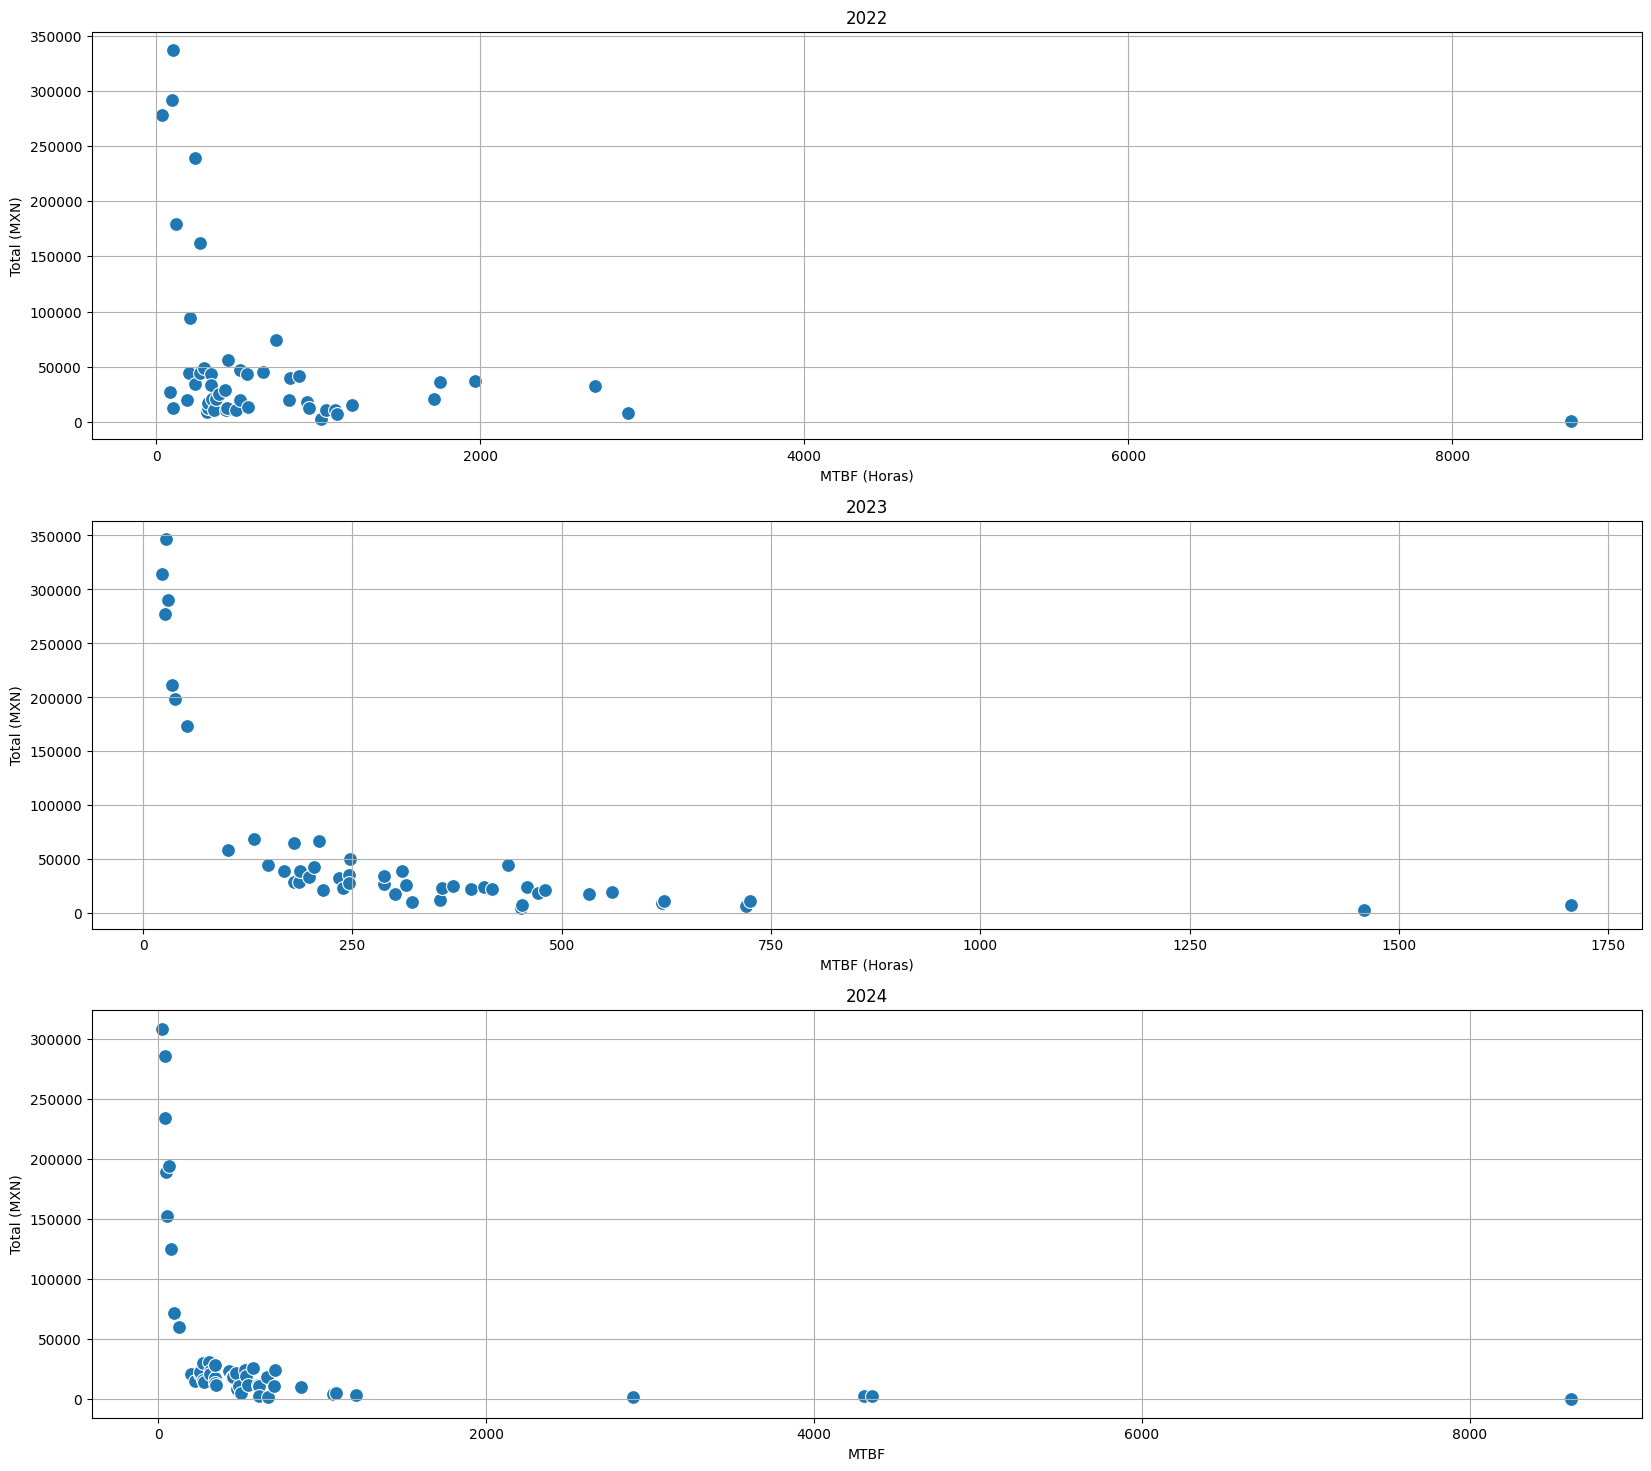

In [ ]:
f_costo_MTBF_General=plt.figure(figsize=(20,18))
gs=f_costo_MTBF_General.add_gridspec(3,1)

ax1=f_costo_MTBF_General.add_subplot(gs[0,0])
sns.scatterplot(x=sayer_costos_MTBF_2022_General['MTBF'],y=sayer_costos_MTBF_2022_General['SUBTOTAL'],data=sayer_costos_MTBF_2022_General,ax=ax1,s=100)
plt.title('2022')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax1.grid()

ax2=f_costo_MTBF_General.add_subplot(gs[1,0])
sns.scatterplot(x=sayer_costos_MTBF_2023_General['MTBF'],y=sayer_costos_MTBF_2023_General['SUBTOTAL'],data=sayer_costos_MTBF_2023_General,ax=ax2,s=100)
plt.title('2023')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax2.grid()

ax3=f_costo_MTBF_General.add_subplot(gs[2,0])
sns.scatterplot(x=sayer_costos_MTBF_2024_General['MTBF'],y=sayer_costos_MTBF_2024_General['SUBTOTAL'],data=sayer_costos_MTBF_2024_General,ax=ax3,s=100)
plt.title('2024')
plt.ylabel('Total (MXN)')
ax3.grid()
plt


In [ ]:
X=sayer_costos_MTBF_2023_General[['MTBF']] # Convert X to a DataFrame using double brackets
y=sayer_costos_MTBF_2023_General['SUBTOTAL']
model = LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y,y_pred)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 5446429555.035841
Coeficiente de Determinación (R^2): 0.2387056903657332


### Correctivos

### 2022

In [ ]:
sayer_costos_MTBF_2022_Correctivo=pd.merge(sayer_2022_Correctivo_MTBF,sayer_costos_xUnidad_2022_Correctivo, left_index=True, right_index=True)

### 2023

In [ ]:
sayer_costos_MTBF_2023_Correctivo=pd.merge(sayer_2023_Correctivo_MTBF,sayer_costos_xUnidad_2023_Correctivo, left_index=True, right_index=True)

### 2024

In [ ]:
sayer_costos_MTBF_2024_Correctivo=pd.merge(sayer_2024_Correctivo_MTBF,sayer_costos_xUnidad_2024_Correctivo, left_index=True, right_index=True)

Gráfica de regresión -
Costos vs MTBF

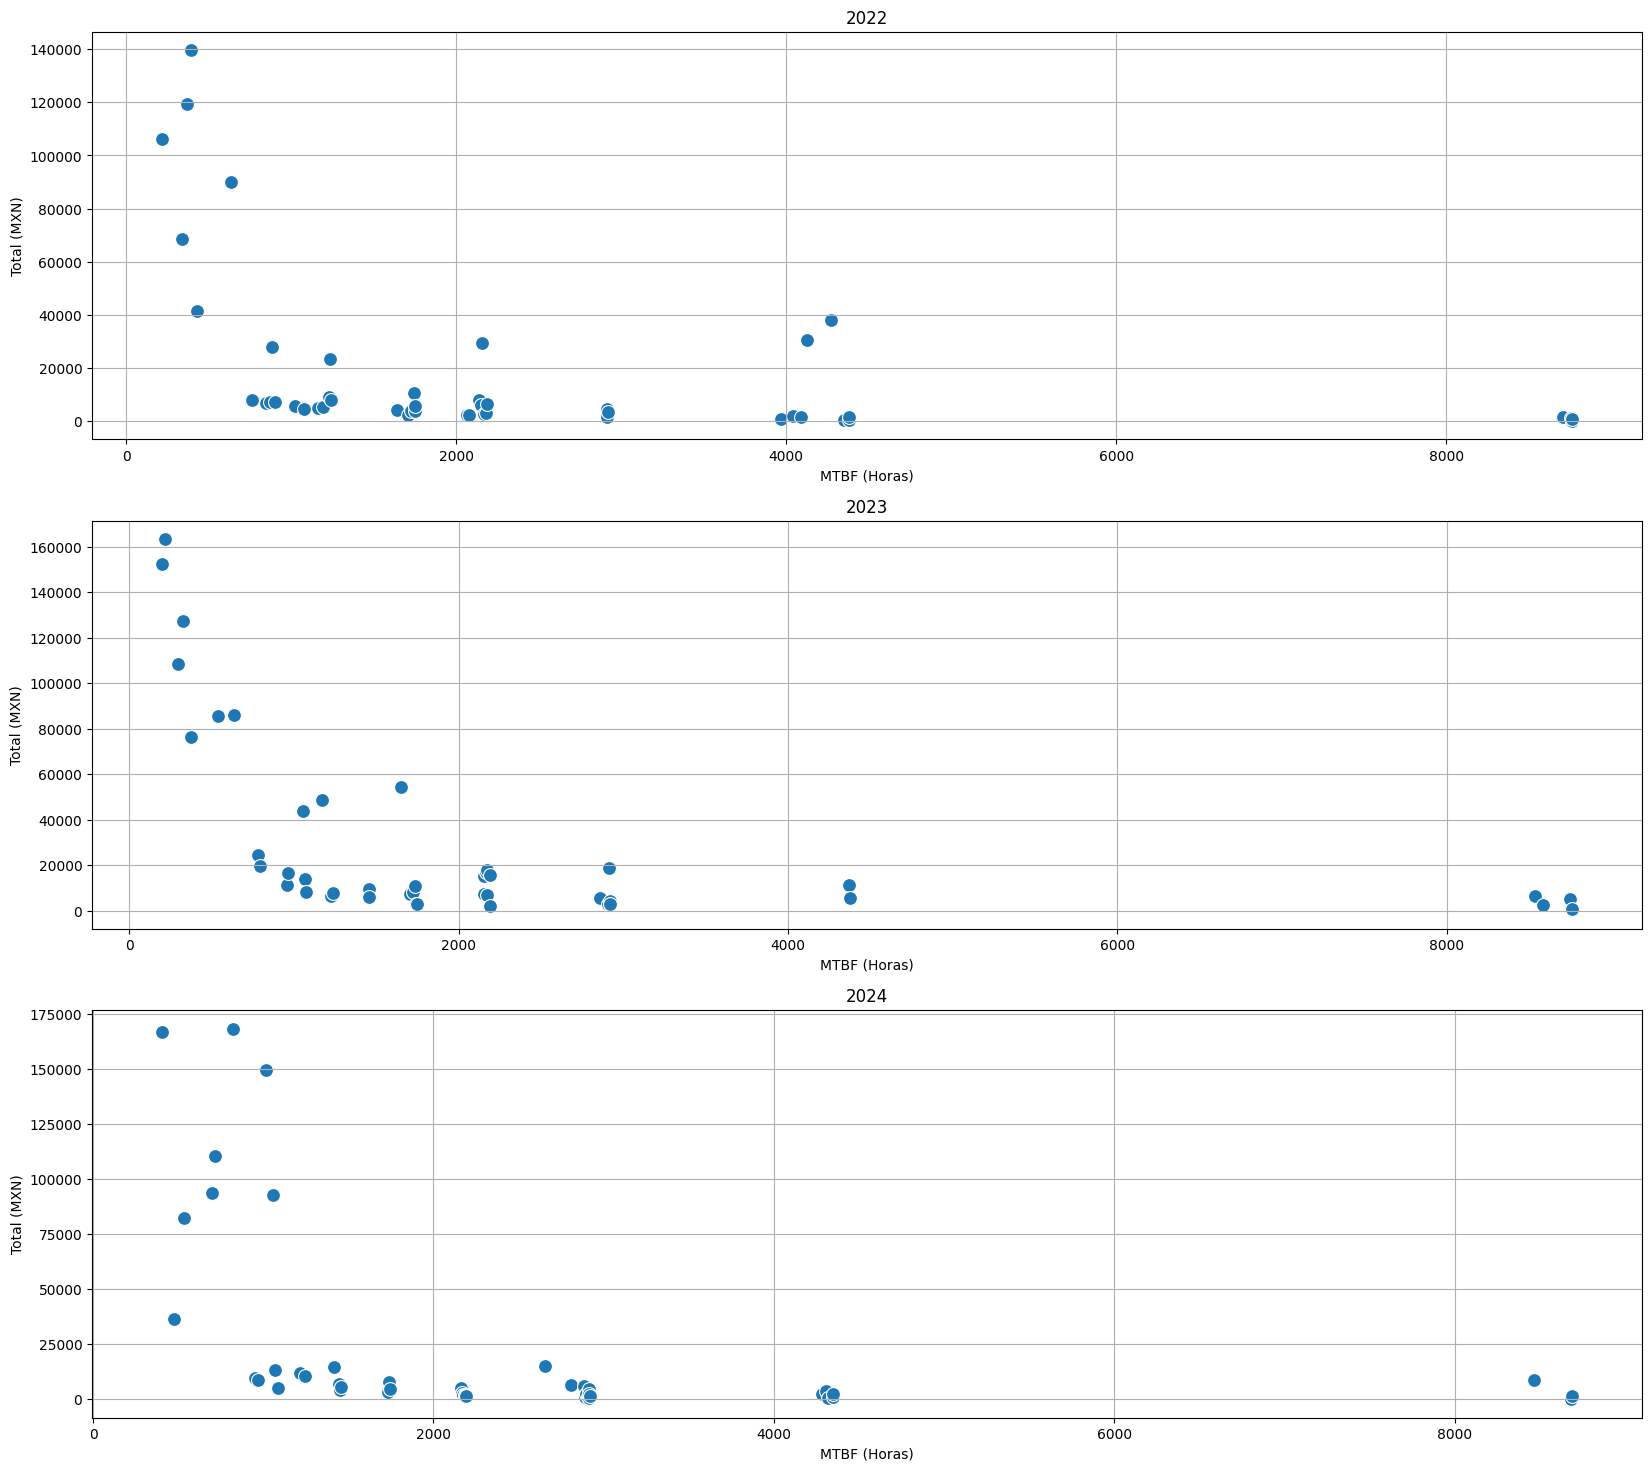

In [ ]:
f_costo_MTBF_Correctivo=plt.figure(figsize=(20,18))
gs=f_costo_MTBF_Correctivo.add_gridspec(3,1)

ax1=f_costo_MTBF_Correctivo.add_subplot(gs[0,0])
sns.scatterplot(x=sayer_costos_MTBF_2022_Correctivo['MTBF'],y=sayer_costos_MTBF_2022_Correctivo['SUBTOTAL'],data=sayer_costos_MTBF_2022_Correctivo,ax=ax1,s=100)
plt.title('2022')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax1.grid()

ax2=f_costo_MTBF_Correctivo.add_subplot(gs[1,0])
sns.scatterplot(x=sayer_costos_MTBF_2023_Correctivo['MTBF'],y=sayer_costos_MTBF_2023_Correctivo['SUBTOTAL'],data=sayer_costos_MTBF_2023_Correctivo,ax=ax2,s=100)
plt.title('2023')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax2.grid()

ax3=f_costo_MTBF_Correctivo.add_subplot(gs[2,0])
sns.scatterplot(x=sayer_costos_MTBF_2024_Correctivo['MTBF'],y=sayer_costos_MTBF_2024_Correctivo['SUBTOTAL'],data=sayer_costos_MTBF_2024_Correctivo,ax=ax3,s=100)
plt.title('2024')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax3.grid()


In [ ]:
#f_costo_MTBF_Correctivo.savefig('f_costo_MTBF_Correctivo.png')
#from google.colab import files
#files.download('f_costo_MTBF_Correctivo.png')

### Preventivos

### 2022

In [ ]:
sayer_costos_MTBF_2022_Preventivo=pd.merge(sayer_2022_Preventivo_MTBF,sayer_costos_xUnidad_2022_Preventivo, left_index=True, right_index=True)

### 2023

In [ ]:
sayer_costos_MTBF_2023_Preventivo=pd.merge(sayer_2023_Preventivo_MTBF,sayer_costos_xUnidad_2023_Preventivo, left_index=True, right_index=True)

### 2024

In [ ]:
sayer_costos_MTBF_2024_Preventivo=pd.merge(sayer_2024_Preventivo_MTBF,sayer_costos_xUnidad_2024_Preventivo, left_index=True, right_index=True)

Regresión para preventivos

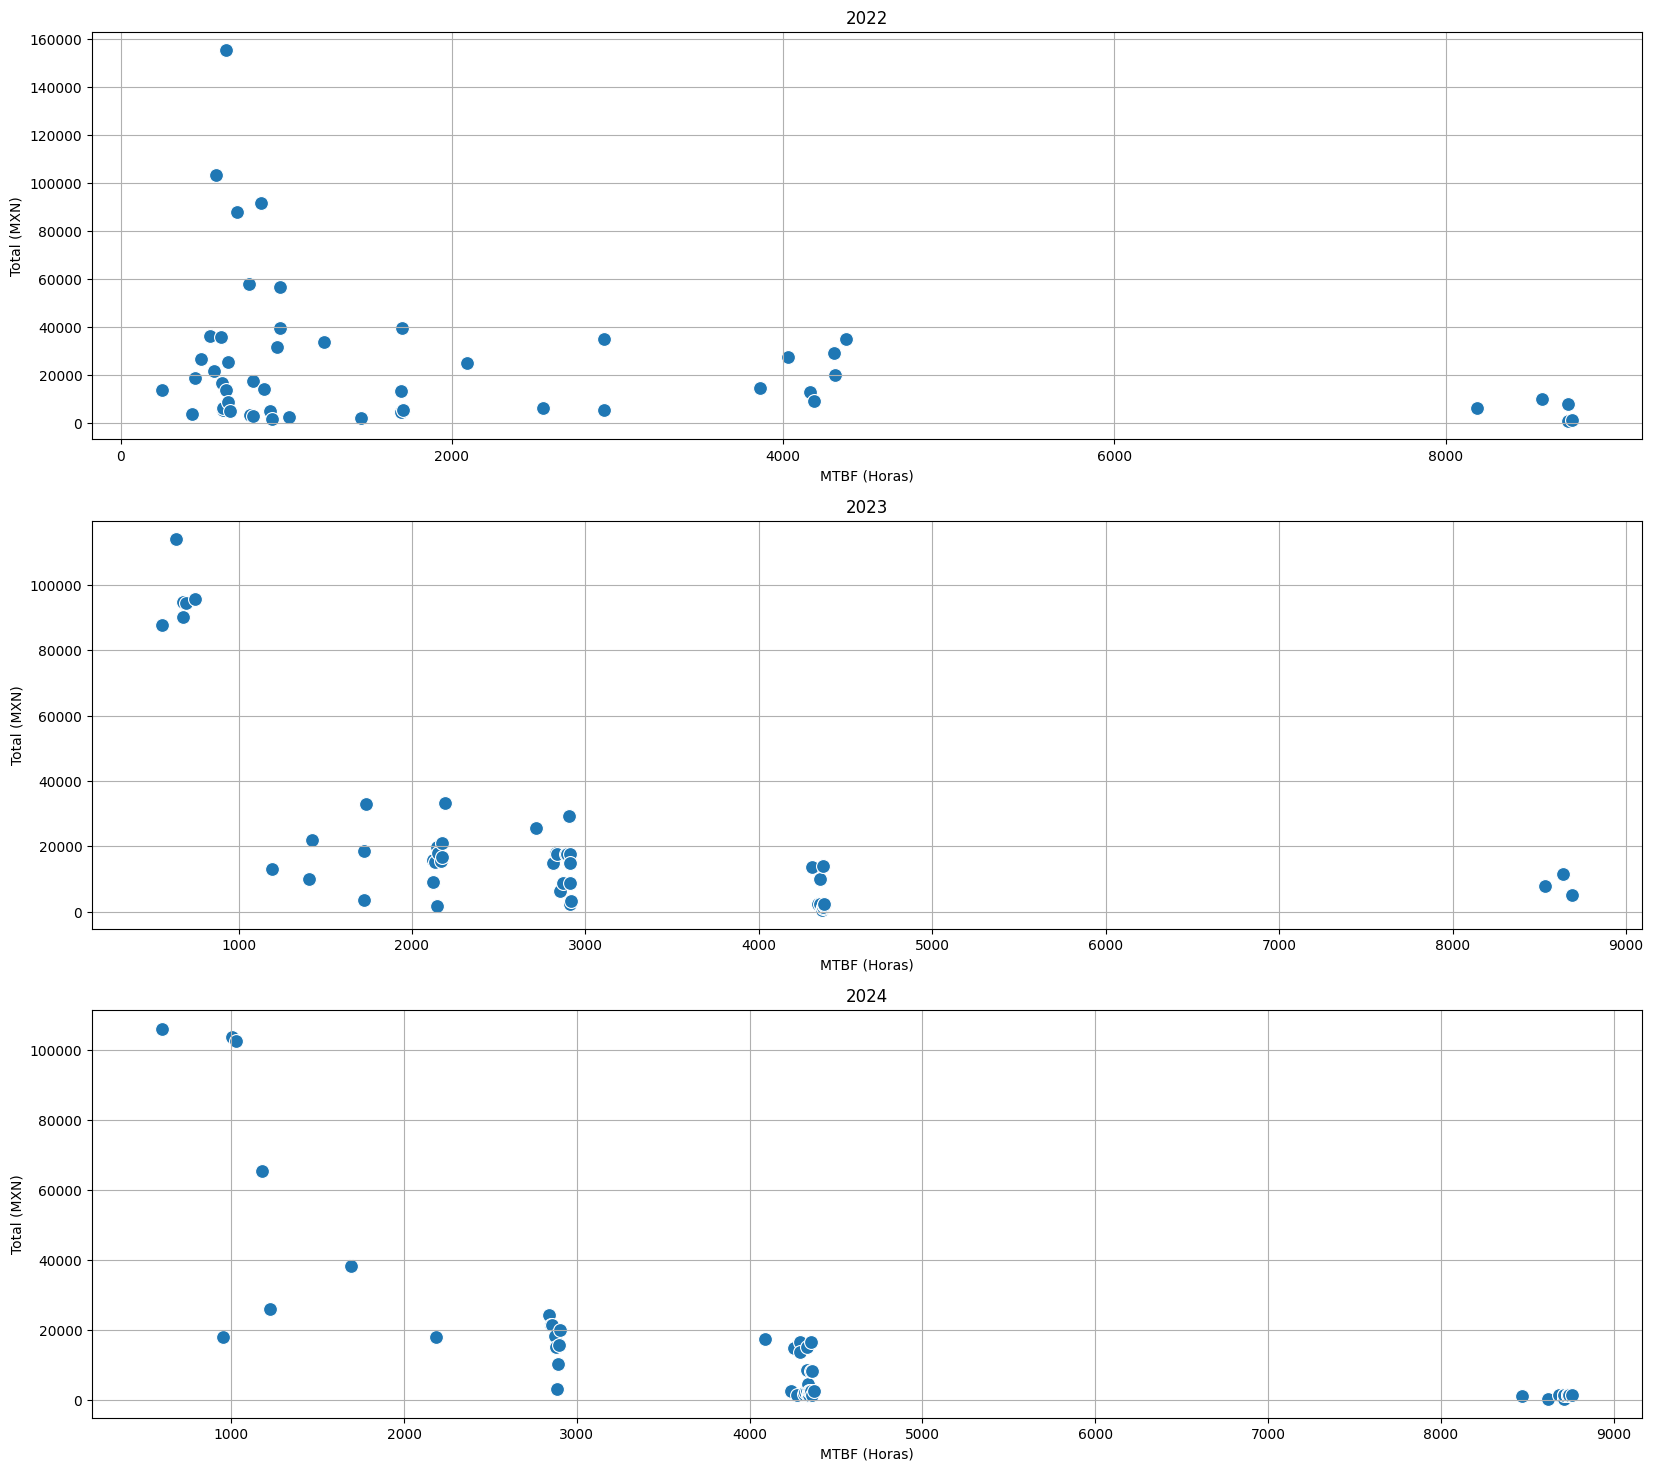

In [ ]:
f_costo_MTBF_Preventivo=plt.figure(figsize=(20,18))
gs=f_costo_MTBF_Preventivo.add_gridspec(3,1)

ax1=f_costo_MTBF_Preventivo.add_subplot(gs[0,0])
sns.scatterplot(x=sayer_costos_MTBF_2022_Preventivo['MTBF'],y=sayer_costos_MTBF_2022_Preventivo['SUBTOTAL'],data=sayer_costos_MTBF_2022_Preventivo,ax=ax1,s=100)
plt.title('2022')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax1.grid()

ax2=f_costo_MTBF_Preventivo.add_subplot(gs[1,0])
sns.scatterplot(x=sayer_costos_MTBF_2023_Preventivo['MTBF'],y=sayer_costos_MTBF_2023_Preventivo['SUBTOTAL'],data=sayer_costos_MTBF_2023_Preventivo,ax=ax2,s=100)
plt.title('2023')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax2.grid()

ax3=f_costo_MTBF_Preventivo.add_subplot(gs[2,0])
sns.scatterplot(x=sayer_costos_MTBF_2024_Preventivo['MTBF'],y=sayer_costos_MTBF_2024_Preventivo['SUBTOTAL'],data=sayer_costos_MTBF_2024_Preventivo,ax=ax3,s=100)
plt.title('2024')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax3.grid()

In [ ]:
# prompt: descarga la figura f_costo_MTBF_Preventivo

f_costo_MTBF_Preventivo.savefig('f_costo_MTBF_Preventivo.png')
from google.colab import files
files.download('f_costo_MTBF_Preventivo.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Auxilios

### 2022

In [ ]:
sayer_costos_MTBF_2022_Auxilio=pd.merge(sayer_2022_Auxilio_MTBF,sayer_costos_xUnidad_2022_Auxilio, left_index=True, right_index=True)

### 2023

In [ ]:
sayer_costos_MTBF_2023_Auxilio=pd.merge(sayer_2023_Auxilio_MTBF,sayer_costos_xUnidad_2023_Auxilio, left_index=True, right_index=True)

### 2024

In [ ]:
sayer_costos_MTBF_2024_Auxilio=pd.merge(sayer_2024_Auxilio_MTBF,sayer_costos_xUnidad_2024_Auxilio, left_index=True, right_index=True)

Regresión para Auxilios

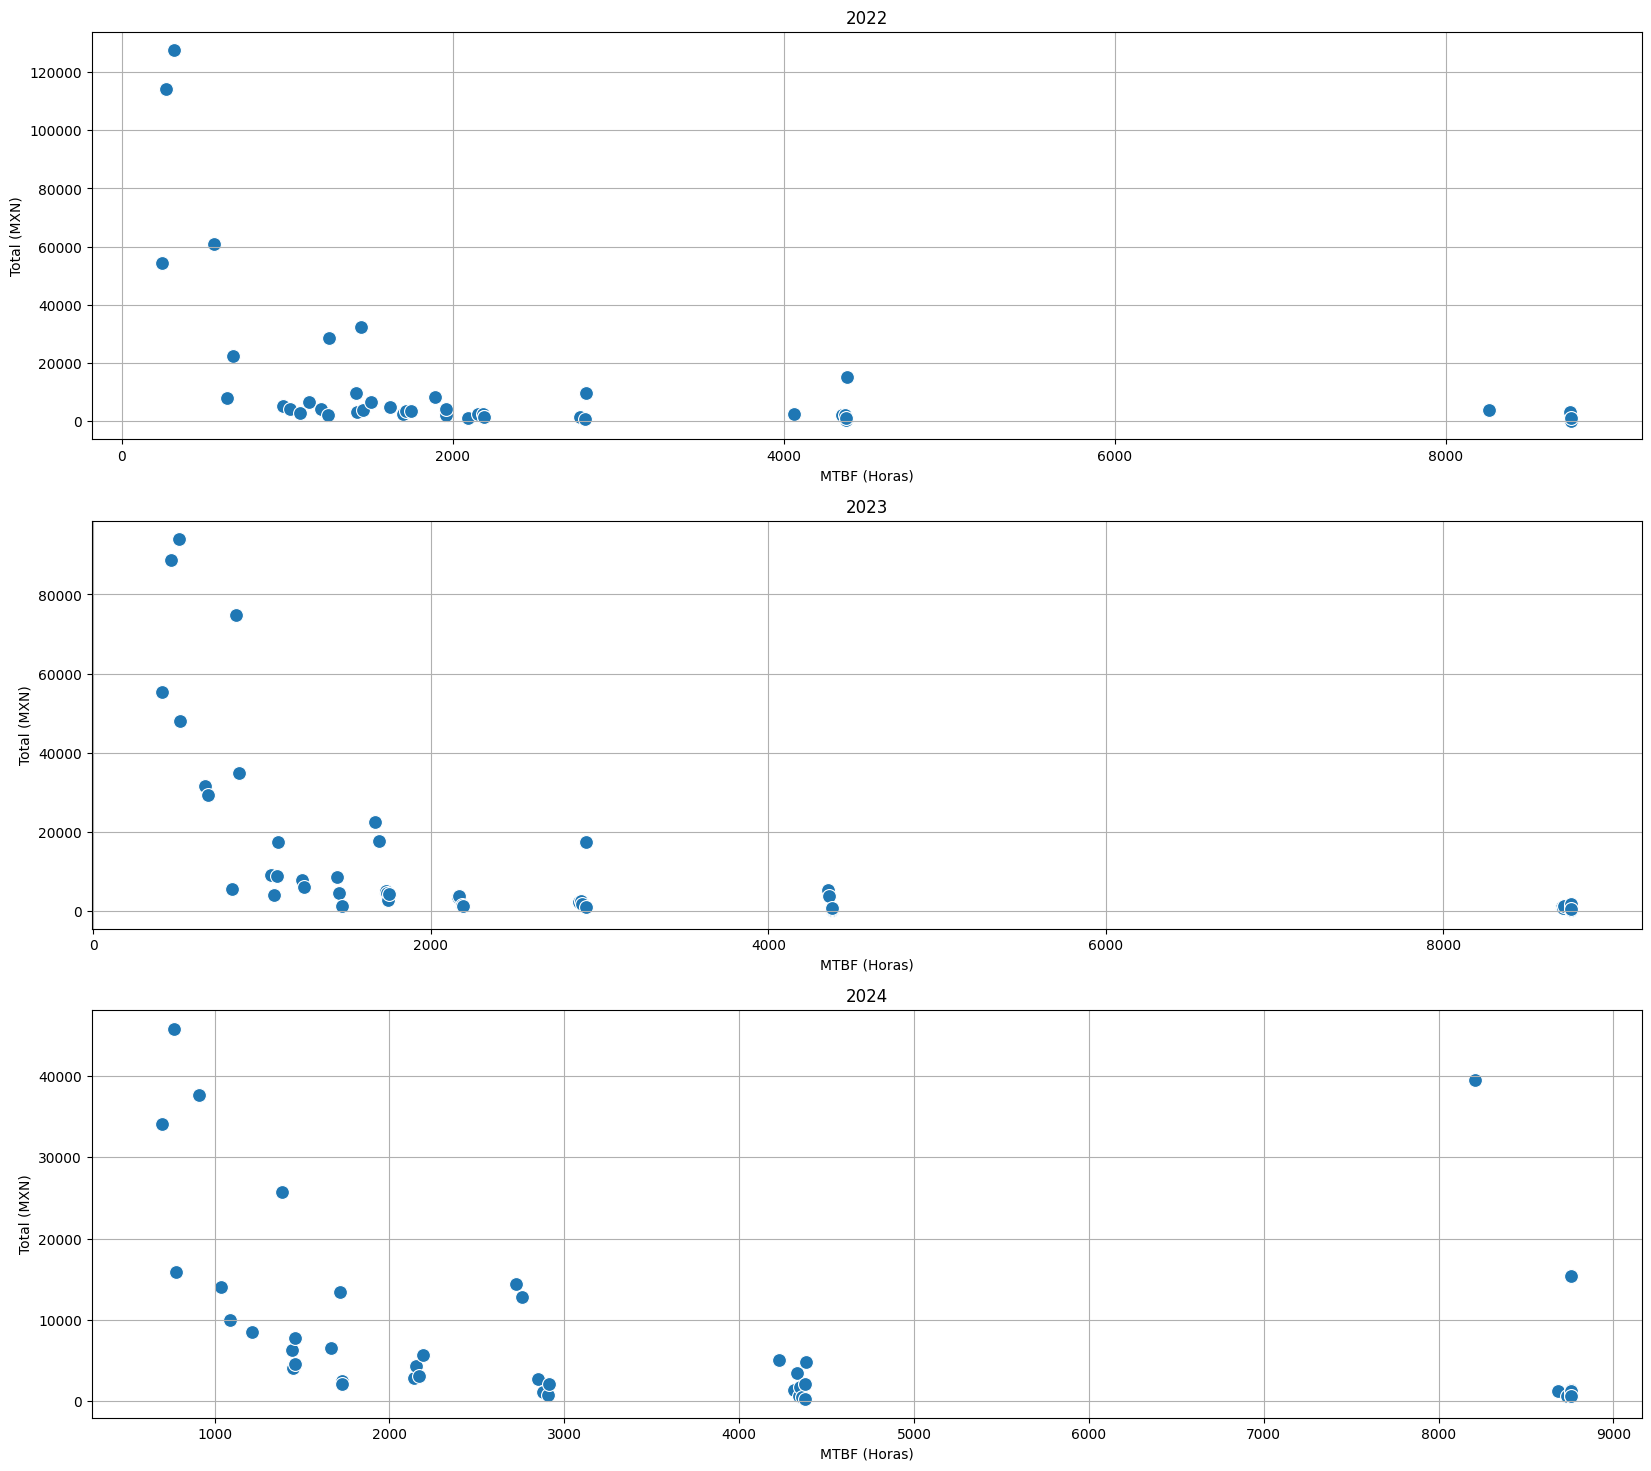

In [ ]:
f_costo_MTBF_Auxilio=plt.figure(figsize=(20,18))
gs=f_costo_MTBF_Auxilio.add_gridspec(3,1)

ax1=f_costo_MTBF_Auxilio.add_subplot(gs[0,0])
sns.scatterplot(x=sayer_costos_MTBF_2022_Auxilio['MTBF'],y=sayer_costos_MTBF_2022_Auxilio['SUBTOTAL'],data=sayer_costos_MTBF_2022_Auxilio,ax=ax1,s=100)
plt.title('2022')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax1.grid()

ax2=f_costo_MTBF_Auxilio.add_subplot(gs[1,0])
sns.scatterplot(x=sayer_costos_MTBF_2023_Auxilio['MTBF'],y=sayer_costos_MTBF_2023_Auxilio['SUBTOTAL'],data=sayer_costos_MTBF_2023_Auxilio,ax=ax2,s=100)
plt.title('2023')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax2.grid()

ax3=f_costo_MTBF_Auxilio.add_subplot(gs[2,0])
sns.scatterplot(x=sayer_costos_MTBF_2024_Auxilio['MTBF'],y=sayer_costos_MTBF_2024_Auxilio['SUBTOTAL'],data=sayer_costos_MTBF_2024_Auxilio,ax=ax3,s=100)
plt.title('2024')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax3.grid()

### Regresión - Kilometraje vs MTBF

# Exploración de Unidades de Sayer Full

### 2022

In [ ]:
sayer_complete_unico_tractos_2022=sayer_complete_unico_tractos[sayer_complete_unico_tractos.anioabierto=='2022']

In [ ]:
sayer_complete_unico_tractos_2022=sayer_complete_unico_tractos_2022.groupby('Unidad')['kms_acumulados'].max()

In [ ]:
sayer_complete_unico_tractos_2022

Unidad
1799    189979.0
1800    180733.0
1801    202953.0
1803    202797.0
1805    202989.0
1808    129985.0
1834    232156.0
Name: kms_acumulados, dtype: float64

In [ ]:
sayer_complete_unico_2022_km_MTBF=pd.merge(sayer_2022_General_MTBF,sayer_complete_unico_tractos_2022,
                                           how='outer', left_on='Unidad', right_index=True)

In [ ]:
sayer_complete_unico_2022_km_MTBF.dropna(subset=['kms_acumulados'],inplace=True)

In [ ]:
sayer_complete_unico_2022_km_MTBF

laghoras  FrecuenciaUnidad        MTBF     Tipo  Anio  kms_acumulados
Unidad                                                                       
1799        4861                32  121.843750  General  2022        189979.0
1800        3458                55   96.400000  General  2022        180733.0
1801        7234                40   38.150000  General  2022        202953.0
1803        2005                28  241.250000  General  2022        202797.0
1805        3896                47  103.489362  General  2022        202989.0
1808         648                30  270.400000  General  2022        129985.0
1834        4813                19  207.736842  General  2022        232156.0

Regresión - Kilometraje vs MTBF

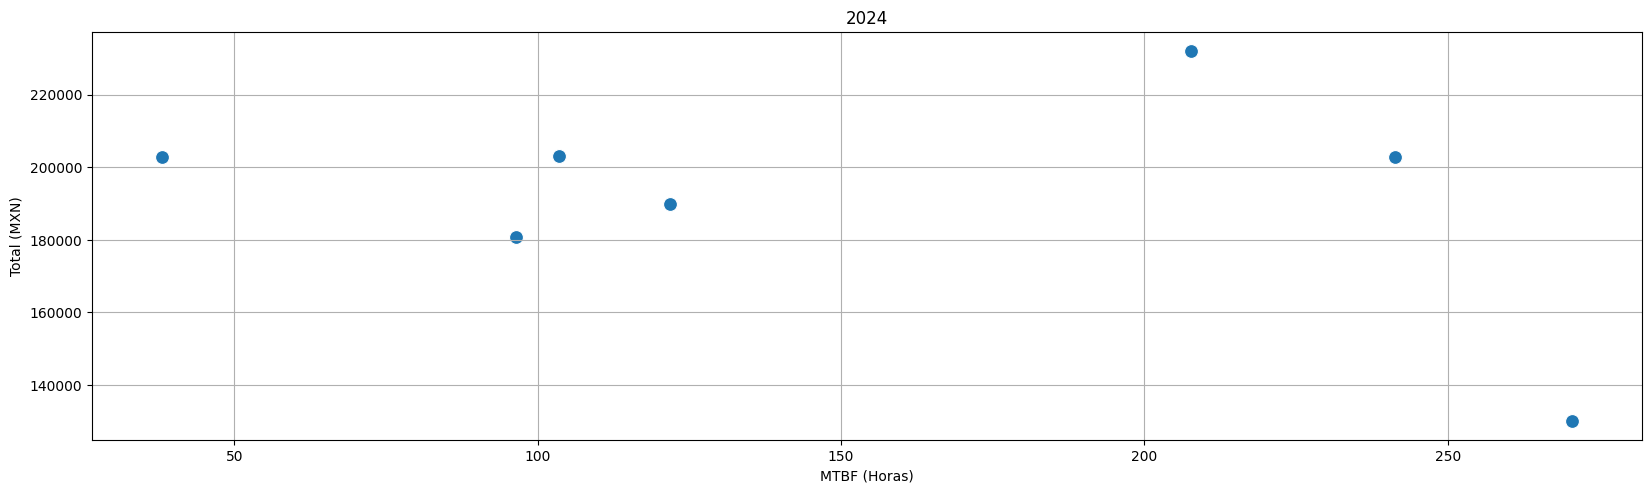

In [ ]:
f_kilometro_MTBF=plt.figure(figsize=(20,18))
gs=f_kilometro_MTBF.add_gridspec(3,1)

ax1=f_kilometro_MTBF.add_subplot(gs[0,0])
sns.scatterplot(x=sayer_complete_unico_2022_km_MTBF['MTBF'],y=sayer_complete_unico_2022_km_MTBF['kms_acumulados'],data=sayer_complete_unico_2022_km_MTBF,ax=ax1,s=100)
plt.title('2022')
plt.ylabel('km acumulados')
plt.xlabel('MTBF (horas)')
ax1.grid()

ax2=f_costo_MTBF_Auxilio.add_subplot(gs[1,0])
sns.scatterplot(x=sayer_costos_MTBF_2023_Auxilio['MTBF'],y=sayer_costos_MTBF_2023_Auxilio['SUBTOTAL'],data=sayer_costos_MTBF_2023_Auxilio,ax=ax2,s=100)
plt.title('2023')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax2.grid()

ax3=f_costo_MTBF_Auxilio.add_subplot(gs[2,0])
sns.scatterplot(x=sayer_costos_MTBF_2024_Auxilio['MTBF'],y=sayer_costos_MTBF_2024_Auxilio['SUBTOTAL'],data=sayer_costos_MTBF_2024_Auxilio,ax=ax3,s=100)
plt.title('2024')
plt.ylabel('Total (MXN)')
plt.xlabel('MTBF (Horas)')
ax3.grid()

## Descriptivos

In [ ]:
maintenance_stats = sayer.groupby('Tipo')['SUBTOTAL'].agg(['mean', 'median', 'std', 'min', 'max'])

# Calculate the range
maintenance_stats['range'] = maintenance_stats['max'] - maintenance_stats['min']
maintenance_stats

mean  median          std    min      max    range
Tipo                                                                 
Auxilio     1102.473301  310.20  2500.593785    0.0  38258.6  38258.6
Correctivo   935.051535  244.57  2209.986795    0.0  45000.0  45000.0
Preventivo  1220.332236  219.17  2003.782984 -530.0  13640.0  14170.0

**Frecuency tables**

In [ ]:

maintenance_stats = sayer.groupby('Tipo')['lagdias'].agg(['mean', 'median', 'std', 'min', 'max'])

maintenance_stats['range'] = maintenance_stats['max'] - maintenance_stats['min']

maintenance_stats

mean  median        std  min  max  range
Tipo                                                    
Auxilio     5.047850     1.0  12.923565    0  152    152
Correctivo  3.093567     1.0   5.594624   -2   91     93
Preventivo  4.151118     1.0   8.295887    0   86     86

jobcode
000013 - Correctivo Tractos                   1485
000058 - Preventivo Llantas                    762
000073 - Derivado de preventivo Tracto         595
000014 - Correctivo Cajas                      563
000061 - Daño Operativo                        554
000041 - Servicio Preventivo A - LT            539
000005 - Servicio Preventivo Caja Seca A1      458
000018 - Correctivo Dolly                      367
000059 - Correctivo Llantas                    345
000026 - Accidente                             306
000029 - Servicio De Lavado                    303
000053 - Auxilio Carretero - Mecánico          262
000027 - Auxilio Carretero - Llantas           244
000042 - Servicio Preventivo B - LT            152
000043 - Servicio Preventivo C - LT             95
000055 - Acondicionamiento                      81
000034 - In Tractor                             76
000007 - Servicio Preventivo Dolly A1           60
000074 - Derivado de preventivo Arrastre        56
000062 - Daño Operativo

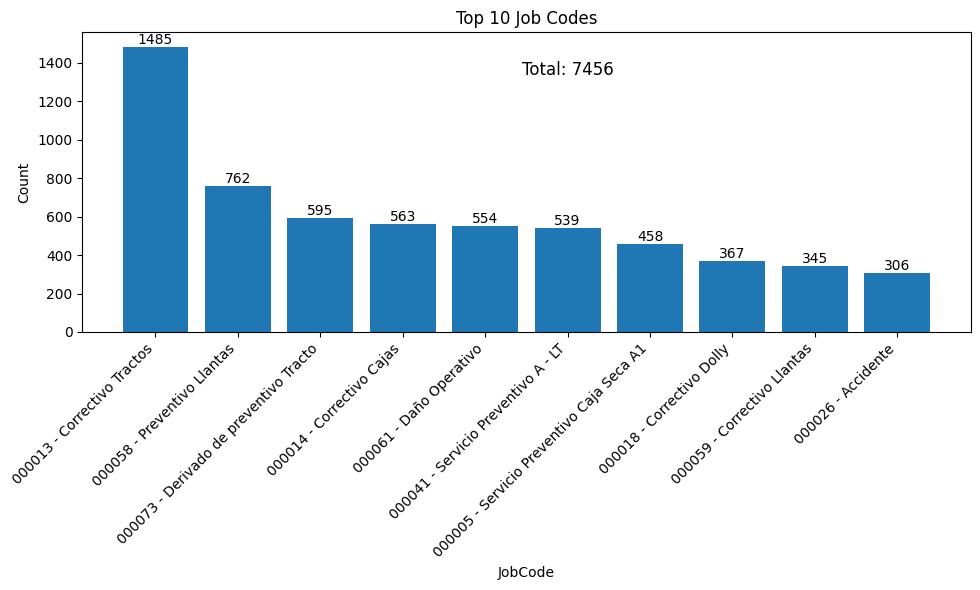

In [ ]:


jobcode_counts = sayer['jobcode'].value_counts()
print(jobcode_counts)

# Plot the top 10 job codes only
top_10_jobcodes = jobcode_counts.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_jobcodes.index, top_10_jobcodes.values)
plt.xlabel('JobCode')
plt.ylabel('Count')
plt.title('Top 10 Job Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add total count to the plot
total_count = sayer.shape[0]
plt.text(len(top_10_jobcodes) / 2, max(top_10_jobcodes.values) * 0.9,
         f"Total: {total_count}", ha='center', fontsize=12)


for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

Frequency of each maintenance type:
Correctivo: 3420
Preventivo: 2594
Auxilio: 1442


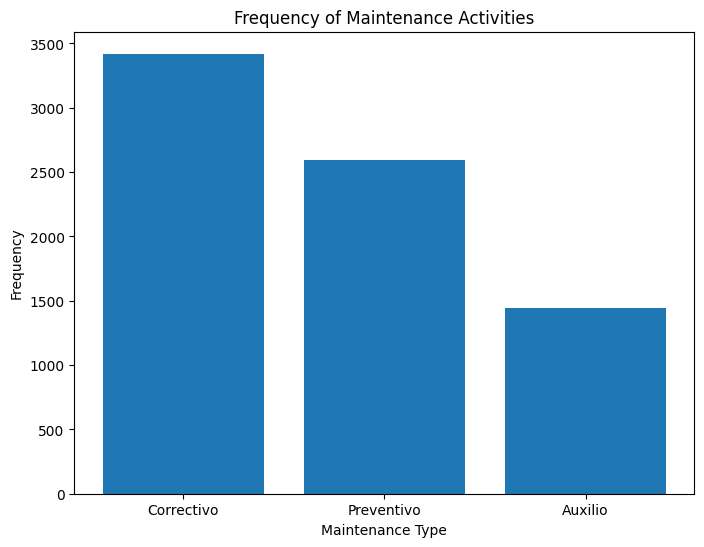

In [ ]:
# prompt: Maintenance Activities: Frequency of each type of maintenance activity

# Assuming 'sayer' DataFrame is already defined and processed as in your code.

# Create a dictionary to store the frequency of each maintenance type
maintenance_frequency = sayer['Tipo'].value_counts().to_dict()

# Print the frequency of each maintenance type
print("Frequency of each maintenance type:")
for type, count in maintenance_frequency.items():
  print(f"{type}: {count}")

# You can also create a bar chart to visualize the frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(maintenance_frequency.keys(), maintenance_frequency.values())
plt.xlabel("Maintenance Type")
plt.ylabel("Frequency")
plt.title("Frequency of Maintenance Activities")
plt.show()

Truck IDs: Frequency of maintenance activities per truck (Top 10)
Unidad
1803      171
D-2188    153
1799      120
1834       78
1808       66
1801       55
10211      45
D-2161     45
D-2168     36
10188      36
Name: FrecuenciaUnidad, dtype: int64


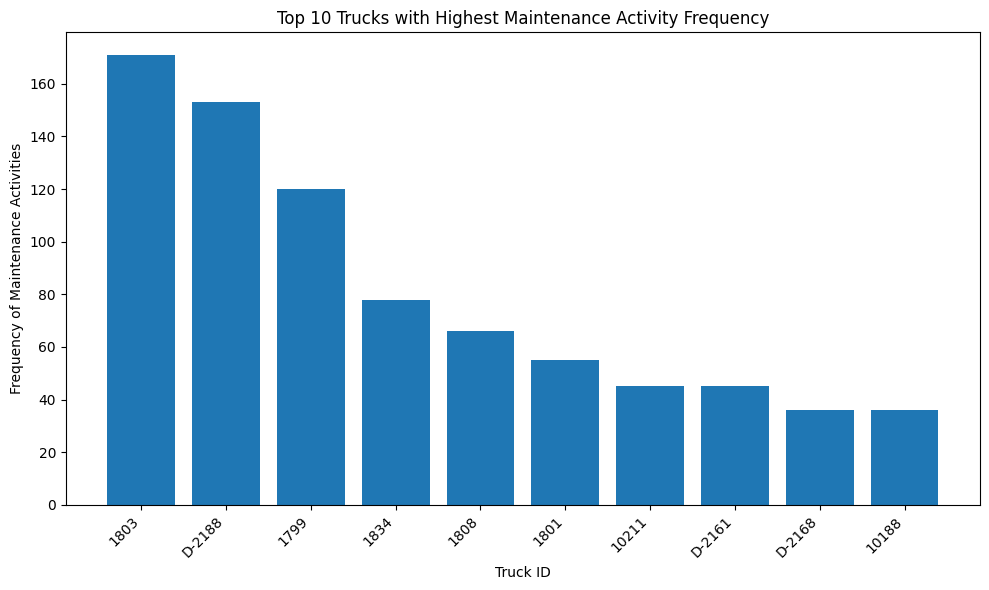

In [ ]:
# prompt: Truck IDs: Frequency of maintenance activities per truck top 10

# Assuming sayerOrderid_Corre is the DataFrame with 'Unidad' (Truck ID) and 'FrecuenciaUnidad' (maintenance frequency)
truck_maintenance_frequency = sayerOrderid_Corre.groupby('Unidad')['FrecuenciaUnidad'].sum()

# Get the top 10 trucks with the highest frequency of maintenance activities
top_10_trucks = truck_maintenance_frequency.sort_values(ascending=False).head(10)

print("Truck IDs: Frequency of maintenance activities per truck (Top 10)")
print(top_10_trucks)

# You can also plot this data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_trucks.index, top_10_trucks.values)
plt.xlabel("Truck ID")
plt.ylabel("Frequency of Maintenance Activities")
plt.title("Top 10 Trucks with Highest Maintenance Activity Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

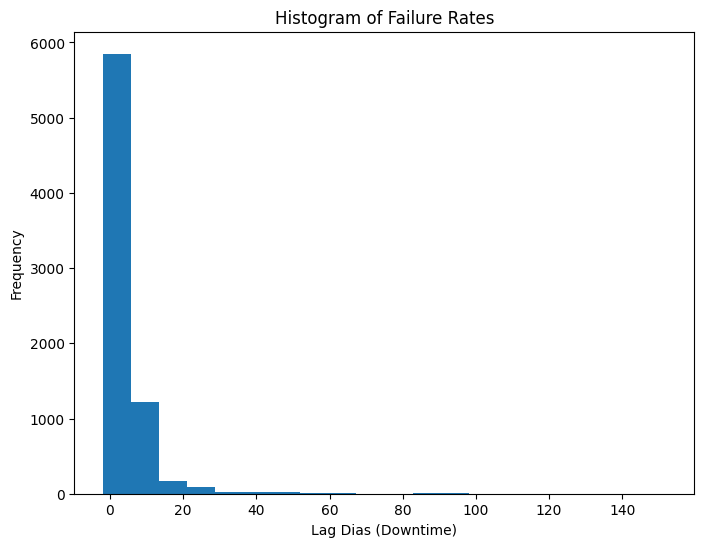

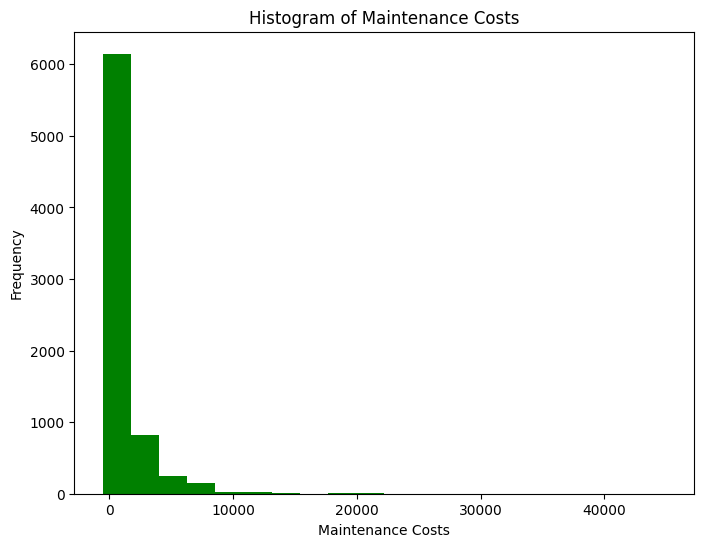

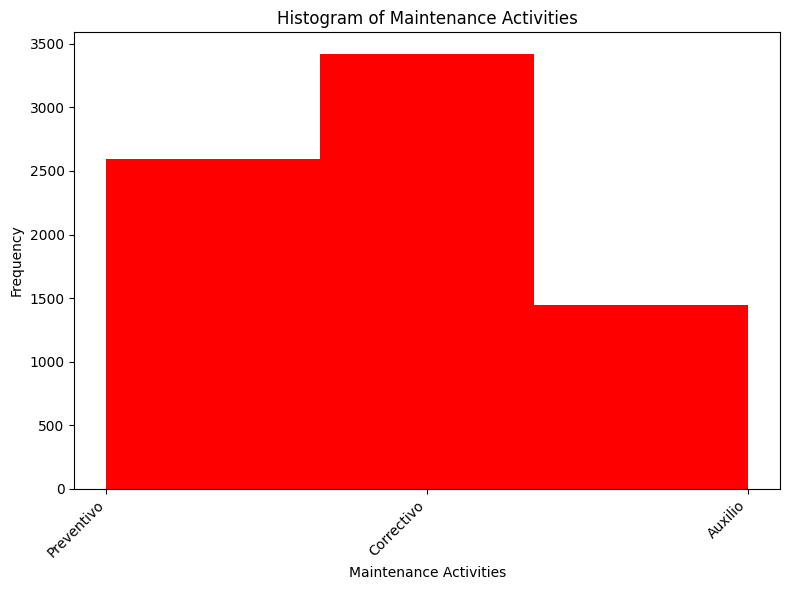

In [ ]:
# prompt: Plot Histograms: Create histograms to visualize the distribution of numerical
# variables.
# o Failure Rates: Histogram showing the distribution of failure rates.
# o Maintenance Costs: Histogram showing the distribution of maintenance
# costs.
# o Maintenance Activities: Histogram showing the frequency of different
# maintenance activities.

# Assuming 'sayer' DataFrame is already defined and processed as in your code.

# Histogram of Failure Rates (assuming 'lagdias' represents downtime)
plt.figure(figsize=(8, 6))
plt.hist(sayer['lagdias'], bins=20)
plt.xlabel("Lag Dias (Downtime)")
plt.ylabel("Frequency")
plt.title("Histogram of Failure Rates")
plt.show()


# Histogram of Maintenance Costs (assuming 'SUBTOTAL' represents maintenance cost)
plt.figure(figsize=(8, 6))
plt.hist(sayer['SUBTOTAL'], bins=20, color = "green")
plt.xlabel("Maintenance Costs")
plt.ylabel("Frequency")
plt.title("Histogram of Maintenance Costs")
plt.show()


# Histogram of Maintenance Activities (assuming 'Tipo' represents maintenance activity)
plt.figure(figsize=(8, 6))
plt.hist(sayer['Tipo'], bins=len(sayer['Tipo'].unique()),color ="red")
plt.xlabel("Maintenance Activities")
plt.ylabel("Frequency")
plt.title("Histogram of Maintenance Activities")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: jobcode value counts

# Assuming sayerPreventivo, sayerCorrectivo, and sayerAuxilio are your DataFrames.

# Jobcode value counts for Preventive
jobcode_counts_preventivo = sayerPreventivo["jobcode"].value_counts()
print("Jobcode value counts for Preventive:\n", jobcode_counts_preventivo)

# Jobcode value counts for Correctivo
jobcode_counts_correctivo = sayerCorrectivo["jobcode"].value_counts()
print("\nJobcode value counts for Correctivo:\n", jobcode_counts_correctivo)

# Jobcode value counts for Auxilio
jobcode_counts_auxilio = sayerAuxilio["jobcode"].value_counts()
print("\nJobcode value counts for Auxilio:\n", jobcode_counts_auxilio)

Jobcode value counts for Preventive:
 jobcode
000058 - Preventivo Llantas                  762
000041 - Servicio Preventivo A - LT          539
000005 - Servicio Preventivo Caja Seca A1    458
000029 - Servicio De Lavado                  303
000042 - Servicio Preventivo B - LT          152
000043 - Servicio Preventivo C - LT           95
000055 - Acondicionamiento                    81
000034 - In Tractor                           76
000007 - Servicio Preventivo Dolly A1         60
000063 - In Dolly                             44
Preventivo general                            12
000036 - In Arrastre                           5
000001 - Servicio preventivo M1                4
000050 - SH 3                                  3
Name: count, dtype: int64

Jobcode value counts for Correctivo:
 jobcode
000013 - Correctivo Tractos                 1485
000073 - Derivado de preventivo Tracto       595
000014 - Correctivo Cajas                    563
000018 - Correctivo Dolly                    367

Truck IDs: Total maintenance cost per truck (Top 10)
Unidad
1800      832322.33
1805      779540.27
1801      761831.07
1803      720656.90
1808      628111.00
1799      624335.61
1834      533394.60
D-2172    154844.77
10183     138474.75
D-2168    131977.56
Name: SUBTOTAL, dtype: float64


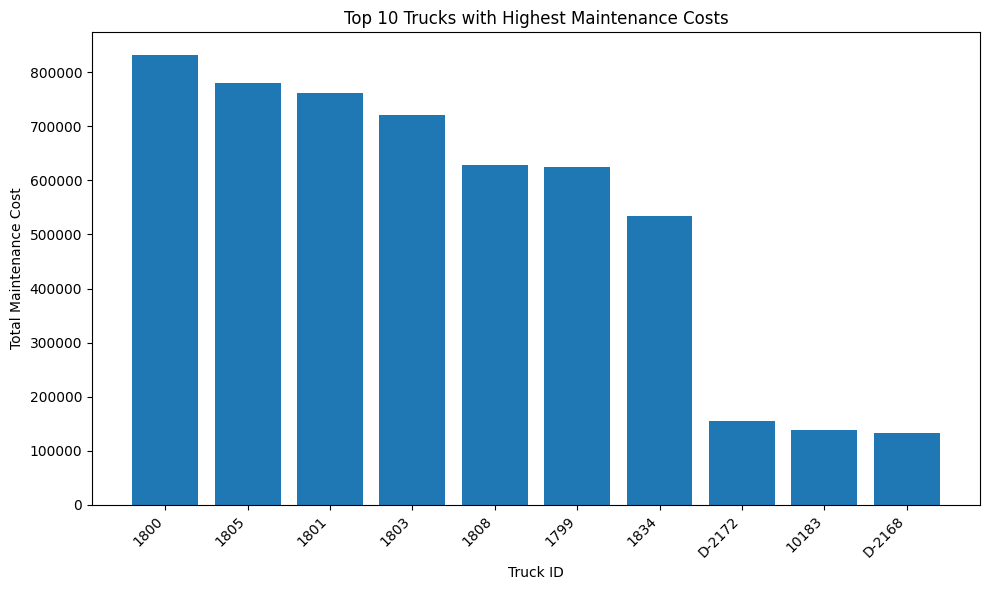

In [ ]:
# prompt: etermine which trucks incur the highest
# costs. This can inform decisions about fleet management and maintenance
# scheduling.

# Assuming sayerOrderid_Corre is the DataFrame with 'Unidad' (Truck ID) and 'FrecuenciaUnidad' (maintenance frequency)
# and 'SUBTOTAL' represents the maintenance cost.

# Group by truck ID and calculate the total maintenance cost for each truck.
truck_maintenance_cost = sayer.groupby('Unidad')['SUBTOTAL'].sum()

# Get the top 10 trucks with the highest maintenance costs.
top_10_trucks_by_cost = truck_maintenance_cost.sort_values(ascending=False).head(10)

print("Truck IDs: Total maintenance cost per truck (Top 10)")
print(top_10_trucks_by_cost)

# You can also plot this data as a bar chart.
plt.figure(figsize=(10, 6))
plt.bar(top_10_trucks_by_cost.index, top_10_trucks_by_cost.values)
plt.xlabel("Truck ID")
plt.ylabel("Total Maintenance Cost")
plt.title("Top 10 Trucks with Highest Maintenance Costs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

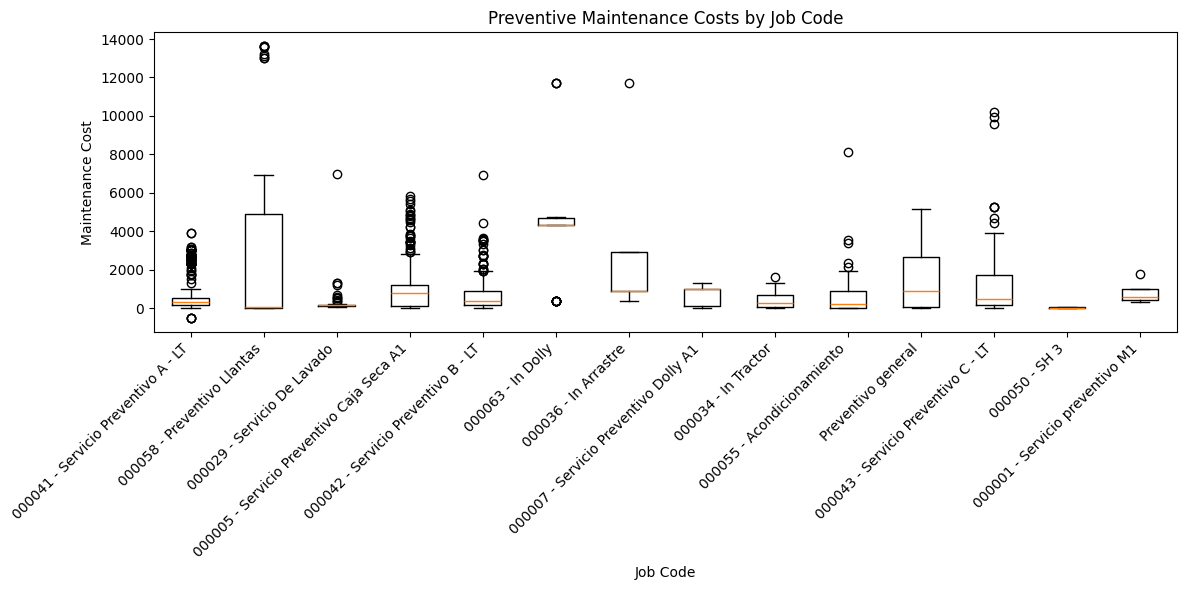

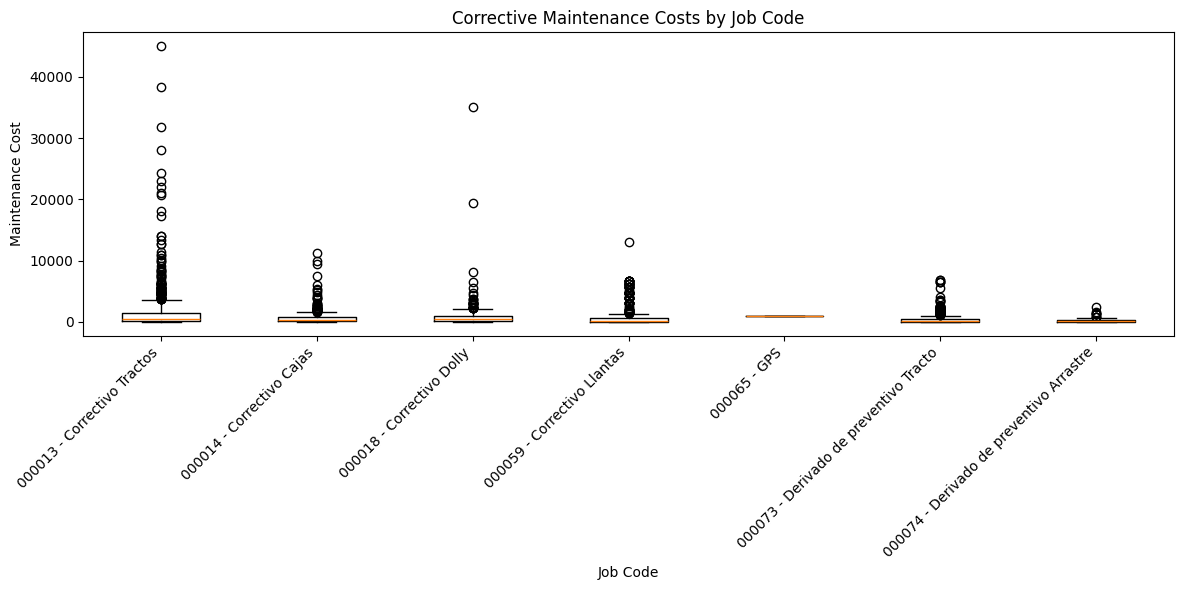

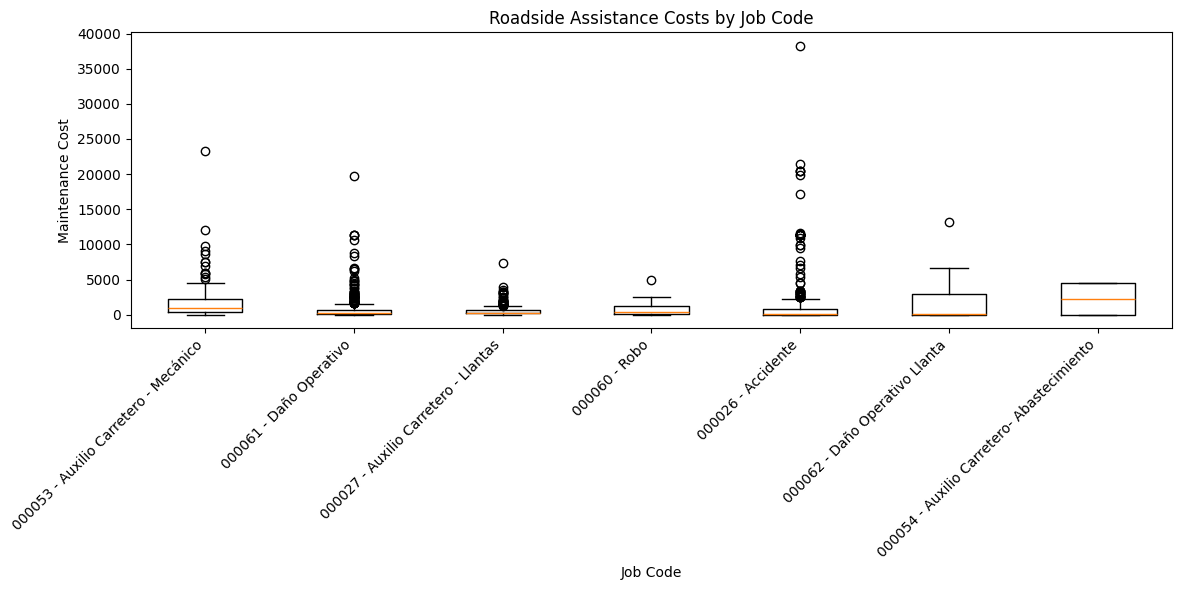

In [ ]:
# prompt: Boxplot Maintenance Costs by Job Code: Look for outliers and the spread of costs. Job
# codes with a wide spread or many outliers might indicate inconsistent
# maintenance practices

import matplotlib.pyplot as plt

# Assuming sayerPreventivo, sayerCorrectivo, and sayerAuxilio are your DataFrames
# and 'SUBTOTAL' represents the maintenance cost.

def boxplot_maintenance_by_jobcode(df, title):
  """
  Creates a boxplot of maintenance costs by job code for a given DataFrame.

  Args:
    df: The DataFrame containing maintenance data.
    title: The title for the plot.
  """
  plt.figure(figsize=(12, 6))
  plt.boxplot([df[df['jobcode'] == jobcode]['SUBTOTAL'].dropna() for jobcode in df['jobcode'].unique()],
              labels=df['jobcode'].unique())
  plt.xlabel('Job Code')
  plt.ylabel('Maintenance Cost')
  plt.title(title)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# Create boxplots for each type of maintenance
boxplot_maintenance_by_jobcode(sayerPreventivo, 'Preventive Maintenance Costs by Job Code')
boxplot_maintenance_by_jobcode(sayerCorrectivo, 'Corrective Maintenance Costs by Job Code')
boxplot_maintenance_by_jobcode(sayerAuxilio, 'Roadside Assistance Costs by Job Code')

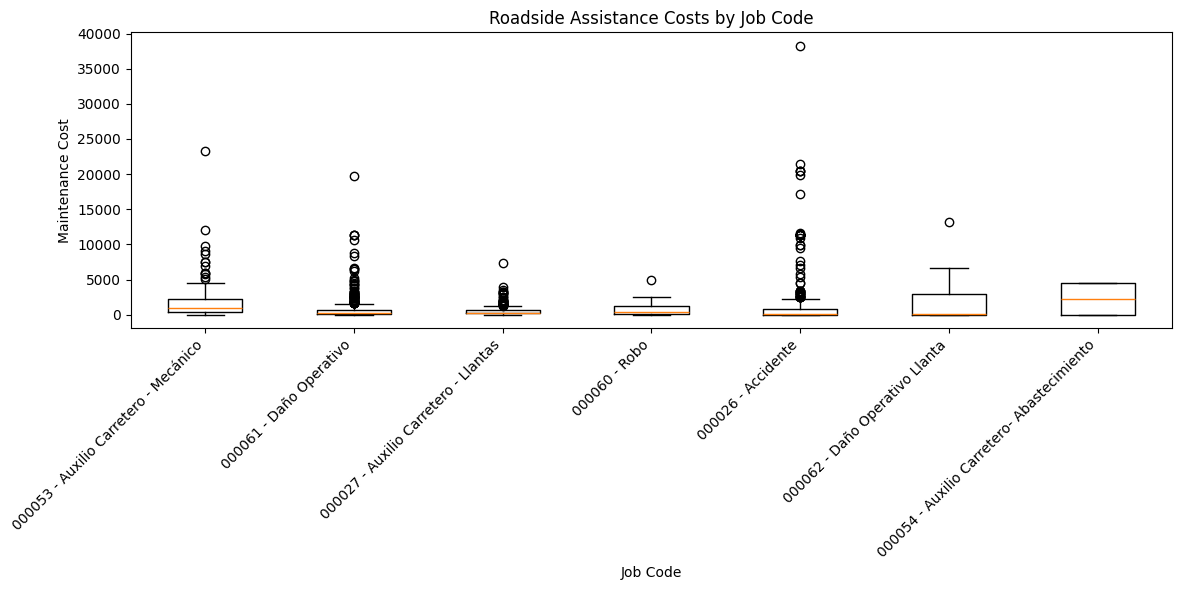

In [ ]:
  boxplot_maintenance_by_jobcode(sayerAuxilio, 'Roadside Assistance Costs by Job Code')

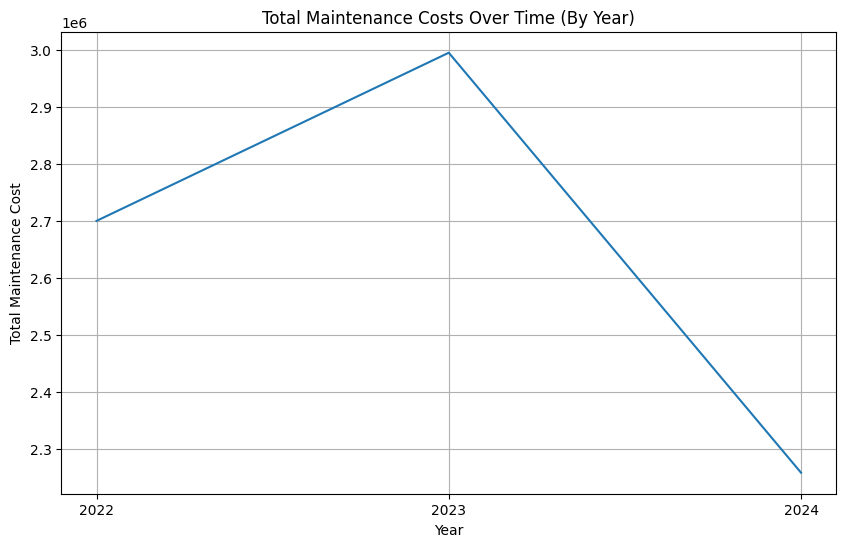

In [ ]:
# prompt:  Use line charts to visualize trends over time for maintenance costs,(Por año), pon el total completo

# Assuming 'sayer' DataFrame is already defined and processed as in your code.
# Group maintenance costs by year and calculate the total cost for each year.
maintenance_by_year = sayer.groupby(sayer['aniocierre'])['SUBTOTAL'].sum()

# Create the line chart.
plt.figure(figsize=(10, 6))
plt.plot(maintenance_by_year.index, maintenance_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Maintenance Cost')
plt.title('Total Maintenance Costs Over Time (By Year)')
plt.grid(True)
plt.show()

# 1A

## Does the frequency of preventive maintenance affect the frequency of breakdowns?

In [ ]:
sayer_2023_complete_Preventivo_unico['marcadorFrecuencia']=1

<ipython-input-362-cd589874c881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer_2023_complete_Preventivo_unico['marcadorFrecuencia']=1


In [ ]:
sayer_2023_complete_Correctivo_unico['marcadorFrecuencia']=1

<ipython-input-363-e7a527201d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer_2023_complete_Correctivo_unico['marcadorFrecuencia']=1


In [ ]:
sayer_2023_complete_Auxilio_unico['marcadorFrecuencia']=1

<ipython-input-364-d547c53dd8fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayer_2023_complete_Auxilio_unico['marcadorFrecuencia']=1


In [ ]:
breakdown=pd.concat([sayer_2023_complete_Correctivo_unico,sayer_2023_complete_Auxilio_unico],axis=0)

In [ ]:
freq_preventivo_2023=sayer_2023_complete_Preventivo_unico.groupby(['Unidad','mesabierto'])['marcadorFrecuencia'].sum()

In [ ]:
freq_breakdown_2023=breakdown.groupby(['Unidad','mesabierto'])['marcadorFrecuencia'].sum()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

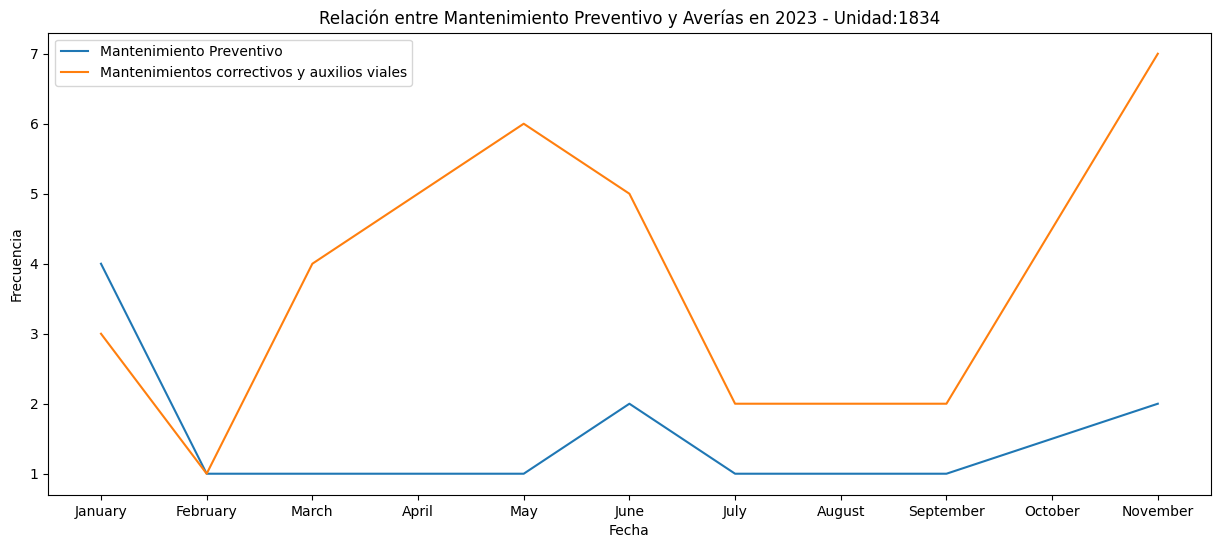

Correlación entre mantenimiento preventivo y averías para la unidad 1834: 0.14285714285714288


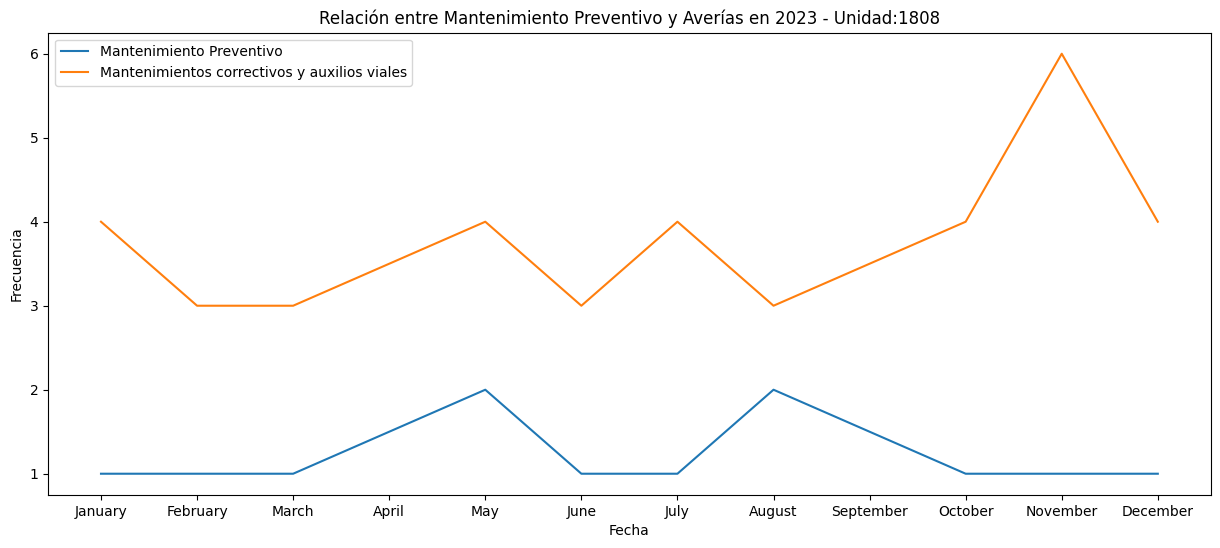

Correlación entre mantenimiento preventivo y averías para la unidad 1808: -0.17206180040292132


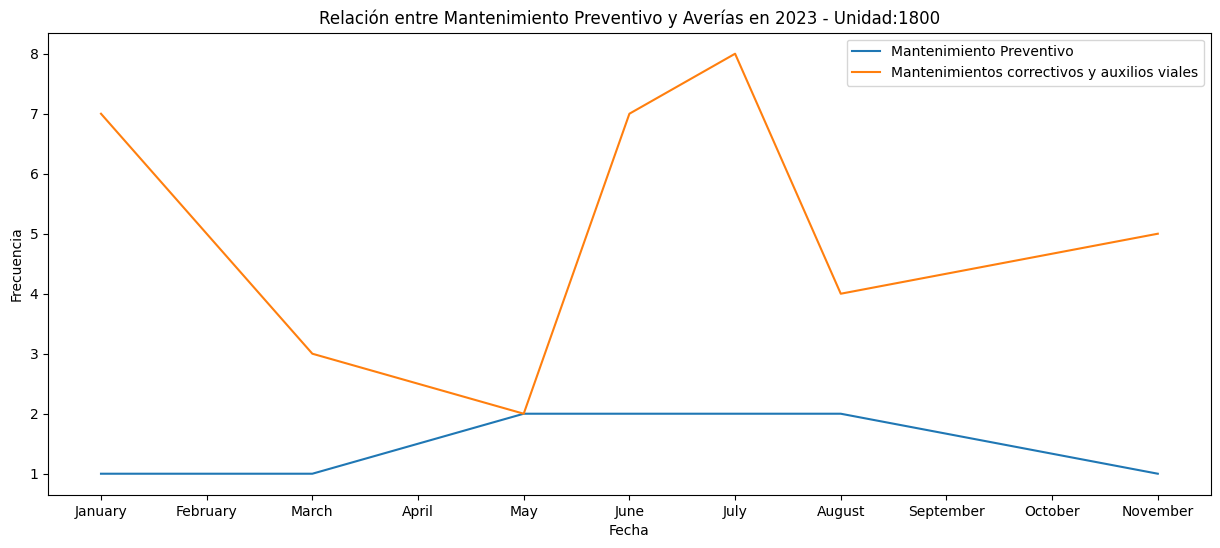

Correlación entre mantenimiento preventivo y averías para la unidad 1800: 0.06362847629757777


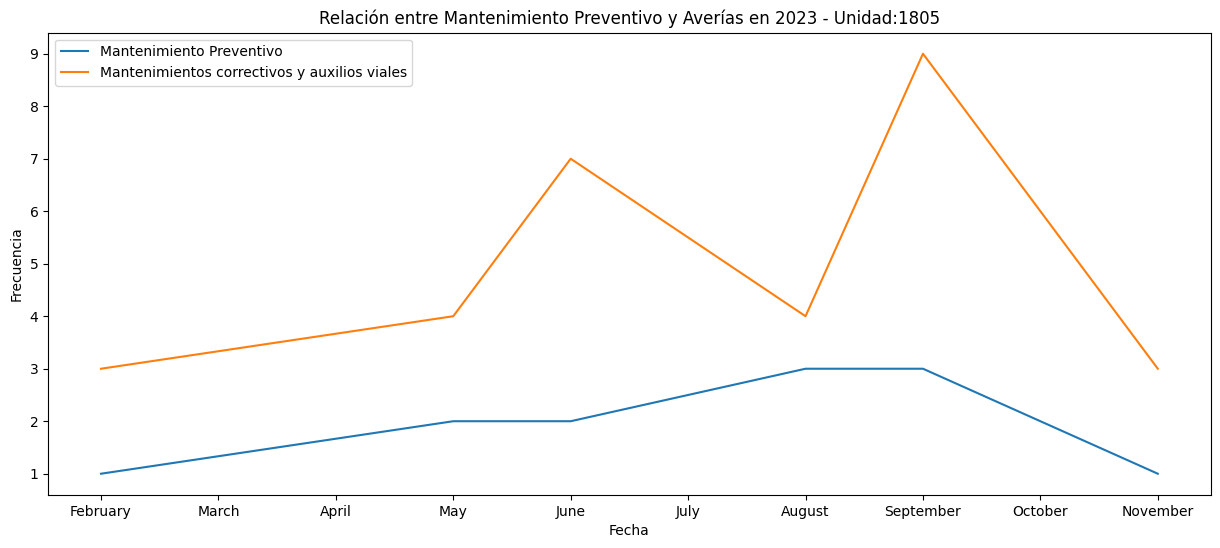

Correlación entre mantenimiento preventivo y averías para la unidad 1805: 0.639009650422694


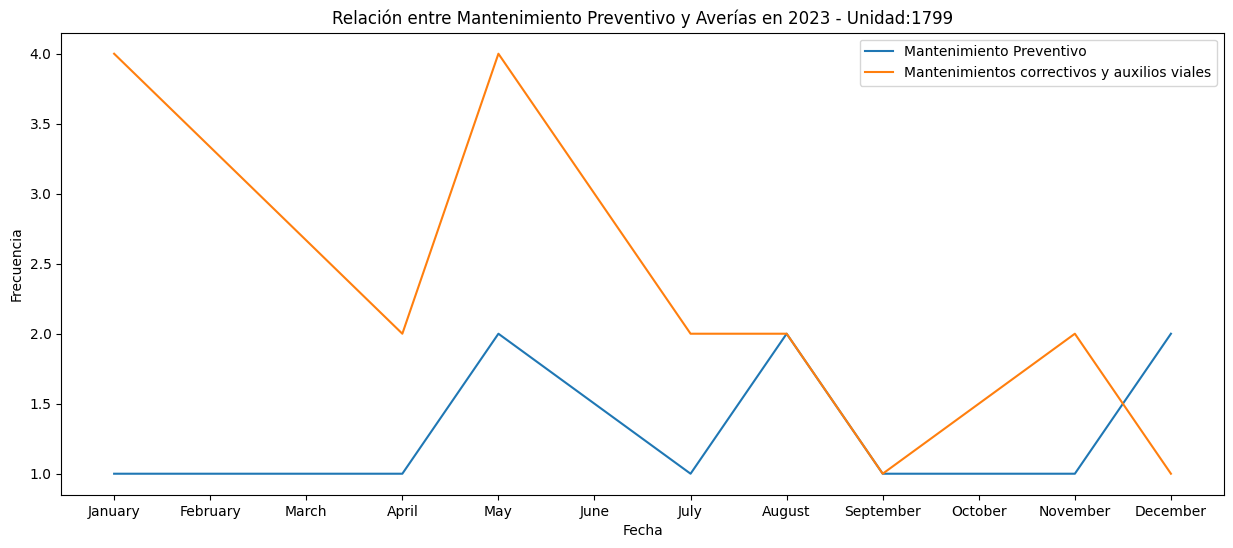

Correlación entre mantenimiento preventivo y averías para la unidad 1799: 0.05923488777590925


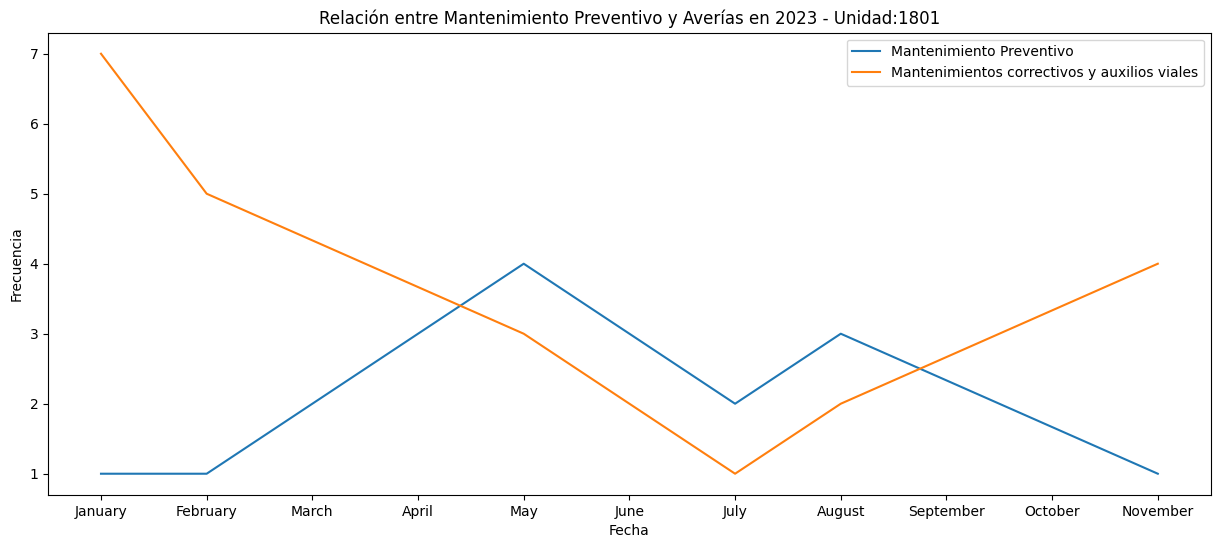

Correlación entre mantenimiento preventivo y averías para la unidad 1801: -0.5855400437691198


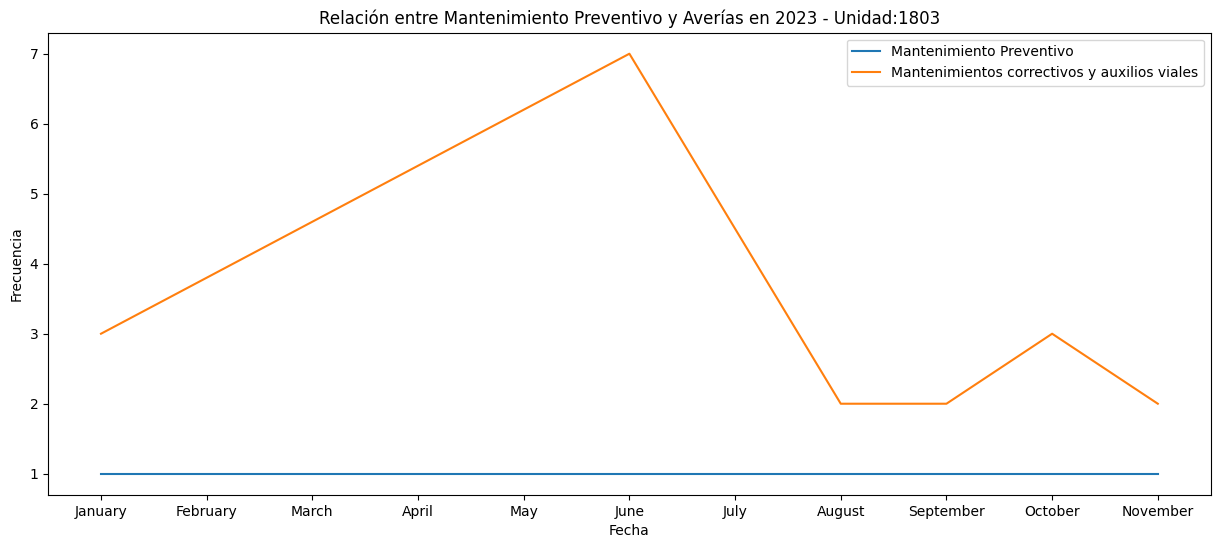

Correlación entre mantenimiento preventivo y averías para la unidad 1803: nan


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
numbers = [1834,1808,1800, 1805, 1799, 1801, 1803]

for num in numbers:
    freq_preventivo_2023_unit = freq_preventivo_2023.loc[str(num)]
    freq_breakdown_2023_unit = freq_breakdown_2023.loc[str(num)]
    prev_bd_corr_unit = pd.merge(freq_preventivo_2023_unit, freq_breakdown_2023_unit, left_index=True, right_on='mesabierto')
    prev_bd_corr_unit.index = pd.CategoricalIndex(prev_bd_corr_unit.index, categories=month_order, ordered=True)
    prev_bd_corr_unit = prev_bd_corr_unit.sort_index()

    plt.figure(figsize=(15, 6))
    sns.lineplot(x=prev_bd_corr_unit.index, y=prev_bd_corr_unit['marcadorFrecuencia_x'], data=prev_bd_corr_unit, label='Mantenimiento Preventivo')
    sns.lineplot(x=prev_bd_corr_unit.index, y=prev_bd_corr_unit['marcadorFrecuencia_y'], data=prev_bd_corr_unit, label='Mantenimientos correctivos y auxilios viales')
    plt.title(f'Relación entre Mantenimiento Preventivo y Averías en 2023 - Unidad:{num}')
    plt.xlabel('Fecha')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

    # Calcular la correlación
    correlation = prev_bd_corr_unit['marcadorFrecuencia_x'].corr(prev_bd_corr_unit['marcadorFrecuencia_y'])
    print(f'Correlación entre mantenimiento preventivo y averías para la unidad {num}: {correlation}')


## Is there a relationship between vehicle age and maintenance costs?

In [ ]:
sayer_costos_xUnidad_2023_General.max()

SUBTOTAL    346351.38
dtype: float64

In [ ]:
anioUnidad=sayer.groupby('Unidad')['aniounidad'].max()

In [ ]:
sayer_costos_anioUnidad = pd.merge(sayer_costos_xUnidad_2023_General, anioUnidad, left_on='Unidad', right_index=True)
sayer_costos_anioUnidad

SUBTOTAL  aniounidad
Unidad                       
10171    23336.35        2016
10172    43046.02        2016
10173    11994.82        2016
10175    28746.59        2016
10176    26315.41        2016
10177    44405.93        2016
10180     3039.04        2016
10181    10418.08        2016
10183    35431.53        2016
10186    39580.96        2016
10187    23994.22        2016
10188    39211.56        2016
10190    25669.96        2016
10191     7922.42        2016
10192    28861.19        2016
10193    18752.19        2016
10195    11251.37        2016
10196     9586.06        2016
10197    11076.75        2016
10207    22549.31        2018
10211    21172.16        2018
10213    26958.30        2018
10216    24820.22        2018
10221     7585.97        2018
10223    22040.03        2018
10224    17622.93        2019
10231    44884.87        2019
10232    22100.03        2019
10244    20037.42        2019
10248    34842.28        2019
10249    18048.27        2019
10255     4467.32        2019
10258     6407.45        2019
1799    211144.90        2021
1800    346351.38        2021
1801    198095.25        2021
1803    173546.84        2021
1805    290100.81        2021
1808    277570.88        2021
1834    314293.14        2021
D-2161   50267.55        2022
D-2164   32553.17        2022
D-2165   66811.84        2022
D-2168   65477.56        2022
D-2169   28046.14        2022
D-2170   38939.61        2022
D-2172   33748.95        2022
D-2175   58378.67        2022
D-2187   68536.21        2022
D-2188   23194.90        2022

In [ ]:
# prompt: convierte a anioUnidad en un dataframe

# Convert 'anioUnidad' to a DataFrame if it's not already one.
if not isinstance(anioUnidad, pd.DataFrame):
  anioUnidad = anioUnidad.to_frame(name='anioUnidad')

In [ ]:
anioUnidad

anioUnidad
Unidad            
10171         2016
10172         2016
10173         2016
10175         2016
10176         2016
10177         2016
10180         2016
10181         2016
10183         2016
10186         2016
10187         2016
10188         2016
10190         2016
10191         2016
10192         2016
10193         2016
10195         2016
10196         2016
10197         2016
10207         2018
10211         2018
10213         2018
10216         2018
10221         2018
10223         2018
10224         2019
10231         2019
10232         2019
10244         2019
10248         2019
10249         2019
10255         2019
10258         2019
1799          2021
1800          2021
1801          2021
1803          2021
1805          2021
1808          2021
1834          2021
53846         2019
D-2161        2022
D-2164        2022
D-2165        2022
D-2168        2022
D-2169        2022
D-2170        2022
D-2172        2022
D-2175        2022
D-2187        2022
D-2188        2022

Correlación entre Costos de mantenimiento y año la unidad: 0.46442450052823764


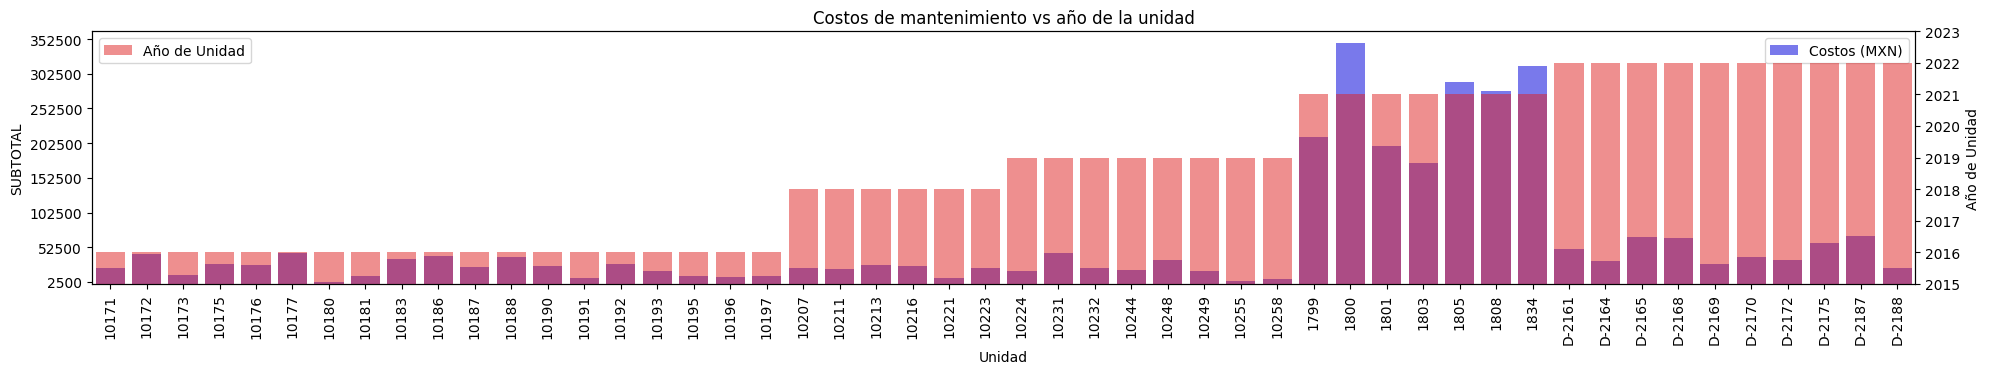

In [ ]:
costos_anioUnidadGraph=plt.figure(figsize=(20, 10))
ax1=costos_anioUnidadGraph.add_subplot(gs[0,0])
ax1twin=ax1.twinx()


common_units=sayer_costos_xUnidad_2023_General.index.intersection(anioUnidad.index)

ax1.set_xticks(range(len(common_units)))
ax1.set_xticklabels(common_units,rotation=90)

ax1.set_yticks(range(2500,400000,50000))
ax1.set_xlim(2500,300000)

ax1twin.set_ylim(2015, 2023)
ax1twin.set_yticks(range(2015, 2024))

all_units=sayer_costos_xUnidad_2023_General.index.union(anioUnidad.index)

sns.barplot(data=sayer_costos_xUnidad_2023_General,x=sayer_costos_xUnidad_2023_General.index,y=sayer_costos_xUnidad_2023_General['SUBTOTAL'],ax=ax1,color='blue',alpha=0.6,label='Costos (MXN)')
plt.xticks(rotation=90)
plt.ylabel('Costos (MXN)')
sns.barplot(data=anioUnidad,x=anioUnidad.index,y=anioUnidad['anioUnidad'],ax=ax1twin,color='red',alpha=0.5,label='Año de Unidad')
plt.xticks(rotation=90)
plt.ylabel('Año de Unidad')
plt.title('Costos de mantenimiento vs año de la unidad')
ax1.legend(loc='upper right')
ax1twin.legend(loc='upper left')

costos_anioUnidadGraph.tight_layout()
# Calcular la correlación
correlation = sayer_costos_anioUnidad['SUBTOTAL'].corr(sayer_costos_anioUnidad['aniounidad'])
print(f'Correlación entre Costos de mantenimiento y año la unidad: {correlation}')


# Análisis por partes

In [ ]:
clean_sayer=pd.read_csv('clean_sayer.csv')

In [ ]:
clean_sayer.head(20)

Orderid        Taller      Tallerid       Kms   opened   closed  \
0    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
1    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
2    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
3    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
4    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
5    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
6    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
7    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
8    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
9    169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
10   169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
11   169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
12   169344  SAYER APASEO  SAAP-0000448       NaN  12:00.0  15:00.0   
13   169540  QRO           QRO-00032631       NaN  00:00.0  43:00.0   
14   169573  QRO           QRO-00032635  337578.0  05:00.0  28:00.0   
15   169573  QRO           QRO-00032635  337578.0  05:00.0  28:00.0   
16   169632  SAYER APASEO  SAAP-0000463       NaN  02:00.0  35:00.0   
17   169638  SAYER APASEO  SAAP-0000465       NaN  07:00.0  41:00.0   
18   170888  QRO           QRO-00032732       NaN  50:00.0  45:00.0   
19   170913  SAYER APASEO  SAAP-0000488       NaN  18:00.0  22:00.0   

          status  lagdias  laghoras  diacierre  ... mescomplete  aniocomplete  \
0   CLOSED             38       914         10  ...    February          2022   
1   CLOSED             38       914         10  ...    February          2022   
2   CLOSED             38       914         10  ...    February          2022   
3   CLOSED             38       914         10  ...    February          2022   
4   CLOSED             38       914         10  ...    February          2022   
5   CLOSED             38       914         10  ...    February          2022   
6   CLOSED             38       914         10  ...    February          2022   
7   CLOSED             38       914         10  ...    February          2022   
8   CLOSED             38       914         10  ...    February          2022   
9   CLOSED             38       914         10  ...    February          2022   
10  CLOSED             38       914         10  ...    February          2022   
11  CLOSED             38       914         10  ...    February          2022   
12  CLOSED              9       217         14  ...     January          2022   
13  CLOSED             14       343         19  ...     January          2022   
14  CLOSED              1        25          7  ...     January          2022   
15  CLOSED              1        25          7  ...     January          2022   
16  CLOSED              0         5          7  ...     January          2022   
17  CLOSED             14       339         21  ...     January          2022   
18  CLOSED              0         3         14  ...     January          2022   
19  CLOSED              0         0         14  ...     January          2022   

       completedate MECHANIC          CITA  \
0   10/2/2022 15:18      NaN  CON CITA       
1   10/2/2022 15:18      NaN  CON CITA       
2   10/2/2022 15:18      NaN  CON CITA       
3   10/2/2022 15:18      NaN  CON CITA       
4   10/2/2022 15:18      NaN  CON CITA       
5   10/2/2022 15:18      NaN  CON CITA       
6   10/2/2022 15:18      NaN  CON CITA       
7   10/2/2022 15:18      NaN  CON CITA       
8   10/2/2022 15:18      NaN  CON CITA       
9   10/2/2022 15:18      NaN  CON CITA       
10  10/2/2022 15:18      NaN  CON CITA       
11  10/2/2022 15:18      NaN  CON CITA       
12   14/01/22 11:15      NaN  SIN CITA       
13   6/1/2022 12:50      NaN  CON CITA       
14   7/1/2022 17:28      NaN  EXPRES         
15   7/1/2022 17:28      NaN  EXPRES         
16   7/1/2022 15:35      NaN

In [ ]:
clean_sayer.columns

Index(['Orderid', 'Taller', 'Tallerid', 'Kms', 'opened', 'closed', 'status',
       'lagdias', 'laghoras', 'diacierre', 'mescierre', 'aniocierre',
       'diaabierto', 'mesabierto', 'anioabierto', 'creadapor', 'cerradapor',
       'REPREASON', 'TipoOrden', 'proveedor', 'COMPCDKEY', 'COMPCODE',
       'DESCRIP', 'jobcode_correcto', 'QTYRCVD', 'QTYREQD', 'CHGAMT', 'TAXAMT',
       'SUBTOTAL', 'TOTAL', 'Unidad', 'TipoUnidad', 'aniounidad', 'EC',
       'flota', 'TipoRazon', 'COMPLAINT', 'jobcode', 'TipoLinea', 'NumParte',
       'FechaPromesa', 'Estimate', 'diacomplete', 'mescomplete',
       'aniocomplete', 'completedate', 'MECHANIC', 'CITA', 'Description',
       'UOM', 'abiertoComplete', 'Tipo', 'timeDiff_NumP'],
      dtype='object')

### Sayer Preventivo

In [ ]:
# Ejemplo
#NumParte_Correctivo_Tractos = sayerCorrectivo[sayerCorrectivo['TipoUnidad'] == 'Tracto']

In [ ]:
clean_sayer_Preventivo=clean_sayer[clean_sayer['Tipo']=='Preventivo']

### Sayer Correctivo

In [ ]:
clean_sayer_Correctivo=clean_sayer[clean_sayer['Tipo']=='Correctivo']

### Sayer Auxilio

In [ ]:
clean_sayer_Auxilio=clean_sayer[clean_sayer['Tipo']=='Auxilio']

## Años completos

### 2022

In [ ]:
sayerclean_2022_complete_General=clean_sayer[clean_sayer['anioabierto']==2022]

In [ ]:

sayerclean_2022_complete_General['SUBTOTAL'] = sayerclean_2022_complete_General['SUBTOTAL'].astype(float)

<ipython-input-384-adb678379687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sayerclean_2022_complete_General['SUBTOTAL'] = sayerclean_2022_complete_General['SUBTOTAL'].astype(float)


In [ ]:
sayerclean_2022_complete_General.TipoUnidad.unique()

array(['TRACTOR     ', 'TRAILER     ', 'DOLLY       '], dtype=object)

In [ ]:
sayerclean_2022_complete_General=clean_sayer[clean_sayer['TipoUnidad']=='TRACTOR     ']

### 2023

In [ ]:
sayerclean_2023_complete_General=clean_sayer[clean_sayer['anioabierto']==2023]

In [ ]:
sayerclean_2023_complete_General=clean_sayer[clean_sayer['TipoUnidad']=='TRACTOR     ']

### 2024

In [ ]:
sayerclean_2024_complete_General=clean_sayer[clean_sayer['anioabierto']==2024]

In [ ]:
sayerclean_2024_complete_General=clean_sayer[clean_sayer['TipoUnidad']=='TRACTOR     ']

##MTBF

### 2022

In [ ]:
sayercleanOrderid_gen = sayerclean_2022_complete_General[['NumParte', 'Orderid']]
sayercleanOrderid_gen = sayercleanOrderid_gen.groupby(['NumParte', 'Orderid']).count()
sayercleanOrderid_gen.reset_index(inplace=True)
sayercleanOrderid_gen['FrecuenciaNumParte'] = sayercleanOrderid_gen.groupby('NumParte')['Orderid'].cumcount() + 1
sayerclean_2022_complete_General = sayerclean_2022_complete_General.merge(sayercleanOrderid_gen[['NumParte', 'Orderid', 'FrecuenciaNumParte']], on=['NumParte', 'Orderid'], how='left')


In [ ]:
sayerclean_2022_complete_General_unico = sayerclean_2022_complete_General.drop_duplicates(subset=['NumParte', 'abiertoComplete'], keep='last')


In [ ]:
sayerclean_2022_General_MTBF=sayerclean_2022_complete_General_unico.groupby('NumParte')['laghoras'].sum()

In [ ]:
sayercleanGeneral_frecuencia=sayerclean_2022_complete_General_unico.groupby('NumParte')['FrecuenciaNumParte'].max()

In [ ]:
sayerclean_2022_General_MTBF=pd.merge(sayerclean_2022_General_MTBF,sayercleanGeneral_frecuencia, left_index=True, right_index=True)

In [ ]:
MTBF_partes_2022_General=[]
for index, row in sayerclean_2022_General_MTBF.iterrows():
  MTBF_2022_General=(8760-sayerclean_2022_General_MTBF.loc[index, 'laghoras'])/sayerclean_2022_General_MTBF.loc[index, 'FrecuenciaNumParte'].round(2)
  MTBF_partes_2022_General.append(MTBF_2022_General)

In [ ]:
MTBF_dict_2022_General={'MTBF':MTBF_partes_2022_General}
MTBF_df_2022_General=pd.DataFrame(MTBF_dict_2022_General, index=sayerclean_2022_General_MTBF.index)
sayerclean_2022_General_MTBF=pd.merge(sayerclean_2022_General_MTBF,MTBF_df_2022_General, left_index=True, right_index=True)
sayerclean_2022_General_MTBF['Tipo'] = 'General'
sayerclean_2022_General_MTBF['Anio'] = '2022'
sayerclean_2022_General_MTBF = sayerclean_2022_General_MTBF.sort_values(by=['MTBF'])

In [ ]:
sayerclean_2022_General_MTBF.head(20)

laghoras  FrecuenciaNumParte        MTBF     Tipo  Anio
NumParte                                                                      
15W-40                     6202                84.0   30.452381  General  2022
AF55839                    6108                80.0   33.150000  General  2022
LF14001NN                  6090                77.0   34.675325  General  2022
AS2474                     6072                76.0   35.368421  General  2022
FF5776                     5160                82.0   43.902439  General  2022
AF26430                    4879                58.0   66.913793  General  2022
ABP N82 7522               4321                57.0   77.877193  General  2022
G CHASIS E-LIT GRAMOS      4401                52.0   83.826923  General  2022
RFTEN437                   4313                45.0   98.822222  General  2022
RDR215999GR GRAMOS         2799                53.0  112.471698  General  2022
FS19591                    3698                45.0  112.488889  General  2022
10116004 (PZA)             3058                43.0  132.604651  General  2022
2515573C1                  2577                44.0  140.522727  General  2022
2510993C2                  2725                40.0  150.875000  General  2022
10116006 (PZA)             3258                36.0  152.833333  General  2022
RFCAR757                   3098                30.0  188.733333  General  2022
65485                      2490                33.0  190.000000  General  2022
RFSEG221                   3003                29.0  198.517241  General  2022
10116002 (PZA)             1901                34.0  201.735294  General  2022
RFROD763                   2673                26.0  234.115385  General  2022

### 2023

In [ ]:
sayercleanOrderid_gen = sayerclean_2023_complete_General[['NumParte', 'Orderid']]
sayercleanOrderid_gen = sayercleanOrderid_gen.groupby(['NumParte', 'Orderid']).count()
sayercleanOrderid_gen.reset_index(inplace=True)
sayercleanOrderid_gen['FrecuenciaNumParte'] = sayercleanOrderid_gen.groupby('NumParte')['Orderid'].cumcount() + 1
sayerclean_2023_complete_General = sayerclean_2023_complete_General.merge(sayercleanOrderid_gen[['NumParte', 'Orderid', 'FrecuenciaNumParte']], on=['NumParte', 'Orderid'], how='left')

sayerclean_2023_complete_General_unico = sayerclean_2023_complete_General.drop_duplicates(subset=['NumParte', 'abiertoComplete'], keep='last')

sayerclean_2023_General_MTBF = sayerclean_2023_complete_General_unico.groupby('NumParte')['laghoras'].sum()

sayercleanGeneral_frecuencia = sayerclean_2023_complete_General_unico.groupby('NumParte')['FrecuenciaNumParte'].max()

sayerclean_2023_General_MTBF = pd.merge(sayerclean_2023_General_MTBF, sayercleanGeneral_frecuencia, left_index=True, right_index=True)

MTBF_partes_2023_General = []
for index, row in sayerclean_2023_General_MTBF.iterrows():
    MTBF_2023_General = (8760 - sayerclean_2023_General_MTBF.loc[index, 'laghoras']) / sayerclean_2023_General_MTBF.loc[index, 'FrecuenciaNumParte'].round(2)
    MTBF_partes_2023_General.append(MTBF_2023_General)

MTBF_dict_2023_General = {'MTBF': MTBF_partes_2023_General}
MTBF_df_2023_General = pd.DataFrame(MTBF_dict_2023_General, index=sayerclean_2023_General_MTBF.index)
sayerclean_2023_General_MTBF = pd.merge(sayerclean_2023_General_MTBF, MTBF_df_2023_General, left_index=True, right_index=True)
sayerclean_2023_General_MTBF['Tipo'] = 'General'
sayerclean_2023_General_MTBF['Anio'] = '2023'
sayerclean_2023_General_MTBF = sayerclean_2023_General_MTBF.sort_values(by=['MTBF'])

sayerclean_2023_General_MTBF.head(20)


laghoras  FrecuenciaNumParte        MTBF     Tipo  Anio
NumParte                                                                      
15W-40                     6202                84.0   30.452381  General  2023
AF55839                    6108                80.0   33.150000  General  2023
LF14001NN                  6090                77.0   34.675325  General  2023
AS2474                     6072                76.0   35.368421  General  2023
FF5776                     5160                82.0   43.902439  General  2023
AF26430                    4879                58.0   66.913793  General  2023
ABP N82 7522               4321                57.0   77.877193  General  2023
G CHASIS E-LIT GRAMOS      4401                52.0   83.826923  General  2023
RFTEN437                   4313                45.0   98.822222  General  2023
RDR215999GR GRAMOS         2799                53.0  112.471698  General  2023
FS19591                    3698                45.0  112.488889  General  2023
10116004 (PZA)             3058                43.0  132.604651  General  2023
2515573C1                  2577                44.0  140.522727  General  2023
2510993C2                  2725                40.0  150.875000  General  2023
10116006 (PZA)             3258                36.0  152.833333  General  2023
RFCAR757                   3098                30.0  188.733333  General  2023
65485                      2490                33.0  190.000000  General  2023
RFSEG221                   3003                29.0  198.517241  General  2023
10116002 (PZA)             1901                34.0  201.735294  General  2023
RFROD763                   2673                26.0  234.115385  General  2023

### 2024

In [ ]:
sayercleanOrderid_gen = sayerclean_2024_complete_General[['NumParte', 'Orderid']]
sayercleanOrderid_gen = sayercleanOrderid_gen.groupby(['NumParte', 'Orderid']).count()
sayercleanOrderid_gen.reset_index(inplace=True)
sayercleanOrderid_gen['FrecuenciaNumParte'] = sayercleanOrderid_gen.groupby('NumParte')['Orderid'].cumcount() + 1
sayerclean_2024_complete_General = sayerclean_2024_complete_General.merge(sayercleanOrderid_gen[['NumParte', 'Orderid', 'FrecuenciaNumParte']], on=['NumParte', 'Orderid'], how='left')

sayerclean_2024_complete_General_unico = sayerclean_2024_complete_General.drop_duplicates(subset=['NumParte', 'abiertoComplete'], keep='last')

sayerclean_2024_General_MTBF = sayerclean_2024_complete_General_unico.groupby('NumParte')['laghoras'].sum()

sayercleanGeneral_frecuencia = sayerclean_2024_complete_General_unico.groupby('NumParte')['FrecuenciaNumParte'].max()

sayerclean_2024_General_MTBF = pd.merge(sayerclean_2024_General_MTBF, sayercleanGeneral_frecuencia, left_index=True, right_index=True)

MTBF_partes_2024_General = []
for index, row in sayerclean_2024_General_MTBF.iterrows():
    MTBF_2024_General = (8760 - sayerclean_2024_General_MTBF.loc[index, 'laghoras']) / sayerclean_2024_General_MTBF.loc[index, 'FrecuenciaNumParte'].round(2)
    MTBF_partes_2024_General.append(MTBF_2024_General)

MTBF_dict_2024_General = {'MTBF': MTBF_partes_2024_General}
MTBF_df_2024_General = pd.DataFrame(MTBF_dict_2024_General, index=sayerclean_2024_General_MTBF.index)
sayerclean_2024_General_MTBF = pd.merge(sayerclean_2024_General_MTBF, MTBF_df_2024_General, left_index=True, right_index=True)
sayerclean_2024_General_MTBF['Tipo'] = 'General'
sayerclean_2024_General_MTBF['Anio'] = '2024'
sayerclean_2024_General_MTBF = sayerclean_2024_General_MTBF.sort_values(by=['MTBF'])

sayerclean_2024_General_MTBF.head(20)


laghoras  FrecuenciaNumParte        MTBF     Tipo  Anio
NumParte                                                                      
15W-40                     6202                84.0   30.452381  General  2024
AF55839                    6108                80.0   33.150000  General  2024
LF14001NN                  6090                77.0   34.675325  General  2024
AS2474                     6072                76.0   35.368421  General  2024
FF5776                     5160                82.0   43.902439  General  2024
AF26430                    4879                58.0   66.913793  General  2024
ABP N82 7522               4321                57.0   77.877193  General  2024
G CHASIS E-LIT GRAMOS      4401                52.0   83.826923  General  2024
RFTEN437                   4313                45.0   98.822222  General  2024
RDR215999GR GRAMOS         2799                53.0  112.471698  General  2024
FS19591                    3698                45.0  112.488889  General  2024
10116004 (PZA)             3058                43.0  132.604651  General  2024
2515573C1                  2577                44.0  140.522727  General  2024
2510993C2                  2725                40.0  150.875000  General  2024
10116006 (PZA)             3258                36.0  152.833333  General  2024
RFCAR757                   3098                30.0  188.733333  General  2024
65485                      2490                33.0  190.000000  General  2024
RFSEG221                   3003                29.0  198.517241  General  2024
10116002 (PZA)             1901                34.0  201.735294  General  2024
RFROD763                   2673                26.0  234.115385  General  2024

# Costos por Número de parte

### 2022

In [ ]:
# Costos en 2022 por número de parte
sayer_costos_xNumParte_2022_General = sayerclean_2022_complete_General.groupby('NumParte')['SUBTOTAL'].sum()

In [ ]:
sayer_costos_xNumParte_2022_General.head(20)

NumParte
08AB-06MP           42.50
10116002 (PZA)     697.72
10116004 (PZA)    1700.21
10116006 (PZA)    1746.41
10116008 (PZA)    1221.51
10116010 (PZA)     527.91
10116012 (PZA)      86.99
10171100           624.64
101B-04            432.23
101B08             991.15
10283             4690.58
10361073 (PZA)     238.38
103B-04             81.89
103B08             306.91
10521010           720.78
10521012            79.08
10521012 (PZA)     368.60
10521020           295.21
10521025            59.43
10711002           154.26
Name: SUBTOTAL, dtype: float64

### 2023

In [ ]:
sayer_costos_xNumParte_2023_General = sayerclean_2023_complete_General.groupby('NumParte')['SUBTOTAL'].sum()
sayer_costos_xNumParte_2023_General.head(20)


NumParte
08AB-06MP           42.50
10116002 (PZA)     697.72
10116004 (PZA)    1700.21
10116006 (PZA)    1746.41
10116008 (PZA)    1221.51
10116010 (PZA)     527.91
10116012 (PZA)      86.99
10171100           624.64
101B-04            432.23
101B08             991.15
10283             4690.58
10361073 (PZA)     238.38
103B-04             81.89
103B08             306.91
10521010           720.78
10521012            79.08
10521012 (PZA)     368.60
10521020           295.21
10521025            59.43
10711002           154.26
Name: SUBTOTAL, dtype: float64

### 2024

In [ ]:
sayer_costos_xNumParte_2024_General = sayerclean_2024_complete_General.groupby('NumParte')['SUBTOTAL'].sum()
sayer_costos_xNumParte_2024_General.head(20)


NumParte
08AB-06MP           42.50
10116002 (PZA)     697.72
10116004 (PZA)    1700.21
10116006 (PZA)    1746.41
10116008 (PZA)    1221.51
10116010 (PZA)     527.91
10116012 (PZA)      86.99
10171100           624.64
101B-04            432.23
101B08             991.15
10283             4690.58
10361073 (PZA)     238.38
103B-04             81.89
103B08             306.91
10521010           720.78
10521012            79.08
10521012 (PZA)     368.60
10521020           295.21
10521025            59.43
10711002           154.26
Name: SUBTOTAL, dtype: float64

# Count de uso de numero de Parte en tipos de mantenimiento

### 2022

In [ ]:
NumParte_Tipo_count_2022=sayerclean_2022_complete_General.groupby('NumParte')['Tipo'].value_counts()
NumParte_Tipo_count_2022 = NumParte_Tipo_count_2022.reset_index(name='count')
NumParte_Tipo_count_2022['Anio']=2022

### 2023

In [ ]:
NumParte_Tipo_count_2023=sayerclean_2023_complete_General.groupby('NumParte')['Tipo'].value_counts()
NumParte_Tipo_count_2023 = NumParte_Tipo_count_2023.reset_index(name='count')
NumParte_Tipo_count_2023['Anio']=2023

### 2024

In [ ]:
NumParte_Tipo_count_2024=sayerclean_2024_complete_General.groupby('NumParte')['Tipo'].value_counts()
NumParte_Tipo_count_2024 = NumParte_Tipo_count_2024.reset_index(name='count')
NumParte_Tipo_count_2024['Anio']=2024

### Gráfica Conteo Tipo de mantenimiento por Numero de pieza

In [ ]:
NumParte_tipoCount=plt.figure(figsize=(100,100))
gs=NumParte_tipoCount.add_gridspec(3,1)

ax1=NumParte_tipoCount.add_subplot(gs[0,0])

sns.barplot(data=NumParte_Tipo_count_2022,x='NumParte',y='count',hue='Tipo',ax=ax1,palette='Blues_r')

plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('2022')
ax1.legend(loc='upper right')
NumParte_tipoCount.tight_layout()

ax2=NumParte_tipoCount.add_subplot(gs[1,0])

sns.barplot(data=NumParte_Tipo_count_2023,x='NumParte',y='count',hue='Tipo',ax=ax2,palette='Blues_r')

plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('2023')
ax2.legend(loc='upper right')
NumParte_tipoCount.tight_layout()

ax3=NumParte_tipoCount.add_subplot(gs[2,0])

sns.barplot(data=NumParte_Tipo_count_2024,x='NumParte',y='count',hue='Tipo',ax=ax3,palette='Blues_r')

plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('2024')
ax3.legend(loc='upper right')
NumParte_tipoCount.tight_layout()

# Lista de Partes usadas en preventivos

In [ ]:
Costos_NumParte_Preventivo=pd.read_csv('Costos_NumParte_Prev.csv')

In [ ]:
Costos_NumParte_Preventivo.drop_duplicates(subset=['NumParte'], inplace=True)

In [ ]:
Costos_NumParte_Preventivo.NumParte.unique()

array(['15W-40', 'FS19591', 'AF55839', 'AS2474', 'FF5776',
       'G CHASIS E-LIT GRAMOS', 'LF14001NN', 'RDR215999GR GRAMOS', '4711',
       '4720', '65147', '65485', '2515575C2', 'ABP N82 7522', 'AF26430',
       'RFLODRR21', 'WF2126', '2518086C1', '14-17927-000', '3621194C2',
       '4120384C1', '80W-90', '85W-140', 'ANTIRED', 'DEXRON III',
       'KIT EJE DELANTERO', 'KIT EJE TRASERO', 'LF3311', 'RFLIM0541',
       '15W-40 CK4', 'AF26235', 'FK13850NN', 'LF17810', 'FS20176', '4702',
       '4707', '65148', '65490', 'AF55836', '03-42776-010', 'WD-40',
       'DDE \nA4729933396', '14-17927-001', 'DDE A4719935597',
       'DDE A4719935596'], dtype=object)

In [ ]:
Costos_NumParte_Preventivo

NumParte    SUBTOTAL  QTYRCVD TipoPrev
0                  15W-40  $3,056.40     45.00     A-LT
1                 FS19591    $660.00      1.00     A-LT
2                 AF55839    $196.00      1.00     A-LT
3                  AS2474    $203.00      1.00     A-LT
4                  FF5776    $519.00      1.00     A-LT
5   G CHASIS E-LIT GRAMOS     $70.00   1000.00     A-LT
10              LF14001NN    $528.00      1.00     A-LT
11     RDR215999GR GRAMOS    $232.50    250.00     A-LT
12                   4711  $1,919.84      8.00     B-LT
13                   4720    $894.40      4.00     B-LT
14                  65147  $4,402.48      4.00     B-LT
15                  65485  $2,057.30      2.00     B-LT
16              2515575C2  $2,055.00      1.00     B-LT
17           ABP N82 7522     $51.73      1.00     B-LT
18                AF26430    $123.00      1.00     B-LT
20              RFLODRR21    $480.20      2.00     B-LT
21                 WF2126    $257.00      1.00     B-LT
22              2518086C1  $3,195.50      1.00     B-LT
25           14-17927-000    $300.00      1.00     C-LT
26              3621194C2    $526.00      1.00     C-LT
27              4120384C1  $1,647.00      1.00     C-LT
28                 80W-90  $1,958.69     19.00     C-LT
29                85W-140  $4,532.51     38.00     C-LT
30                ANTIRED  $1,234.38     42.00     C-LT
31             DEXRON III    $135.78      2.00     C-LT
32      KIT EJE DELANTERO     $21.00      2.00     C-LT
36        KIT EJE TRASERO     $69.00      4.00     C-LT
40                 LF3311    $136.00      1.00     C-LT
41              RFLIM0541      $0.05      0.05     C-LT
42             15W-40 CK4  $2,920.56     43.00       M1
43                AF26235    $244.71      1.00       M1
44              FK13850NN  $1,238.00      1.00       M1
50                LF17810    $480.00      1.00       M1
52                FS20176    $571.60      1.00       M1
53                   4702  $1,830.80      8.00       M2
54                   4707    $474.50      2.00       M2
55                  65148  $1,997.00      2.00       M2
56                  65490  $4,231.60      4.00       M2
58                AF55836    $619.22      1.00       M2
59           03-42776-010  $2,081.25      1.00       M2
62                  WD-40      $4.20     10.00       M2
74      DDE \nA4729933396    $550.00      1.00       M3
75           14-17927-001    $295.28      1.00       M3
78        DDE A4719935597    $112.02      2.00       M3
80        DDE A4719935596    $675.24      1.00       M3

In [ ]:
NumParte_Correctivo = clean_sayer_Correctivo[~clean_sayer_Correctivo['NumParte'].isin(Costos_NumParte_Preventivo['NumParte'].unique())]
NumParte_Correctivo

Orderid        Taller      Tallerid       Kms   opened   closed  \
8      169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
9      169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
10     169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
11     169137  QRO           QRO-00032562  244708.0  34:00.0  18:00.0   
14     169573  QRO           QRO-00032635  337578.0  05:00.0  28:00.0   
...       ...           ...           ...       ...      ...      ...   
7422   200263  QRO           QRO-00035827  356433.0  10:00.0  09:00.0   
7423   210010  QRO           QRO-00036732  347549.0  13:00.0  53:00.0   
7444   258116  QRO           QRO-00041084  393600.0  52:00.0  36:00.0   
7445   259238  QRO           QRO-00041225  481199.0  32:00.0  31:00.0   
7455   303547  QRO           QRO-00044949  538435.0  00:00.0  30:00.0   

            status  lagdias  laghoras  diacierre  ... mescomplete  \
8     CLOSED             38       914         10  ...    February   
9     CLOSED             38       914         10  ...    February   
10    CLOSED             38       914         10  ...    February   
11    CLOSED             38       914         10  ...    February   
14    CLOSED              1        25          7  ...     January   
...            ...      ...       ...        ...  ...         ...   
7422  CLOSED             10       235          4  ...        July   
7423  CLOSED              0         2         13  ...      August   
7444  CLOSED              3        74          8  ...         May   
7445  CLOSED              0         4         13  ...         May   
7455  CLOSED              0         8         29  ...       March   

      aniocomplete     completedate  MECHANIC          CITA  \
8             2022  10/2/2022 15:18       NaN  CON CITA       
9             2022  10/2/2022 15:18       NaN  CON CITA       
10            2022  10/2/2022 15:18       NaN  CON CITA       
11            2022  10/2/2022 15:18       NaN  CON CITA       
14            2022   7/1/2022 17:28       NaN  EXPRES         
...            ...              ...       ...           ...   
7422          2022   4/7/2022 10:09  MECHANIC           NaN   
7423          2022   13/08/22 12:53  MECHANIC           NaN   
7444          2023   8/5/2023 13:36  MECHANIC           NaN   
7445          2023   13/05/23 12:31  MECHANIC           NaN   
7455          2024   29/03/24 17:30  MECHANIC           NaN   

                                        Description   UOM  \
8                          AMORTIGUADOR GAS- MAGNUM  EACH   
9     TUERCA UNIMOND P/BIRLO D/22 MM (ZDR1227Z1378)  EACH   
10                                          BATERIA  EACH   
11                    CABLE ESPIRAL CONECTOR 7 VIAS  EACH   
14                    CABLE ESPIRAL CONECTOR 7 VIAS  EACH   
...                                             ...   ...   
7422                                            NaN   NaN   
7423                                            NaN   NaN   
7444                                            NaN   NaN   
7445                                            NaN   NaN   
7455                                            NaN   NaN   

          abiertoComplete        Tipo timeDiff_NumP  
8     2022-01-03 00:00:00  Correctivo           0.0  
9     2022-01-03 00:00:00  Correctivo           0.0  
10    2022-01-03 00:00:00  Correctivo           0.0  
11    2022-01-03 00:00:00  Correctivo           0.0  
14    2022-01-06 00:00:00  Correctivo           3.0  
...                   ...         ...           ...  
7422  2022-06-24 00:00:00  Correctivo           NaN  
7423  2022-08-13 00:00:00  Correctivo           NaN  
7444  2023-05-05 00:00:00  Correctivo           NaN  
7445  2023-05-13 00:00:00  Correctivo           NaN  
7455  2024-03-29 00:00:00  Correctivo           NaN  

[3119 rows x 53 columns]

In [ ]:
NumParte_Correctivo.Tipo.unique()

array(['Correctivo'], dtype=object)

In [ ]:
NumParte_Correctivo_Tractos = sayerCorrectivo[sayerCorrectivo['TipoUnidad'] == 'TRACTOR']

In [ ]:
# prompt: del dataframe sayerclean_2022_complete_General quiero que lo guardes en un dataframe llamado NumParte_Combinacion_Correctivo_Tractos que solo tenga los NumParte que tengan en Tipo 'preventivo' y 'Correctivo' y 'Auxilio', todos los demas que solo tengan uno de esos, eliminales

# Create a boolean mask for rows where 'Tipo' is 'Preventivo', 'Correctivo', or 'Auxilio'
mask = sayerclean_2022_complete_General['Tipo'].isin(['Preventivo', 'Correctivo', 'Auxilio'])

# Count the occurrences of each 'Tipo' for each 'NumParte'
tipo_counts = sayerclean_2022_complete_General.groupby('NumParte')['Tipo'].value_counts()

# Filter out 'NumParte' that appear only once with any of the three specified types
# First get the NumParte with only one of the 3 types
filtered_num_partes = tipo_counts[tipo_counts == 1].index.get_level_values(0).tolist()
# Then create a mask to filter out those num_partes from the original df
mask2 = ~sayerclean_2022_complete_General['NumParte'].isin(filtered_num_partes)

# Apply the mask to create the new DataFrame
NumParte_Combinacion_Correctivo_Tractos = sayerclean_2022_complete_General[mask & mask2]

In [ ]:
# prompt: a NumParte_Combinacion_Correctivo_Tractos agregale una columna que se llame total y que sume el count de Preventivo y Correctivo

# Assuming NumParte_Combinacion_Correctivo_Tractos is already defined as in your code.

# Create a pivot table to count occurrences of 'Tipo' for each 'NumParte'
pivot_table = NumParte_Combinacion_Correctivo_Tractos.pivot_table(index='NumParte', columns='Tipo', aggfunc='size', fill_value=0)

# Rename columns for clarity
pivot_table = pivot_table.rename(columns={'Preventivo': 'Preventivo_count', 'Correctivo': 'Correctivo_count'})

# Calculate the total count
pivot_table['total'] = pivot_table['Preventivo_count'] + pivot_table['Correctivo_count']

# Reset the index to make 'NumParte' a regular column
NumParte_Combinacion_Correctivo_Tractos = pivot_table.reset_index()

In [ ]:
NumParte_Combinacion_Correctivo_Tractos

Tipo        NumParte  Auxilio  Correctivo_count  Preventivo_count  total
0     10116004 (PZA)        2                13                29     42
1           10171100        0                 0                 2      2
2            101B-04        0                 3                 0      3
3            103B-04        0                 2                 0      2
4           10521010        0                17                 3     20
..               ...      ...               ...               ...    ...
192     SI3003363033        0                 2                 0      2
193       ST383-0136        0                21                 4     25
194           TM236U        0                 2                 0      2
195           WF2126        0                 2                14     16
196        ZFGFF5776        0                 2                 3      5

[197 rows x 5 columns]

In [ ]:
NumParte_Combinacion_Correctivo_Tractos.NumParte.unique()

array(['10116004 (PZA)', '10171100', '101B-04', '103B-04', '10521010',
       '10521012 (PZA)', '110B0604', '110B0806', '11747', '121B-04',
       '132031', '15324', '16479', '16490', '19002', '1R12-403',
       '20228-C60', '2203K3001', '2208W413', '2274', '24-4621',
       '2510993C2', '2515575C3', '2607244C91', '2880215', '32182080',
       '32310280 (PZA)', '3535050C3', '359-6125', '3591619C2',
       '3595980C4', '3621194C2', '3660996C1', '370001A', '3784389C2',
       '3784420C3', '3815291C91', '3863068C4', '3M_8272', '4-472F-06-06',
       '4049967C99', '4055574C2', '4056798C94', '4128910C1', '4138000',
       '4140918C91', '4169767C91', '4515', '4707', '4711', '4720',
       '4928594', '5273337', '57122-002', '65147', '65485', '7159',
       '75W-90', '7790-1', '80W-140', '85W-140', '9740A', '9741R',
       'A00654', 'AA36', 'AB-88', 'ABP N82 7522', 'ACP3030DABL',
       'AF26430', 'AF55839', 'AGS 9102-F', 'AHS', 'AM-31T-750AR 12V',
       'ANTIRED', 'AS2474', 'BO3002200', 'C20

In [ ]:
sayer.Unidad.unique()

array(['1801', '10191', '10190', '1805', '10173', '10207', '10176',
       '1834', '10188', 'D-2161', '1808', '10248', '10258', '10180',
       '10187', '1800', '1803', '10213', 'D-2164', 'D-2165', '10186',
       '10181', '10172', '10183', '53846', '10255', '1799', '10171',
       '10195', '10249', '10196', '10175', '10244', 'D-2168', '10192',
       '10216', '10223', 'D-2169', 'D-2170', '10232', 'D-2172', 'D-2175',
       '10224', '10197', '10211', '10177', '10231', '10193', '10221',
       'D-2187', 'D-2188'], dtype=object)

In [ ]:
NumParte_Combinacion_Correctivo_Tractos.isnull().sum()

Tipo
NumParte            0
Auxilio             0
Correctivo_count    0
Preventivo_count    0
total               0
dtype: int64

### Pregunta estadística
¿Aumentar la frecuencia de mantenimiento preventivo y reducir la frecuencia de mantenimiento correctivo reduce la frecuencia total?

**Dataframe a utilizar**: NumParte_Combinacion_Correctivo_Tractos

**ANOVA de dos vías**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
modelo_anova=ols('total~C(Preventivo_count)* C(Correctivo_count)',data=NumParte_Combinacion_Correctivo_Tractos).fit()

In [ ]:
# Ejecutar el ANOVA
anova_results=anova_lm(modelo_anova,typ=2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 648, but rank is 38
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Imprimir los resultados del ANOVA
print(anova_results)

                                               sum_sq     df             F  \
C(Preventivo_count)                               NaN   24.0           NaN   
C(Correctivo_count)                               NaN   27.0           NaN   
C(Preventivo_count):C(Correctivo_count)  5.796501e+05  648.0  3.624578e+28   
Residual                                 3.257672e-24  132.0           NaN   

                                         PR(>F)  
C(Preventivo_count)                         NaN  
C(Correctivo_count)                         NaN  
C(Preventivo_count):C(Correctivo_count)     0.0  
Residual                                    NaN  


Intervenciones Preventivas y Correctivas por sí solas:
* Los valores NaN para los p-values de C(Preventivo_count) y C(Correctivo_count) sugieren que estos factores no muestran un efecto significativo individualmente en este análisis.

Que esperábamos? Una P menor a 0.05 para las intervenciones preventivas que sugieren que aumentar las intervenciones preventivas tiene un efecto significativo en la reducción del total de intervenciones.

* Un valor p de 0.0 para la interacción entre Preventivo_count y Correctivo_count indica que hay una interacción significativa. Esto significa que el efecto de aumentar las intervenciones preventivas en la reducción del total de intervenciones depende del número de intervenciones correctivas y viceversa.

Insight: Dado que la interacción es significativa, se considera que se debe de ajustar tanto las intervenciones preventivas como las correctivas en conjunto para reducir el número total de intervenciones. No se puede incrementar de forma aislada una intervención en específico.


Se podrá mejorar el análisis si le meto Mantenimientos de auxilio vial?

### Regresión lineal múltiple

In [ ]:
X=NumParte_Combinacion_Correctivo_Tractos[['Preventivo_count','Correctivo_count']]
y=NumParte_Combinacion_Correctivo_Tractos['total']

In [ ]:
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.769e+32
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:26:51   Log-Likelihood:                 6165.2
No. Observations:                 197   AIC:                        -1.232e+04
Df Residuals:                     194   BIC:                        -1.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.626e-15   5.55e-16  

### Visualización de regresión lineal múltiple

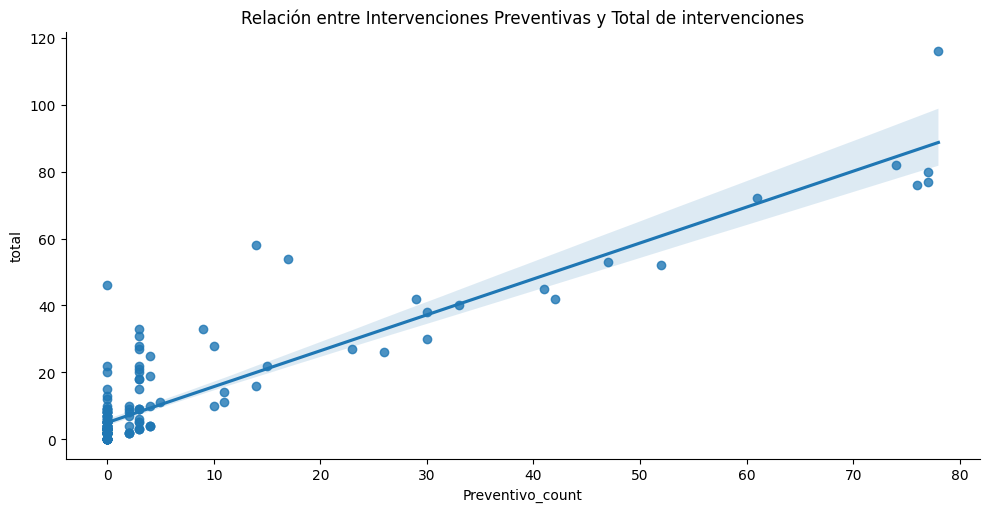

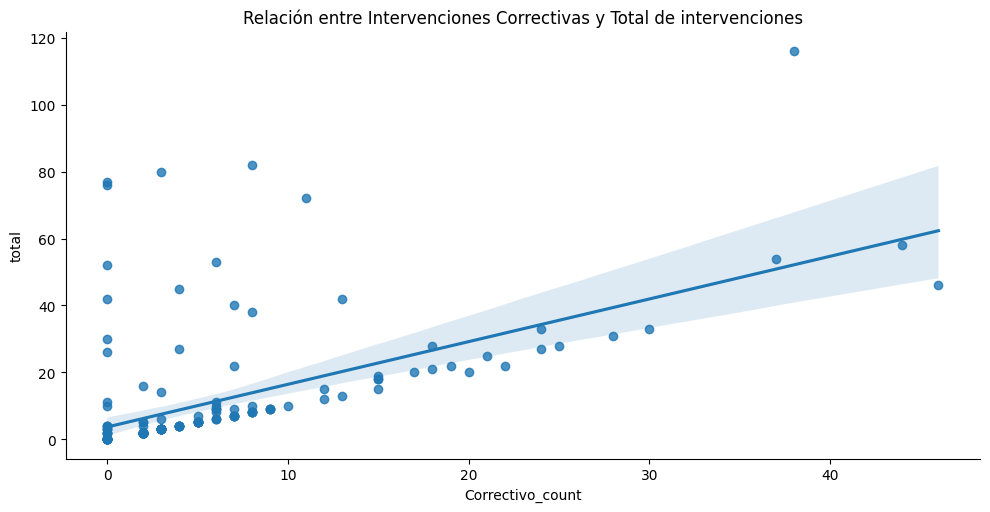

In [ ]:
sns.lmplot(x='Preventivo_count',y='total',data=NumParte_Combinacion_Correctivo_Tractos,aspect=2)
plt.title('Relación entre Intervenciones Preventivas y Total de intervenciones')
plt.show()

sns.lmplot(x='Correctivo_count',y='total',data=NumParte_Combinacion_Correctivo_Tractos,aspect=2)
plt.title('Relación entre Intervenciones Correctivas y Total de intervenciones')
plt.show()

### Modelo lineal simple

In [ ]:
X=NumParte_Combinacion_Correctivo_Tractos['Preventivo_count']
y=NumParte_Combinacion_Correctivo_Tractos['Correctivo_count']

In [ ]:
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:       Correctivo_count   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.082
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0447
Time:                        20:26:52   Log-Likelihood:                -678.00
No. Observations:                 197   AIC:                             1360.
Df Residuals:                     195   BIC:                             1367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9744      0.573  

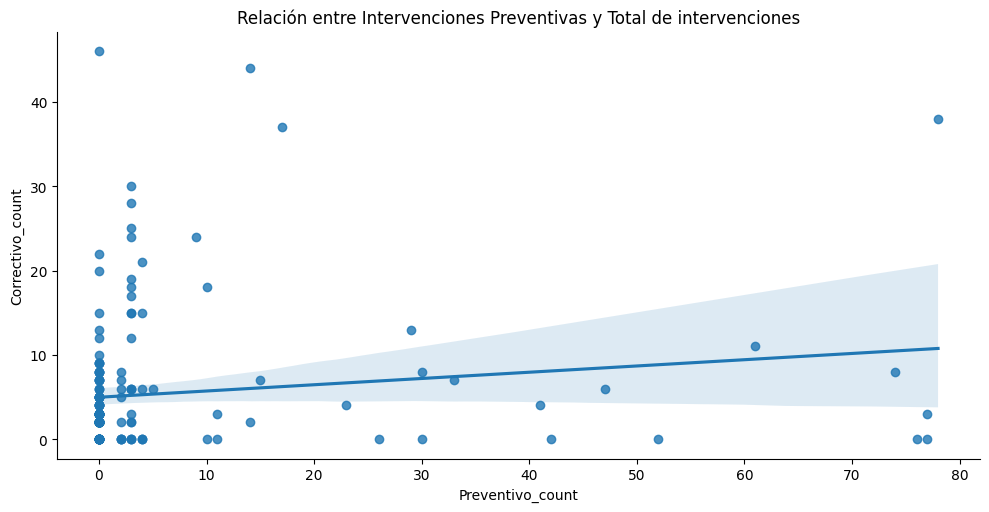

In [ ]:
sns.lmplot(
    x='Preventivo_count',
    y='Correctivo_count',
    data=NumParte_Combinacion_Correctivo_Tractos,  # Usar la columna categórica
    aspect=2,
    palette=['#FF5733', '#33C3FF']  # Personalizar colores
)
plt.title('Relación entre Intervenciones Preventivas y Total de intervenciones')
plt.show()

